Based on https://github.com/cabinetry/cabinetry-tutorials/blob/master/HEPData_workspace.ipynb

We customize the output from `cabinetry` via a helper function. This is optional, and the `logging` module can be used directly as well to further customize the behavior.

In [1]:
import cabinetry
cabinetry.set_logging()

https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/HDBS-2019-19/

In [2]:
import numpy as np
import matplotlib.pyplot as plt # for plotting

import glob, os #For accessing local files

import json
import pyhf
from pyhf.contrib.utils import download
from pyhf.contrib.viz import brazil

#https://www.hepdata.net/record/ins1869695, "4top"
#https://www.hepdata.net/record/ins1802524, "ttbar"
#https://www.hepdata.net/record/ins1843001, "leptoquark"
#https://www.hepdata.net/record/ins2905977, "vector-like lepton"
#https://www.hepdata.net/record/ins2043503, "displaced jets"
#https://www.hepdata.net/record/ins1847643, "Htb"
#https://www.hepdata.net/record/ins1847779, 'METX'
#https://www.hepdata.net/record/ins2731621, "ALP"

#fits fialing
#download("https://www.hepdata.net/record/resource/1935437?view=true", "bottom-squarks")
#ws_bkg = pyhf.Workspace(json.load(open("bottom-squarks/RegionA/BkgOnly.json")))
#patchset = pyhf.PatchSet(json.load(open("bottom-squarks/RegionA/patchset.json")))
#ws = patchset.apply(ws_bkg, "sbottom_600_280_150")
##cabinetry.workspace.save(ws, "bottom-squarks.json")

#Non-standard patchset method
# ws_bkg = pyhf.Workspace(json.load(open("leptoquark/workspaces_LQLQ_ttauttau/BGOnly.json")))
# patchset = pyhf.PatchSet(json.load(open("leptoquark/workspaces_LQLQ_ttauttau/LQLQ_ttauttau_patchset.json")))
# ws = patchset.apply(ws_bkg, "LQd_M1000_B0p05")
# ws = ws_bkg.combine(ws,ws_bkg,join='left outer',merge_channels=True)

#Too many backgrounds
#download("https://www.hepdata.net/record/resource/3898139?view=true", "vectorlepton")
#ws = pyhf.Workspace(json.load(open("vectorlepton/json2/VLL_M1000.json")))

#no nice ref plot
#download("https://www.hepdata.net/record/resource/3170100?view=true","displacedjets")

#super long fits
#download("https://www.hepdata.net/record/resource/1986718?view=true","Htb")
#ws = pyhf.Workspace(json.load(open("Htb/Hp1000_config.json")))

#no signal
#download("https://www.hepdata.net/record/resource/3907343?view=true","METX")

#not a nice patchset ...
#download("https://www.hepdata.net/record/resource/3413642?view=true","DMtau")
#ws = pyhf.Workspace(json.load(open("DMtau/likelihoods/regionA/BkgOnly.json")))
#patchset = pyhf.PatchSet(json.load(open("DMtau/likelihoods/regionA/patch_sig_pyhf_low_tb1_sp035_mA1000_ma100.json")))


download("https://www.hepdata.net/record/resource/3587714?view=true","ALP")
ws = pyhf.Workspace(json.load(open("ALP/fit_jsons/Cyy0p00001_30000_spec.json")))
#ws = pyhf.Workspace(json.load(open("ALP/fit_jsons/prompt_30000_spec.json")))

INFO - pyhf.workspace - Validating spec against schema: workspace.json


The `bottom-squarks.json` workspace is now ready to be used. We will run a maximum likelihood fit with `cabinetry` and visualize the results. First, we have a brief look at the content of the workspace:

The fit model specified in the workspace is created next.

In [3]:
#ws = cabinetry.workspace.load(jsonfile)
#model, data = cabinetry.model_utils.model_and_data(ws)
model =  ws.model()
data   = ws.data(model)

INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_3Single (14 new nuisance param

We can take a look at a yield table for this model. We first generate the pre-fit model prediction, and then pass it to a function to produce a yield table from it.

In [4]:
print("\nWorkspace info")
print(f'     samples: {ws.samples}')
print(f'   modifiers: {ws.modifiers}')
print(f'    channels: {ws.channels}')
print(f'       nbins: {ws.channel_nbins}')
#print(f'  parameters: {ws.parameters}')
print(f'observations: {ws.observations}')
print(f' measurement: {ws.measurement_names}')
print(f' measurement: {ws.get_measurement}') #Can feed poi name of measuremnt name
print(f' data: {ws.data}')
print(f' model: {ws.model}')
print("\n")



Workspace info
     samples: ['Background_3Single', 'Background_4Single', 'Signal_3Single', 'Signal_4Single']
   modifiers: [('PhotonResolution', 'histosys'), ('PhotonScale', 'histosys'), ('Trigger', 'histosys'), ('bkg_est_sys2_3Single', 'histosys'), ('bkg_est_sys2_4Single', 'histosys'), ('lumi', 'lumi'), ('mu', 'normfactor'), ('sig_norm_unc_3Single', 'normsys'), ('sig_norm_unc_4Single', 'normsys'), ('spurious_signal_3Single', 'histosys'), ('spurious_signal_4Single', 'histosys'), ('uncorr_bkguncrt_3Single', 'staterror'), ('uncorr_bkguncrt_4Single', 'staterror'), ('uncorr_siguncrt_3Single', 'staterror'), ('uncorr_siguncrt_4Single', 'staterror')]
    channels: ['3Single', '4Single']
       nbins: {'3Single': 14, '4Single': 8}
observations: {'4Single': [10.0, 8.0, 9.0, 13.0, 8.0, 8.0, 10.0, 3.0], '3Single': [765.0, 859.0, 866.0, 780.0, 812.0, 721.0, 664.0, 600.0, 587.0, 491.0, 476.0, 396.0, 293.0, 338.0]}
 measurement: ['meas']
 measurement: <bound method Workspace.get_measurement of <py

In [5]:
print("\nConfig Info")
print(f'modifiers = {model.config.modifiers}')
print(f' channels = {model.config.channels}')
print(f'  auxdata = {model.config.auxdata}')
print(f' poi_name = {model.config.poi_name}')
print(f'poi_index = {model.config.poi_index}')
print(f'    npars = {model.config.npars}')
print(f'    param = {model.config.par_order}')
print(f'     init = {model.config.suggested_init()}')
print(f'    fixed = {model.config.suggested_fixed()}')
print(f'   bounds = {model.config.suggested_bounds()}')


Config Info
modifiers = [('PhotonResolution', 'histosys'), ('PhotonScale', 'histosys'), ('Trigger', 'histosys'), ('bkg_est_sys2_3Single', 'histosys'), ('bkg_est_sys2_4Single', 'histosys'), ('lumi', 'lumi'), ('mu', 'normfactor'), ('sig_norm_unc_3Single', 'normsys'), ('sig_norm_unc_4Single', 'normsys'), ('spurious_signal_3Single', 'histosys'), ('spurious_signal_4Single', 'histosys'), ('uncorr_bkguncrt_3Single', 'staterror'), ('uncorr_bkguncrt_4Single', 'staterror'), ('uncorr_siguncrt_3Single', 'staterror'), ('uncorr_siguncrt_4Single', 'staterror')]
 channels = ['3Single', '4Single']
  auxdata = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 poi_name = mu
poi_index = 8
    npars = 55
    param = ['bkg_est_sys2_3Single', 'spurious_signal_3Single', 'PhotonResolution', 

In [6]:
print("\n Param info")
for k in model.config.par_order:
  print(f'  {k}')
  print(f'\tparam_set={model.config.param_set(k)}')
  print(f'\tn_parameters={model.config.param_set(k).n_parameters}')
  print(f'\tconstrained={model.config.param_set(k).constrained}')
  if model.config.param_set(k).constrained:
    print(f'\tpdf={model.config.param_set(k).pdf_type}')
    print(f'\tauxdata={model.config.param_set(k).auxdata}')
    #print(f'\tfactors={model.config.param_set(k).factors}')
    print(f'\twidth={model.config.param_set(k).width()}')
  print(f'\tinit={model.config.param_set(k).suggested_init}')
  print(f'\tbounds={model.config.param_set(k).suggested_bounds}')
  print(f'\tfixed={model.config.param_set(k).suggested_fixed}')
  print(f'\tslice={model.config.par_slice(k)}')


 Param info
  bkg_est_sys2_3Single
	param_set=<pyhf.parameters.paramsets.constrained_by_normal object at 0x161397f40>
	n_parameters=1
	constrained=True
	pdf=normal
	auxdata=[0.0]
	width=[1.0]
	init=[0.0]
	bounds=[(-5.0, 5.0)]
	fixed=[False]
	slice=slice(0, 1, None)
  spurious_signal_3Single
	param_set=<pyhf.parameters.paramsets.constrained_by_normal object at 0x161397f70>
	n_parameters=1
	constrained=True
	pdf=normal
	auxdata=[0.0]
	width=[1.0]
	init=[0.0]
	bounds=[(-5.0, 5.0)]
	fixed=[False]
	slice=slice(1, 2, None)
  PhotonResolution
	param_set=<pyhf.parameters.paramsets.constrained_by_normal object at 0x161397fa0>
	n_parameters=1
	constrained=True
	pdf=normal
	auxdata=[0.0]
	width=[1.0]
	init=[0.0]
	bounds=[(-5.0, 5.0)]
	fixed=[False]
	slice=slice(2, 3, None)
  PhotonScale
	param_set=<pyhf.parameters.paramsets.constrained_by_normal object at 0x161397f10>
	n_parameters=1
	constrained=True
	pdf=normal
	auxdata=[0.0]
	width=[1.0]
	init=[0.0]
	bounds=[(-5.0, 5.0)]
	fixed=[False]
	slice

In [7]:
prediction_prefit = cabinetry.model_utils.prediction(model)
_ = cabinetry.tabulate.yields(prediction_prefit, data)

DEBUG - cabinetry.model_utils - total stdev is [[161.22599169491926, 107.52694314695658, 124.57078365049554, 173.15777677401704, 264.675490370854, 346.27069426466926, 422.25687483491265, 358.6656760695786, 123.42507566671492, 34.38174752822949, 34.172520402615135, 29.257362578878777, 48.50211225683791, 109.88475925997722], [2.2047154512798954, 1.4850367235111874, 1.694457175260188, 2.7076718089401246, 2.2941743208187177, 1.8057714317285563, 1.4920832602448937, 1.7485360762710633]]
DEBUG - cabinetry.model_utils - total stdev per channel is [1951.1238941976892, 5.729765373110545]
INFO - cabinetry.tabulate - yields per bin for pre-fit model prediction:
╒════════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤═════════════════╤═════════════╤═════════════╤══════════════╤══════════════╤═════════════╤

We can also visualize the pre-fit model prediction and compare it to data. the `visualize.data_mc` function returns a list of dictionaries containing the `matplotlib` figures, which we could use to customize them as needed. We do not need to customize anything here, so we assign the return value to `_`.

INFO - cabinetry.visualize.utils - saving figure as figures/3Single_prefit.pdf
INFO - cabinetry.visualize.utils - saving figure as figures/4Single_prefit.pdf


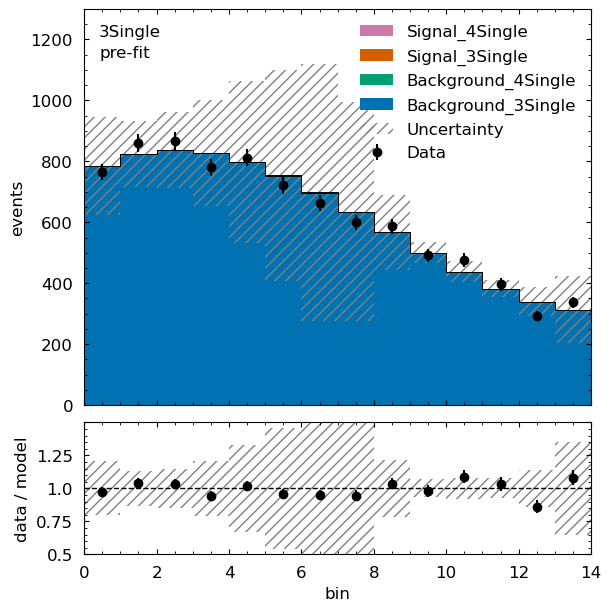

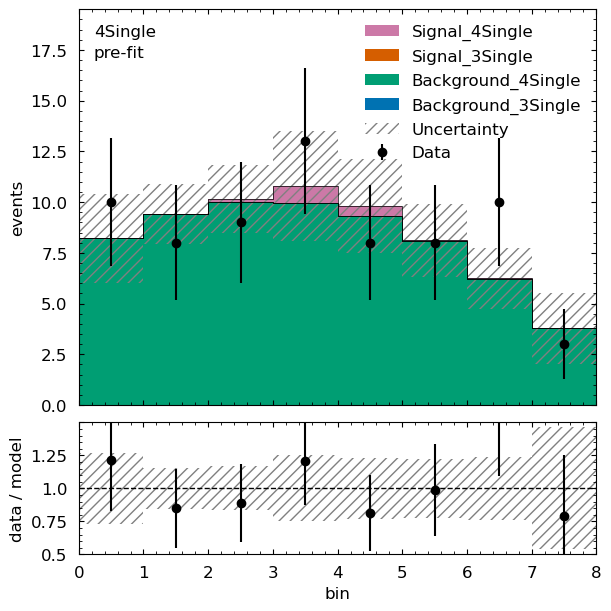

In [8]:
_ = cabinetry.visualize.data_mc(prediction_prefit, data)

Next up is a maximum likelihood fit. As we have limited sensitivity to the signal in this setup, we fit a background-only model with the signal normalization fixed to zero.

In [9]:
#Set the intial paramaters to default, and the poi=0
init_pars = model.config.suggested_init()
init_pars[model.config.poi_index] = 0

#Set the poi to a fixed parameter
fix_pars = model.config.suggested_fixed()
fix_pars[model.config.poi_index] = True

#run a fit with poi fixed to 0
fit_results = cabinetry.fit.fit(model, data, init_pars=init_pars, fix_pars=fix_pars)

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 76.41                      │             Nfcn = 2555              │
│ EDM = 0.000301 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────────────────────────────

We can now visualize the post-fit distributions. To do so, we need a post-fit model prediction. It is obtained like the pre-fit model prediction, but this time with an additional argument to pass in the fit results.

DEBUG - cabinetry.model_utils - total stdev is [[23.767865498882124, 21.260255259285163, 20.697917682722057, 20.846180321684617, 21.356239846059605, 21.384597851931517, 21.496310356032755, 20.224286517503206, 18.571762891319665, 17.768259795248916, 17.202552504782513, 16.332870412424175, 15.301170875556787, 16.396265862825242], [1.6484942417426929, 1.343218210064702, 1.426199315687018, 1.9759279298447752, 1.6558760852055228, 1.43917231356312, 1.2413343398478969, 1.2449512801102605]]
DEBUG - cabinetry.model_utils - total stdev per channel is [84.34450442641493, 4.438520436379368]
INFO - cabinetry.visualize.utils - saving figure as figures/3Single_postfit.pdf
INFO - cabinetry.visualize.utils - saving figure as figures/4Single_postfit.pdf


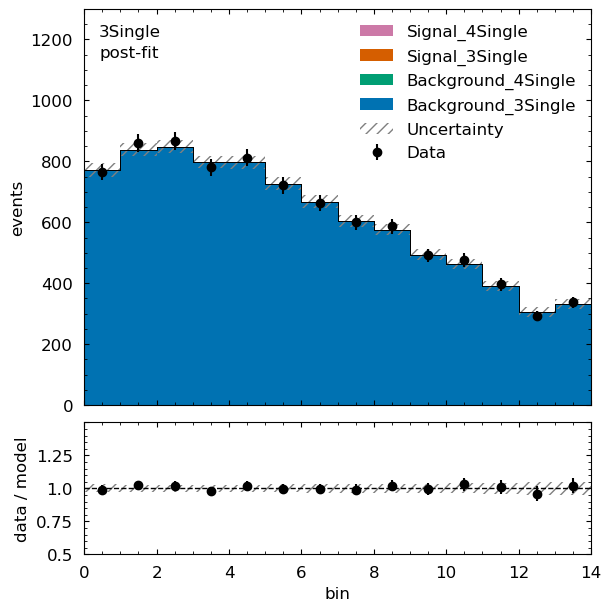

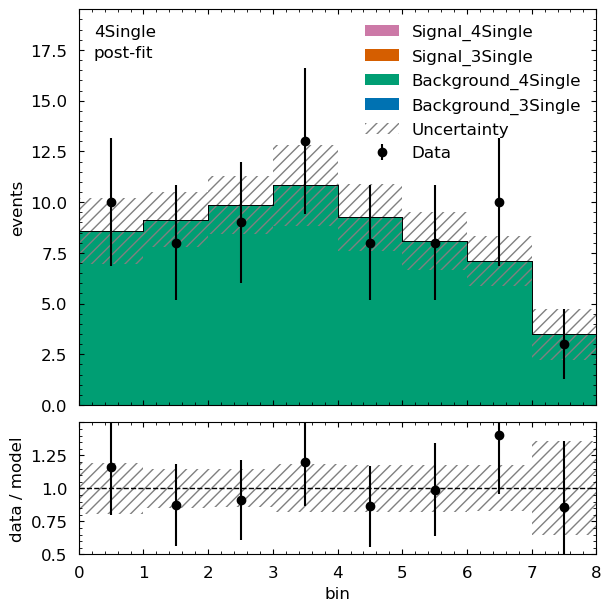

In [10]:
prediction_postfit = cabinetry.model_utils.prediction(model, fit_results=fit_results)
_ = cabinetry.visualize.data_mc(prediction_postfit, data)

The nuisance parameter pulls and correlations are visualized below.

INFO - cabinetry.visualize.utils - saving figure as figures/pulls.pdf


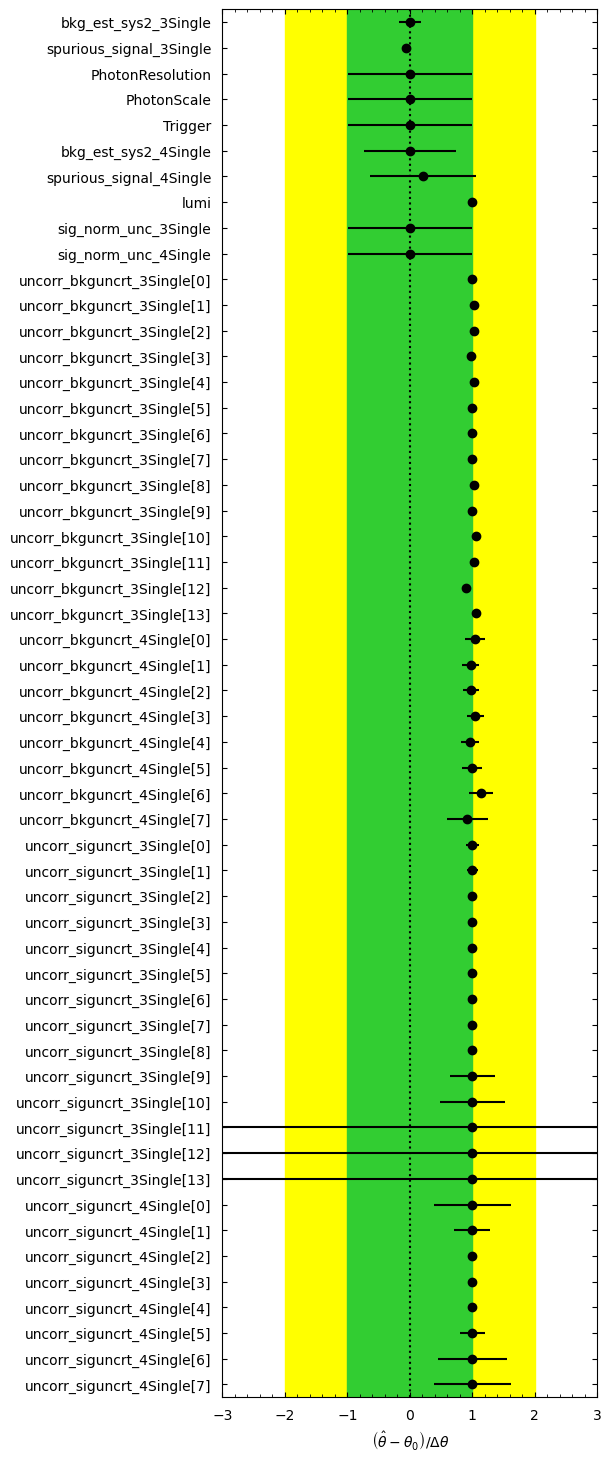

In [11]:
cabinetry.visualize.pulls(fit_results)

INFO - cabinetry.visualize.utils - saving figure as figures/correlation_matrix.pdf


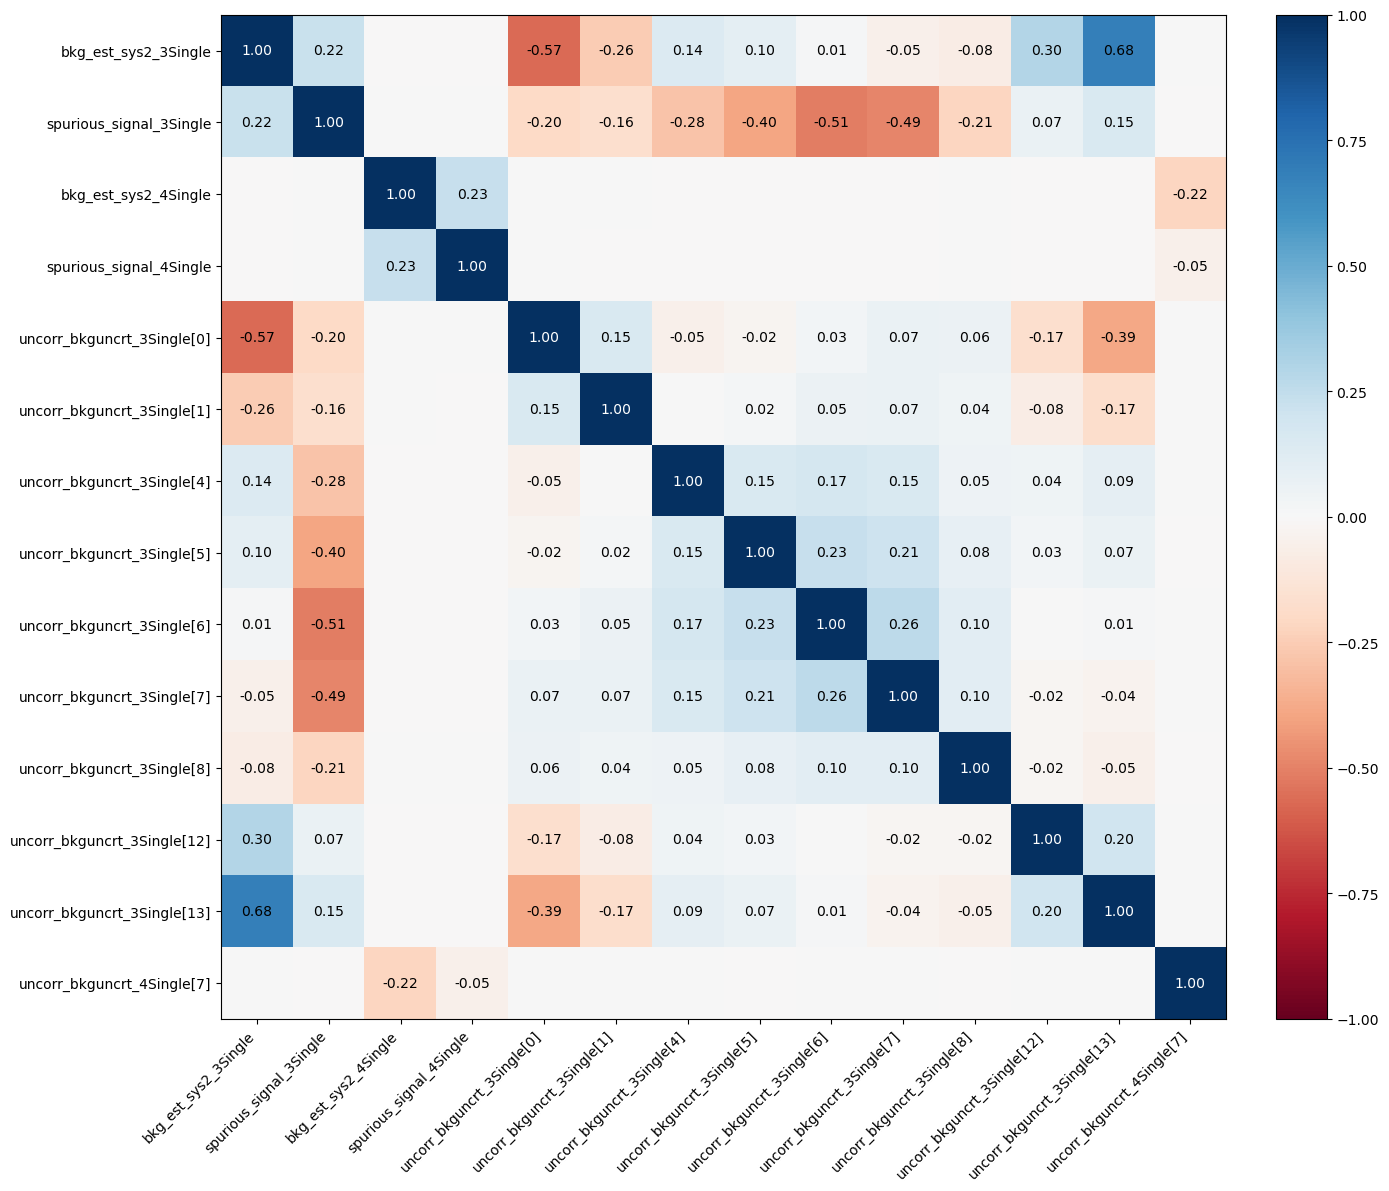

In [12]:
cabinetry.visualize.correlation_matrix(fit_results, pruning_threshold=0.2)

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 76.26                      │             Nfcn = 2733              │
│ EDM = 0.000114 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────────────────────────────

WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

[(array(0.9994298), [array(0.99830426), array(0.99890985), array(0.99942948), array(0.99979428), array(0.99996047)]), (array(0.66837986), [array(0.23784363), array(0.38299057), array(0.58341987), array(0.80136327), array(0.9482673)]), (array(0.37027983), [array(0.04547803), array(0.11823031), array(0.28009453), array(0.55634278), array(0.84030265)]), (array(0.16971713), [array(0.00725673), array(0.0302124), array(0.11174683), array(0.32978688), array(0.67429409)]), (array(0.06531168), [array(0.00100467), array(0.0066), array(0.03784492), array(0.16740469), array(0.48042838)]), (array(0.02159588), [array(0.00012504), array(0.00127242), array(0.01116092), array(0.07377574), array(0.30229716)]), (array(0.00628924), [array(1.43965676e-05), array(0.00022251), array(0.00293717), array(0.02873654), array(0.16880961)]), (array(0.00164952), [array(1.56696405e-06), array(3.60737316e-05), array(0.00070437), array(0.01007096), array(0.08451083)]), (array(0.00039726), [array(1.64081219e-07), array(

/var/folders/p_/k_v78m8s1jdfptnnvdw_ml2m0000gn/T/ipykernel_4381/3155371839.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


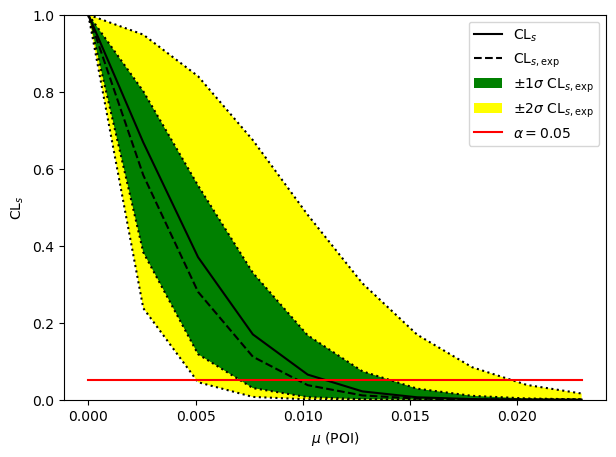

In [13]:
fit_results = cabinetry.fit.fit(model, data)
mu_values=np.linspace(0,5*fit_results.uncertainty[model.config.poi_index],10)
results = [
    pyhf.infer.hypotest(mu, data, model, test_stat="qtilde", return_expected_set=True)
    for mu in mu_values
]

print(results)

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
brazil.plot_results(mu_values, results, ax=ax)
fig.show()

In [14]:
###ALEX This is failing (is it just a weird fit model)

# init_pars = model.config.suggested_init()
# init_pars[model.config.poi_index] = 0

# parameter_bounds = model.config.suggested_bounds()
# parameter_bounds[model.config.poi_index] = [0.0, 5*fit_results.uncertainty[model.config.poi_index]]
# parameter_bounds[model.config.poi_index] = [0.0,0.4]

# limit_results = cabinetry.fit.limit(model, data, bracket=[0,2*fit_results.uncertainty[model.config.poi_index]])
# #limit_results = cabinetry.fit.limit(model, data, init_pars=init_pars,par_bounds=parameter_bounds)
# cabinetry.visualize.limit(limit_results)

In [15]:
###ALEX Both fail (so probably a bit weird somehow)

#CLs_obs, CLs_exp= pyhf.infer.hypotest(0, data, model, test_stat="q0", return_expected=True)
#print(CLs_obs,CLs_exp)

#significance_results = cabinetry.fit.significance(model, data, init_pars=init_pars)
#print(significance_results)

In [16]:
#Dictionary to store all the results
results = { 
        "obs": [],
        "median": [], 
        "minus1": [], "minus2": [], 
        "plus1": [], "plus2": [] 
}

#patchsets = ["sbottom_600_180_50","sbottom_700_131_1","sbottom_800_131_1"]
#patchsets = ["LQd_M1000_B0p05","LQd_M2000_B0p05"]
#patchsets = ["Htb/Hp500_config.json","Htb/Hp1000_config.json","Htb/Hp1400_config.json","Htb/Hp2000_config.json"]
patchsets = ["ALP/fit_jsons/Cyy0p00001_20000_spec.json", "ALP/fit_jsons/Cyy0p00001_30000_spec.json","ALP/fit_jsons/Cyy0p00001_40000_spec.json","ALP/fit_jsons/Cyy0p00001_50000_spec.json","ALP/fit_jsons/Cyy0p00001_60000_spec.json"]
#patchsets = ["ALP/fit_jsons/prompt_10000_spec.json","ALP/fit_jsons/prompt_20000_spec.json","ALP/fit_jsons/prompt_30000_spec.json","ALP/fit_jsons/prompt_40000_spec.json"]

patchsets=sorted(glob.glob("ALP/fit_jsons/Cyy0p00001_*.json"))

stat_only=True

for patch in patchsets:
    # Apply the patch to build a patched model
    #patched_ws = patchset.apply(ws_bkg, patch)
    patched_ws = pyhf.Workspace(json.load(open(patch)))
    patched_model =  patched_ws.model()
    patched_data = patched_ws.data(patched_model)
    
    #Set to expected only
    #pars = patched_model.config.suggested_init().copy()
    #pars[patched_model.config.poi_index] = 0.0
    #patched_data = patched_model.expected_data(pars)
    
    #Fix systematics:
    if stat_only:
        fixed_params = [p!= patched_model.config.poi_name for p in patched_model.config.par_names] # use par_names not parameters for uncert with multiple components
    else:
        fixed_params= model.config.suggested_fixed()
    
    #Similar dictionary to hold the scan results for each patchset
    CLs = { 
        "obs": [],
        "median": [], 
        "minus1": [], "minus2": [], 
        "plus1": [], "plus2": [] 
    }
    
    #Get best fit result first for a better scan
    #print(pyhf.infer.mle.fit(patched_data, patched_model, return_uncertainties=True))
    #bestfit,errors=np.array(pyhf.infer.mle.fit(patched_data, patched_model, return_uncertainties=True)).T
    fit_results = cabinetry.fit.fit(patched_model, patched_data)
    #print(fit_results.bestfit[patched_model.config.poi_index],fit_results.uncertainty[patched_model.config.poi_index])
    
    #mu_values=np.linspace(0,3*errors[patched_model.config.poi_index],10)
    mu_values=np.linspace(0,5*fit_results.uncertainty[patched_model.config.poi_index],10)
    #Scan over poi values
    for mu in mu_values:
        # Calculate CLs
        obs,bands = pyhf.infer.hypotest(mu, patched_data, patched_model, test_stat="qtilde", return_expected_set=True,fixed_params=fixed_params)
        CLs["obs"].append(obs)
        CLs["median"].append(bands[2])
        CLs["plus2"].append(bands[0])
        CLs["plus1"].append(bands[1])
        CLs["minus1"].append(bands[3])
        CLs["minus2"].append(bands[4])
        
        print(f"For {patch} and poi={mu}: obs={obs}, exp={bands[2]}, bands=({bands[4]},{bands[3]},{bands[1]},{bands[0]})")

    # Interpolate where CLs = 0.05
    results["obs"].append(np.interp(0.05, CLs["obs"][::-1], mu_values[::-1])) #[::-1] just to reverse the list for np.interp
    results["median"].append(np.interp(0.05, CLs["median"][::-1], mu_values[::-1]))
    results["minus1"].append(np.interp(0.05, CLs["minus1"][::-1], mu_values[::-1]))
    results["minus2"].append(np.interp(0.05, CLs["minus2"][::-1], mu_values[::-1]))
    results["plus1"].append(np.interp(0.05, CLs["plus1"][::-1], mu_values[::-1]))
    results["plus2"].append(np.interp(0.05, CLs["plus2"][::-1], mu_values[::-1]))

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_10000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_10000_spec.json and poi=0.2619838996450241: obs=0.6073192293816313, exp=0.3534195006171731, bands=(0.8781225532162005,0.6284085098581903,0.16973275635165513,0.07498314372915829)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_10000_spec.json and poi=0.5239677992900482: obs=0.4110137170725974, exp=0.10152232582526718, bands=(0.6564381997103287,0.31128002595563325,0.0263197227703527,0.006050035000518111)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_10000_spec.json and poi=0.7859516989350723: obs=0.17155558775465266, exp=0.025393320713350966, bands=(0.41643625938640094,0.128778522146003,0.003828641938312824,0.00050149070388096)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_10000_spec.json and poi=1.0479355985800964: obs=0.057774543261658845, exp=0.005727628880391265, bands=(0.2279229610769396,0.0462972376251853,0.0005291368516246237,4.1923893811347986e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_10000_spec.json and poi=1.3099194982251205: obs=0.016386575601559268, exp=0.0011892792454604895, bands=(0.10971792515085485,0.01485577650973174,6.999180475813898e-05,3.5017211123361897e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_10000_spec.json and poi=1.5719033978701447: obs=0.004038337261469438, exp=0.00023037073141370708, bands=(0.04724805899879337,0.004334285413438179,8.902998252210639e-06,2.90629601895903e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_10000_spec.json and poi=1.8338872975151688: obs=0.0008846193896507686, exp=4.2012987546613194e-05, bands=(0.018455583428677622,0.0011652187967090696,1.0925672176735076e-06,2.3884031045894866e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_10000_spec.json and poi=2.095871197160193: obs=0.00017518388855275113, exp=7.261469953603005e-06, bands=(0.006612060378886285,0.000291513611938776,1.296596243255379e-07,1.9388292449716888e-09)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_10000_spec.json and poi=2.357855096805217: obs=3.176871906300693e-05, exp=1.1953702751414093e-06, bands=(0.0021922249183753957,6.838309673757727e-05,1.490648306764726e-08,1.5519859362756725e-10)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 194                        │             Nfcn = 3086              │
│ EDM = 8.64e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 194.020480 at 

For ALP/fit_jsons/Cyy0p00001_11000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_11000_spec.json and poi=0.3940498496019904: obs=0.5277325978813865, exp=0.14037583339518953, bands=(0.7167249743675946,0.3775026550478542,0.042060639230116506,0.011252917223921499)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_11000_spec.json and poi=0.7880996992039808: obs=0.12169493032350424, exp=0.012577327577828286, bands=(0.3173366117865194,0.08009750715349699,0.00149110110290931,0.00015252811849349608)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_11000_spec.json and poi=1.1821495488059712: obs=0.01613113690953887, exp=0.000876663566225782, bands=(0.09433749645111146,0.01185303942762798,4.75536336840923e-05,2.1898532509501063e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_11000_spec.json and poi=1.5761993984079616: obs=0.001470572073563928, exp=5.1384113822013434e-05, bands=(0.020690000864084325,0.0013634168531085624,1.397905078870782e-06,3.198448483543202e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_11000_spec.json and poi=1.970249248009952: obs=0.00010215264948609755, exp=2.637745456861224e-06, bands=(0.003577841382323194,0.0001295577605770375,3.8386188470981114e-08,4.669774512510965e-10)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_11000_spec.json and poi=2.3642990976119425: obs=5.755964904340148e-06, exp=1.215431397563321e-07, bands=(0.0005104898865442672,1.0562993681486834e-05,9.930425843851777e-10,6.75376572036177e-12)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_11000_spec.json and poi=2.758348947213933: obs=2.740613863839936e-07, exp=5.109779931840936e-09, bands=(6.204340167971567e-05,7.579241746830943e-07,2.434541492024987e-11,9.625441913225859e-14)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_11000_spec.json and poi=3.1523987968159233: obs=1.1342509656476908e-08, exp=1.9826235450236144e-10, bands=(6.573461637134017e-06,4.8729012477194285e-08,5.680648520635208e-13,1.3474403338594272e-15)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_11000_spec.json and poi=3.5464486464179137: obs=4.164494782064898e-10, exp=7.160249562634422e-12, bands=(6.177523569968222e-07,2.8447194138109887e-09,1.2657215922087409e-14,1.848784345267295e-17)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 187.2                      │             Nfcn = 3429              │
│ EDM = 3.8e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 187.194746 at 

For ALP/fit_jsons/Cyy0p00001_12000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_12000_spec.json and poi=0.30812312956184523: obs=0.35220894738988856, exp=0.05488061865074954, bands=(0.544336615265123,0.21255659151229092,0.011037561581102773,0.0019475725990377407)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_12000_spec.json and poi=0.6162462591236905: obs=0.022843761957244964, exp=0.0010998122396995926, bands=(0.1055770856110062,0.014022041994699013,6.337675707564443e-05,3.1035392845877606e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_12000_spec.json and poi=0.9243693886855358: obs=0.0004957353980110356, exp=1.2570793550574552e-05, bands=(0.009164155628124377,0.00045087295024435326,2.5167607419129587e-07,4.224191798189558e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_12000_spec.json and poi=1.232492518247381: obs=5.1995950964237496e-06, exp=9.6151376825646e-08, bands=(0.0004382323214701437,8.7076847592397e-06,7.535719065584988e-10,4.9149506273705556e-12)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_12000_spec.json and poi=1.540615647809226: obs=3.188663507534503e-08, exp=5.313566709801705e-10, bands=(1.3091681782359007e-05,1.1249642553940892e-07,1.7691193709968944e-12,4.879405069490515e-15)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_12000_spec.json and poi=1.8487387773710715: obs=1.2746751283116027e-10, exp=2.2165365778165635e-12, bands=(2.641858841660701e-07,1.035672042249467e-09,3.3288793031414515e-15,4.12870824799939e-18)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_12000_spec.json and poi=2.1568619069329165: obs=3.555722156408953e-13, exp=7.178399678318226e-15, bands=(3.7925975111651635e-09,7.0779935685332335e-12,5.092749718982133e-18,2.9771602705857964e-21)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_12000_spec.json and poi=2.464985036494762: obs=7.24625419960348e-16, exp=1.8405887625993592e-17, bands=(4.01665192681821e-11,3.694442638657332e-14,6.399887444759645e-21,1.8305681901481172e-24)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_12000_spec.json and poi=2.7731081660566073: obs=1.1146778655909212e-18, exp=3.791252403233236e-20, bands=(3.223446679481896e-13,1.5038955840313302e-16,6.658781189891832e-24,9.608151833103216e-28)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 155.9                      │             Nfcn = 3070              │
│ EDM = 0.00011 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 155.902711 at 

For ALP/fit_jsons/Cyy0p00001_13000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_13000_spec.json and poi=0.0478506235043268: obs=0.6076396733513045, exp=0.35428783890176674, bands=(0.8785065862114856,0.6291995340398739,0.17038951427488364,0.07538751687315012)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_13000_spec.json and poi=0.0957012470086536: obs=0.5256619570003985, exp=0.09763672892302964, bands=(0.649187906419818,0.3040095764850082,0.024888905282017395,0.005621107219602607)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_13000_spec.json and poi=0.1435518705129804: obs=0.2860690914834381, exp=0.022819416669926786, bands=(0.4002081144470481,0.11992611964118684,0.0033129365455644836,0.0004173642629572532)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_13000_spec.json and poi=0.1914024940173072: obs=0.11388805261399193, exp=0.004739690264803024, bands=(0.20967956139796398,0.04048275421325281,0.0004134453799157387,3.089153056527225e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_13000_spec.json and poi=0.23925311752163397: obs=0.037498588414886895, exp=0.0008995266502405803, bands=(0.09555791787675325,0.01208185335280712,4.912763872994859e-05,2.278067716029748e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_13000_spec.json and poi=0.2871037410259608: obs=0.010575683639062935, exp=0.00015878776628099796, bands=(0.03867152491112776,0.003261375342656655,5.610017268816632e-06,1.6722134982901143e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_13000_spec.json and poi=0.3349543645302876: obs=0.002623934123521724, exp=2.638740198037803e-05, bands=(0.014133233774683058,0.0008093947701373085,6.193500083434719e-07,1.2206547384494108e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_13000_spec.json and poi=0.3828049880346144: obs=0.0005844141999267183, exp=4.163648206752918e-06, bands=(0.004727588974875167,0.0001869121124501132,6.637741935603363e-08,8.852831619637153e-10)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_13000_spec.json and poi=0.43065561153894116: obs=0.00011866424686320779, exp=6.277593150228487e-07, bands=(0.0014629191276108264,4.053103625611015e-05,6.926071819300297e-09,6.374105840828076e-11)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 143.2                      │             Nfcn = 3076              │
│ EDM = 7.75e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 143.235796 at 

For ALP/fit_jsons/Cyy0p00001_14000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_14000_spec.json and poi=0.028146304319233366: obs=0.6142503546499434, exp=0.37199931195824487, bands=(0.8860685755828328,0.6450516064532906,0.18402533178253508,0.0839344235761245)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_14000_spec.json and poi=0.05629260863846673: obs=0.5286088742239161, exp=0.10824212615014672, bands=(0.6683613823481562,0.3235407901191331,0.028857467270086635,0.0068302881696656065)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_14000_spec.json and poi=0.08443891295770009: obs=0.28890367114428117, exp=0.02672655011443602, bands=(0.4243471774545129,0.13322708571813427,0.004103951530414738,0.0005477727564348001)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_14000_spec.json and poi=0.11258521727693346: obs=0.11539913846148724, exp=0.005858820660889236, bands=(0.23018737137132428,0.04704384271926506,0.0005450201745885083,4.348934164501442e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_14000_spec.json and poi=0.14073152159616684: obs=0.0380553410759994, exp=0.0011716348609587773, bands=(0.10891568148594846,0.014692802953265166,6.867562980805e-05,3.4217962502330558e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_14000_spec.json and poi=0.16887782591540018: obs=0.010727692793763925, exp=0.00021751447068869592, bands=(0.04581938094851492,0.004148641067039445,8.289557792866314e-06,2.668010093056961e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_14000_spec.json and poi=0.19702413023463355: obs=0.0026547956338735345, exp=3.7938142814259654e-05, bands=(0.01741220148693694,0.0010759030142264401,9.644725359888411e-07,2.0605859071070826e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_14000_spec.json and poi=0.22517043455386693: obs=0.0005885111037217803, exp=6.269700336273283e-06, bands=(0.006054263999413739,0.0002592964930608897,1.0862246039149924e-07,1.5755343568511e-09)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_14000_spec.json and poi=0.2533167388731003: obs=0.00011868317027895733, exp=9.87935767949989e-07, bands=(0.0019459515609980753,5.859305150394938e-05,1.1877857880685515e-08,1.191970048633807e-10)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 118.8                      │             Nfcn = 3064              │
│ EDM = 9.11e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 118.793046 at 

For ALP/fit_jsons/Cyy0p00001_15000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_15000_spec.json and poi=0.01278275822202672: obs=0.6142564323926185, exp=0.37201542016441913, bands=(0.8860752256949673,0.6450657839364585,0.18403794170163157,0.08394245953918474)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_15000_spec.json and poi=0.02556551644405344: obs=0.5289410848438211, exp=0.10943027748493538, bands=(0.6703936763828923,0.32566936872500857,0.029314420717976568,0.006973353274536119)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_15000_spec.json and poi=0.03834827466608016: obs=0.34455243094923194, exp=0.027624155254132123, bands=(0.42950172147545607,0.13617351379491868,0.004292358917140807,0.0005799669135396957)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_15000_spec.json and poi=0.05113103288810688: obs=0.15377803680292787, exp=0.006259977828255054, bands=(0.23691181873454878,0.049293612581896205,0.0005943063586050785,4.841896157027069e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_15000_spec.json and poi=0.0639137911101336: obs=0.05761911104653128, exp=0.0013082409630367738, bands=(0.11495750211897153,0.015937208803879405,7.9008743247731e-05,4.058135562552374e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_15000_spec.json and poi=0.07669654933216032: obs=0.0187182766352705, exp=0.0002565345026157736, bands=(0.0500350010784064,0.004704165990442675,1.0178213799140172e-05,3.412300911569893e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_15000_spec.json and poi=0.08947930755418704: obs=0.0054061916182455965, exp=4.7758285309708306e-05, bands=(0.019850023381637612,0.001287821825307086,1.278079663595838e-06,2.8760732213505493e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_15000_spec.json and poi=0.10226206577621376: obs=0.0014151336377833449, exp=8.511764127230202e-06, bands=(0.007270810367512947,0.00033082393328489804,1.5706127058284184e-07,2.4277554829988217e-09)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_15000_spec.json and poi=0.11504482399824048: obs=0.00034073927300932034, exp=1.4612537321416044e-06, bands=(0.0024843012765035487,8.045361995705146e-05,1.8942297989923555e-08,2.0507432204859864e-10)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 126.6                      │             Nfcn = 3060              │
│ EDM = 0.000125 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 126.560322 at 

For ALP/fit_jsons/Cyy0p00001_16000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_16000_spec.json and poi=0.008211214335371307: obs=0.6101519332898525, exp=0.36106394909192185, bands=(0.8814598625035069,0.6353272735348672,0.17555229630270347,0.07858975565785564)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_16000_spec.json and poi=0.016422428670742614: obs=0.5268936876686783, exp=0.10208392432133127, bands=(0.6574637694454268,0.31231960257179564,0.026528754739649284,0.006113372404616279)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_16000_spec.json and poi=0.02463364300611392: obs=0.34281301287361415, exp=0.024610485891995413, bands=(0.41164002781817016,0.1261242615616868,0.0036695606537137286,0.0004751738572610817)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_16000_spec.json and poi=0.03284485734148523: obs=0.15088017740713983, exp=0.005300369189557566, bands=(0.220305197411631,0.04382602976355504,0.0004782372198653828,3.698737430680314e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_16000_spec.json and poi=0.041056071676856536: obs=0.055382077155900246, exp=0.001048606971613058, bands=(0.10312068119674292,0.013536233580479942,5.965808469839894e-05,2.8836883670588055e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_16000_spec.json and poi=0.04926728601222784: obs=0.017520674424977647, exp=0.0001940099838073948, bands=(0.04309192388758436,0.0038018241536842564,7.191946300296682e-06,2.2507207431783685e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_16000_spec.json and poi=0.057478500347599146: obs=0.004901830384046747, exp=3.398167815791739e-05, bands=(0.016348435354038154,0.000987038943077101,8.43097709502528e-07,1.7574526238490297e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_16000_spec.json and poi=0.06568971468297045: obs=0.001237077759670014, exp=5.6840468471962265e-06, bands=(0.005707208794267607,0.0002397678107114424,9.652090607301621e-08,1.3719625524001202e-09)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_16000_spec.json and poi=0.07390092901834176: obs=0.0002859719619692921, exp=9.138184128001785e-07, bands=(0.001853102292374328,5.499964771075767e-05,1.0824540199881457e-08,1.0701081799841027e-10)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 107.5                      │             Nfcn = 3058              │
│ EDM = 0.000111 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 107.546706 at 

For ALP/fit_jsons/Cyy0p00001_17000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_17000_spec.json and poi=0.0056023980287160735: obs=0.6086993382886374, exp=0.3571528058310245, bands=(0.8797645963151745,0.6318000671644214,0.17256419253318603,0.0767313087695222)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_17000_spec.json and poi=0.011204796057432147: obs=0.526356450806975, exp=0.10014677607376911, bands=(0.6539027404910087,0.30872187164299064,0.025810105031407037,0.005896334645814975)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_17000_spec.json and poi=0.01680719408614822: obs=0.34934179190176334, exp=0.02400778337572841, bands=(0.40786660565690974,0.1240585074833152,0.003548403861333267,0.00045534688791158646)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_17000_spec.json and poi=0.022409592114864294: obs=0.15625062326940306, exp=0.00515300590428137, bands=(0.21758559688954482,0.04295885472924224,0.00046098313554371843,3.53427827391032e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_17000_spec.json and poi=0.028011990143580367: obs=0.058506148940778935, exp=0.001017922666017076, bands=(0.10161610597579133,0.013241910107756827,5.745400487092454e-05,2.754803659680618e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_17000_spec.json and poi=0.03361438817229644: obs=0.01893890755150153, exp=0.00018836033977043628, bands=(0.04241180975581836,0.0037169136327358195,6.932946307055528e-06,2.1540620460184096e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_17000_spec.json and poi=0.039216786201012516: obs=0.005435360713465582, exp=3.304511244469557e-05, bands=(0.016088429494224392,0.0009656632098644918,8.148245689484183e-07,1.6879706987306376e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_17000_spec.json and poi=0.04481918422972859: obs=0.0014101126989584465, exp=5.543540767551453e-06, bands=(0.0056217316530750155,0.00023502065896034347,9.365557237824894e-08,1.32439434164487e-09)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_17000_spec.json and poi=0.05042158225844466: obs=0.0003357046483814156, exp=8.94903673194839e-07, bands=(0.0018289391548070453,5.407359094569546e-05,1.0558356893887308e-08,1.0396136192423357e-10)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 101                        │             Nfcn = 3054              │
│ EDM = 8.83e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 100.951453 at 

For ALP/fit_jsons/Cyy0p00001_18000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_18000_spec.json and poi=0.004088675842848211: obs=0.6064729378988867, exp=0.35112181020891076, bands=(0.8771001428349248,0.6263089943316348,0.16800022251165053,0.07391965433123)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_18000_spec.json and poi=0.008177351685696423: obs=0.5253310214944192, exp=0.09643832348738729, bands=(0.6468954006158063,0.3017390972598214,0.024453084063232496,0.005492081953275272)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_18000_spec.json and poi=0.012266027528544634: obs=0.3545463833195819, exp=0.022561432872203135, bands=(0.3985053920785713,0.11901823877658924,0.0032624269649741897,0.0004093138847430323)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_18000_spec.json and poi=0.016354703371392845: obs=0.15901957510192047, exp=0.004708756493438185, bands=(0.2090703066863294,0.04029470268354809,0.0004099394267318137,3.0568056084837325e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_18000_spec.json and poi=0.020443379214241057: obs=0.059480050321463966, exp=0.0009014265521258777, bands=(0.09565855092995314,0.0121007940940725,4.9258944094449734e-05,2.2854551615139066e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_18000_spec.json and poi=0.024532055057089268: obs=0.01915498262807064, exp=0.00016115726916801214, bands=(0.0389834184756113,0.0032986138828440263,5.713899055706271e-06,1.7092886199596697e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_18000_spec.json and poi=0.02862073089993748: obs=0.005447103267950331, exp=2.7241051088566248e-05, bands=(0.014395557653431302,0.0008298931120859381,6.438439687184719e-07,1.2778685687150418e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_18000_spec.json and poi=0.03270940674278569: obs=0.0013949477390397783, exp=4.392359920972828e-06, bands=(0.004883523560372277,0.0001950925069561261,7.078321293497497e-08,9.543747043263229e-10)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_18000_spec.json and poi=0.0367980825856339: obs=0.0003266711739723647, exp=6.80036530451142e-07, bands=(0.001538709206126762,4.3257621775739304e-05,7.616679712824848e-09,7.11681679014417e-11)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 89.91                      │             Nfcn = 2936              │
│ EDM = 0.000369 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 89.908718 at b

For ALP/fit_jsons/Cyy0p00001_19000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_19000_spec.json and poi=0.003284948369117652: obs=0.6067978457253764, exp=0.35200469638354925, bands=(0.8774940776579774,0.6271168347127587,0.16866503789596188,0.07432718286492197)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_19000_spec.json and poi=0.006569896738235304: obs=0.5254307533546236, exp=0.0967996379818292, bands=(0.6475894593261652,0.3024250620179509,0.024584209262876616,0.005530820878645781)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_19000_spec.json and poi=0.009854845107352956: obs=0.34769020421830565, exp=0.022643683630203085, bands=(0.3990498616388929,0.119308118466657,0.0032785067108357492,0.0004118729362817235)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_19000_spec.json and poi=0.013139793476470608: obs=0.15386460273014554, exp=0.004720181950916453, bands=(0.209295634126225,0.04036420589880916,0.0004112335016028603,3.0687374023610545e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_19000_spec.json and poi=0.01642474184558826: obs=0.05665679956463906, exp=0.0009017028412834266, bands=(0.0956731754088901,0.012103547582071314,4.927804533517713e-05,2.2865301896348416e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_19000_spec.json and poi=0.01970969021470591: obs=0.01793148661918124, exp=0.00016074846984514353, bands=(0.03892977294935677,0.0032921990861318347,5.695949465692015e-06,1.7028726928061084e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_19000_spec.json and poi=0.022994638583823564: obs=0.005004787040637366, exp=2.7078535225098234e-05, bands=(0.01434590719249186,0.0008260020285442598,6.391672837934172e-07,1.2669128457574977e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_19000_spec.json and poi=0.026279586952941216: obs=0.0012566618615711884, exp=4.34897784895349e-06, bands=(0.004854210946238936,0.0001935478095767501,6.99437637561261e-08,9.411514243811473e-10)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_19000_spec.json and poi=0.02956453532205887: obs=0.0002883085832030764, exp=6.703867727544779e-07, bands=(0.001524894001522003,4.2757474632969636e-05,7.488401652602951e-09,6.97799771436832e-11)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 94.29                      │             Nfcn = 2939              │
│ EDM = 0.000443 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 94.290541 at b

For ALP/fit_jsons/Cyy0p00001_20000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_20000_spec.json and poi=0.0026611063612105006: obs=0.6001202869409616, exp=0.33366739675244894, bands=(0.8690262400504285,0.6100484859802034,0.155089928023933,0.06614519475390108)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_20000_spec.json and poi=0.005322212722421001: obs=0.5223750151648273, exp=0.08566648294910208, bands=(0.6249727335010089,0.28069185079134307,0.020653671569600678,0.004400847098597023)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_20000_spec.json and poi=0.007983319083631502: obs=0.32925918550863204, exp=0.01856394221284432, bands=(0.37002247723446413,0.10440489484061609,0.00250866015565734,0.00029355844779640035)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_20000_spec.json and poi=0.010644425444842003: obs=0.13963651651846212, exp=0.0035683202865789774, bands=(0.184557620840191,0.03305446027269152,0.00028609305778920426,1.9612544443757203e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_20000_spec.json and poi=0.013305531806052503: obs=0.048919161096281936, exp=0.0006267000395364573, bands=(0.07964670877435383,0.009229015223898678,3.1136022610441976e-05,1.3114170700929688e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_20000_spec.json and poi=0.015966638167263004: obs=0.01465537483740009, exp=0.00010250799049297358, bands=(0.030435871157103018,0.002329243002213058,3.266543805858208e-06,8.770764609482476e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_20000_spec.json and poi=0.018627744528473503: obs=0.0038576916415495417, exp=1.5821015238978116e-05, bands=(0.010492316315262524,0.0005408634726108615,3.3257418476233717e-07,5.8637101131752516e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_20000_spec.json and poi=0.021288850889684005: obs=0.0009110630125795197, exp=2.3256872579975633e-06, bands=(0.003311462370143285,0.00011706906853841958,3.301345700457852e-08,3.916698196293848e-10)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_20000_spec.json and poi=0.023949957250894507: obs=0.00019619747945794384, exp=3.2788429708300284e-07, bands=(0.0009680584162539476,2.3854830652671862e-05,3.2060325871228476e-09,2.612634287368782e-11)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 82.27                      │             Nfcn = 2933              │
│ EDM = 0.000183 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 82.274955 at b

For ALP/fit_jsons/Cyy0p00001_21000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_21000_spec.json and poi=0.002176631484690829: obs=0.6059988562788777, exp=0.3498318690888672, bands=(0.8765221574033171,0.6251262133225974,0.16703093472846545,0.07332673402008169)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_21000_spec.json and poi=0.004353262969381658: obs=0.524971122756693, exp=0.09513331943123408, bands=(0.6443675784505564,0.2992511596805335,0.023981452484592627,0.005353324617238993)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_21000_spec.json and poi=0.006529894454072488: obs=0.3597298636902754, exp=0.021910831461327065, bands=(0.39414452122059374,0.11671094476887826,0.0031360265128969125,0.00038932229885284335)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_21000_spec.json and poi=0.008706525938763317: obs=0.16109196958649508, exp=0.004481810495773836, bands=(0.2045201926299233,0.03890273560582253,0.00038444517969138316,2.8236577784115903e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_21000_spec.json and poi=0.010883157423454146: obs=0.05985847296538824, exp=0.0008380278084357252, bands=(0.092234153641565,0.011462551178045611,4.4919767722852455e-05,2.043681279651851e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_21000_spec.json and poi=0.013059788908144975: obs=0.019067080401917035, exp=0.0001459727112699039, bands=(0.03694301817251573,0.003057507405841128,5.054976441776859e-06,1.4765067870279856e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_21000_spec.json and poi=0.015236420392835804: obs=0.005344357682204108, exp=2.3996758444431505e-05, bands=(0.013377408651845677,0.000751168251601105,5.517195180638752e-07,1.0648978062543107e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_21000_spec.json and poi=0.017413051877526634: obs=0.0013453265214463399, exp=3.7581807210036153e-06, bands=(0.004442087782820252,0.00017217423805000393,5.8691236967749636e-08,7.666674466838548e-10)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_21000_spec.json and poi=0.01958968336221746: obs=0.0003090402615801145, exp=5.646568267204345e-07, bands=(0.0013680975469774002,3.718037644680939e-05,6.107239742421388e-09,5.509100379034644e-11)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 75.69                      │             Nfcn = 2933              │
│ EDM = 0.000269 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 75.694010 at b

For ALP/fit_jsons/Cyy0p00001_22000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_22000_spec.json and poi=0.0020663976990319194: obs=0.6004018933241325, exp=0.33444895640903527, bands=(0.8693998087330035,0.6107886488914418,0.1556585375313407,0.06648195956074775)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_22000_spec.json and poi=0.004132795398063839: obs=0.5222911358434235, exp=0.08535904331375103, bands=(0.6243094105627749,0.2800732599998368,0.020548394582714534,0.004371499832418481)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_22000_spec.json and poi=0.006199193097095758: obs=0.33795666480334385, exp=0.018236444857676337, bands=(0.3674916755219457,0.10315781794160801,0.0024494029699937505,0.0002848300136975243)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_22000_spec.json and poi=0.008265590796127677: obs=0.14355122897017691, exp=0.0034316091443061876, bands=(0.18130290936339336,0.032140732999272933,0.00027199972586353853,1.8429804339270602e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_22000_spec.json and poi=0.010331988495159598: obs=0.05001699951755555, exp=0.0005865498828745823, bands=(0.07700307957601074,0.008782743762663005,2.8647141563217873e-05,1.1858160310198485e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_22000_spec.json and poi=0.012398386194191516: obs=0.014805417416127219, exp=9.291367363732125e-05, bands=(0.02882628989620419,0.0021590215499961624,2.893936458415124e-06,7.592698159058325e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_22000_spec.json and poi=0.014464783893223435: obs=0.0038283647215244907, exp=1.3830056717128826e-05, bands=(0.009694823274193558,0.0004862826884959733,2.8253232623168294e-07,4.83971745659271e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_22000_spec.json and poi=0.016531181592255355: obs=0.000883671746084849, exp=1.953672077949418e-06, bands=(0.0029740618371688118,0.00010172319080895733,2.679916382925703e-08,3.0715587663294436e-10)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_22000_spec.json and poi=0.018597579291287275: obs=0.0001851680262616914, exp=2.638585553020365e-07, bands=(0.0008422824133697194,1.996789795604781e-05,2.4792914402118354e-09,1.9410109365244704e-11)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 74.96                      │             Nfcn = 2937              │
│ EDM = 0.000288 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 74.961988 at b

For ALP/fit_jsons/Cyy0p00001_23000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_23000_spec.json and poi=0.0015034296814854934: obs=0.5842398548031351, exp=0.28837421518092243, bands=(0.8451842329191651,0.5650512501224835,0.12365424850383161,0.04837063327805644)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_23000_spec.json and poi=0.0030068593629709868: obs=0.5154420339328007, exp=0.05991763541276887, bands=(0.5599429598632587,0.2247008681477783,0.012477174146892443,0.0022825625354062546)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_23000_spec.json and poi=0.00451028904445648: obs=0.25408490995558475, exp=0.01010661418545786, bands=(0.29020905123521834,0.06888580819712938,0.0011157803958255,0.00010609210267219894)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_23000_spec.json and poi=0.0060137187259419736: obs=0.08759044996309977, exp=0.001473707808461021, bands=(0.12180872210682958,0.017395617236788515,9.1944819717069e-05,4.88150992198636e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_23000_spec.json and poi=0.007517148407427467: obs=0.02400829221636868, exp=0.00019275752421116352, bands=(0.04294202082595382,0.00378305485126646,7.134363007568951e-06,2.229168629309933e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_23000_spec.json and poi=0.00902057808891296: obs=0.005471092472986701, exp=2.31540484667921e-05, bands=(0.013102946805242257,0.0007303358205291027,5.282320749084845e-07,1.0116065201587186e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_23000_spec.json and poi=0.010524007770398454: obs=0.001072241132875526, exp=2.5952563291513883e-06, bands=(0.0035423590725474122,0.0001278758390994583,3.7646638722869925e-08,4.5649849853162564e-10)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_23000_spec.json and poi=0.012027437451883947: obs=0.0001853908261117551, exp=2.7452599769950024e-07, bands=(0.0008639756593046924,2.062684799407077e-05,2.5982750692037034e-09,2.0490489599250607e-11)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_23000_spec.json and poi=0.01353086713336944: obs=2.8833374960739653e-05, exp=2.7634641067120962e-08, bands=(0.0001928031111115283,3.1014091908794037e-06,1.7441947101188748e-10,9.149391186835364e-13)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 85.57                      │             Nfcn = 2935              │
│ EDM = 0.000135 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 85.573379 at b

For ALP/fit_jsons/Cyy0p00001_24000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_24000_spec.json and poi=0.0017553824702879874: obs=0.6032972881969938, exp=0.34244240847064555, bands=(0.8731545976241801,0.6182930575358481,0.1615250289150127,0.0699869924023904)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_24000_spec.json and poi=0.0035107649405759747: obs=0.523611631531095, exp=0.09018757456572206, bands=(0.634476351866424,0.2896706141418235,0.022222258341463148,0.00484390009023687)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_24000_spec.json and poi=0.005266147410863962: obs=0.3472910538321372, exp=0.01995753139290866, bands=(0.3804339041176592,0.10962248975275715,0.002765133767128128,0.00033198554213884215)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_24000_spec.json and poi=0.0070215298811519495: obs=0.15086404569680895, exp=0.0038980389193658577, bands=(0.19209898018181584,0.03521441051126627,0.00032077377555371923,2.2582301541691744e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_24000_spec.json and poi=0.008776912351439937: obs=0.0539753197220754, exp=0.0006924993331549684, bands=(0.0837868963435466,0.009943953009173645,3.5308732269559125e-05,1.5268452340516693e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_24000_spec.json and poi=0.010532294821727925: obs=0.016453532420475127, exp=0.0001141251816529071, bands=(0.03228971354818449,0.002530261329812813,3.729146819333287e-06,1.0270453047439701e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_24000_spec.json and poi=0.012287677292015912: obs=0.004391059637271685, exp=1.7686781378652174e-05, bands=(0.011200279890766019,0.0005906468214906595,3.80754475968175e-07,6.8766045163767656e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_24000_spec.json and poi=0.014043059762303899: obs=0.0010479215372061349, exp=2.6030842502574764e-06, bands=(0.003548913833091252,0.0001281861254667291,3.778270399041964e-08,4.5842384390010494e-10)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - py

For ALP/fit_jsons/Cyy0p00001_24000_spec.json and poi=0.015798442232591886: obs=0.00022736589847444422, exp=3.665069938187196e-07, bands=(0.0010394297468927886,2.6129070229834748e-05,3.6579740087966013e-09,3.043159211481092e-11)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 92.35                      │             Nfcn = 2721              │
│ EDM = 0.000293 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 92.348660 at b

For ALP/fit_jsons/Cyy0p00001_25000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_25000_spec.json and poi=0.0034453079860012324: obs=0.39393146086171493, exp=0.35322036053178485, bands=(0.8780342998166051,0.6282269139201118,0.16958229383051898,0.07489059754934871)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_25000_spec.json and poi=0.006890615972002465: obs=0.0927521965531595, exp=0.07910816576261259, bands=(0.6103141188813354,0.26726176647588773,0.01844681978623895,0.0037962523085585944)
For ALP/fit_jsons/Cyy0p00001_25000_spec.json and poi=0.010335923958003698: obs=0.014144101713487404, exp=0.012084827477611353, bands=(0.31224939475243646,0.07792930014734213,0.0014140220767407555,0.000142707612608197)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_25000_spec.json and poi=0.01378123194400493: obs=0.001506620183071318, exp=0.0013433787256023776, bands=(0.11645243206355953,0.016251156636198957,8.171837267570135e-05,4.228237126952211e-06)
For ALP/fit_jsons/Cyy0p00001_25000_spec.json and poi=0.01722653993000616: obs=0.00011906649510704098, exp=0.00011436986357821762, bands=(0.03232774349728278,0.002534439872834707,3.7390186112263475e-06,1.0302875854697156e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_25000_spec.json and poi=0.020671847916007395: obs=7.313197857450224e-06, exp=7.758893236839779e-06, bands=(0.0068795400889203,0.00030731393339022034,1.4044935535083163e-07,2.1293590300437403e-09)
For ALP/fit_jsons/Cyy0p00001_25000_spec.json and poi=0.024117155902008625: obs=3.617727372356825e-07, exp=4.326002233669458e-07, bands=(0.0011552573406483446,2.9918968622030868e-05,4.4521915093755055e-09,3.820154549908964e-11)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json


For ALP/fit_jsons/Cyy0p00001_25000_spec.json and poi=0.02756246388800986: obs=1.4827853470046804e-08, exp=2.031307612238227e-08, bands=(0.00015707773885850014,2.400922731698785e-06,1.2168090094919825e-10,6.056132160246583e-13)
For ALP/fit_jsons/Cyy0p00001_25000_spec.json and poi=0.031007771874011093: obs=5.150480470274452e-10, exp=8.191558649924868e-10, bands=(1.7679099065597212e-05,1.622593508820651e-07,2.9163692718093592e-12,8.60378673087398e-15)


INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_3Single (14 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Sin

For ALP/fit_jsons/Cyy0p00001_26000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_26000_spec.json and poi=0.007552530360419216: obs=0.37788624203125754, exp=0.387849084942413, bands=(0.8924239287240457,0.6587992098321311,0.1966165298739593,0.09207776139000316)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_26000_spec.json and poi=0.015105060720838432: obs=0.09026490155338736, exp=0.10024706842341392, bands=(0.6540887419684226,0.3089089627574538,0.025847147467464516,0.005907472250346978)
For ALP/fit_jsons/Cyy0p00001_26000_spec.json and poi=0.022657591081257648: obs=0.014550787753821355, exp=0.01823731743979794, bands=(0.36749846323161334,0.10316115163650659,0.002449560333437696,0.0002848531163531151)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_26000_spec.json and poi=0.030210121441676865: obs=0.0016828194998271592, exp=0.0024591799681446067, bands=(0.15543598720499976,0.025273621637894494,0.00017704104526034743,1.0874599583057907e-05)
For ALP/fit_jsons/Cyy0p00001_26000_spec.json and poi=0.03776265180209608: obs=0.000146727251383167, exp=0.00025643822362862603, bands=(0.05002501941117642,0.004702823137775257,1.0173457690776162e-05,3.4103882748886e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_26000_spec.json and poi=0.045315182162515295: obs=1.0027789654204337e-05, exp=2.138614780445794e-05, bands=(0.012512150592522316,0.0006860664753265437,4.795867402151511e-07,9.026391328296519e-09)
For ALP/fit_jsons/Cyy0p00001_26000_spec.json and poi=0.05286771252293451: obs=5.53822033080921e-07, exp=1.4647716525488376e-06, bands=(0.0024880164520010113,8.061022066956205e-05,1.899674767528761e-08,2.0576038704052261e-10)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json


For ALP/fit_jsons/Cyy0p00001_26000_spec.json and poi=0.06042024288335373: obs=2.53218378357522e-08, exp=8.415500106077643e-08, bands=(0.0004017024685719311,7.800909787837453e-06,6.442168824492242e-10,4.10341239164818e-12)
For ALP/fit_jsons/Cyy0p00001_26000_spec.json and poi=0.06797277324377295: obs=9.772204774446856e-10, exp=4.125410180692904e-09, bands=(5.364554547664639e-05,6.333862547708829e-07,1.898402278242766e-11,7.248038176063224e-14)


INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_3Single (14 new nuisance param

For ALP/fit_jsons/Cyy0p00001_27000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_27000_spec.json and poi=0.005139446106060204: obs=0.41887974039935294, exp=0.4083128786358474, bands=(0.9001064549759704,0.6759736208035624,0.21341834329926496,0.1033091977068526)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_27000_spec.json and poi=0.010278892212120408: obs=0.11674175832459567, exp=0.11555837927258679, bands=(0.6805402033989899,0.33647050645339566,0.03171008538111765,0.007735806312943495)
For ALP/fit_jsons/Cyy0p00001_27000_spec.json and poi=0.01541833831818061: obs=0.022900557679014666, exp=0.023851446331034826, bands=(0.40687592024804436,0.12351941933424071,0.0035171659980066635,0.00045026574416253513)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_27000_spec.json and poi=0.020557784424240815: obs=0.0033380593936772904, exp=0.003766860530859295, bands=(0.18914845745359998,0.03436221429656515,0.0003068612411947397,2.138110269697439e-05)
For ALP/fit_jsons/Cyy0p00001_27000_spec.json and poi=0.02569723053030102: obs=0.00037829719407044487, exp=0.0004735597585428886, bands=(0.06898985821534367,0.007479501756891178,2.1895762579795862e-05,8.573243726930749e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_27000_spec.json and poi=0.03083667663636122: obs=3.455321931853779e-05, exp=4.890713176362758e-05, bands=(0.020119298184154574,0.0013119147410503855,1.315824088151864e-06,2.9770229725877876e-08)
For ALP/fit_jsons/Cyy0p00001_27000_spec.json and poi=0.03597612274242143: obs=2.6170201187695633e-06, exp=4.254129750882566e-06, bands=(0.004789695437019583,0.00019015931291572945,6.81145349273131e-08,9.124324634032318e-10)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Sing

For ALP/fit_jsons/Cyy0p00001_27000_spec.json and poi=0.04111556884848163: obs=1.6811749183712354e-07, exp=3.179394223717453e-07, bands=(0.0009491745943070658,2.3261215388273375e-05,3.0912405193323147e-09,2.5047678888747033e-11)
For ALP/fit_jsons/Cyy0p00001_27000_spec.json and poi=0.04625501495454183: obs=9.32844861996304e-09, exp=2.074711433704531e-08, bands=(0.0001593087257964825,2.443548608152621e-06,1.2472599128601275e-10,6.230045697998659e-13)


INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_3Single (14 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Single (8 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_3Single (14 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_

For ALP/fit_jsons/Cyy0p00001_28000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_28000_spec.json and poi=0.003668877645914269: obs=0.4395828161020953, exp=0.3963178846683364, bands=(0.8956718020562198,0.6659832259549484,0.20349516051369437,0.09662608241022384)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_28000_spec.json and poi=0.007337755291828538: obs=0.12748378890222709, exp=0.10752759485504844, bands=(0.6671285837848692,0.3222551554923377,0.028583850687255816,0.006744992993498982)
For ALP/fit_jsons/Cyy0p00001_28000_spec.json and poi=0.011006632937742808: obs=0.02588727721513986, exp=0.021169749124601067, bands=(0.38905573762030166,0.11405084322541523,0.0029937746581042302,0.0003670934961470259)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_28000_spec.json and poi=0.014675510583657077: obs=0.0039033424222860266, exp=0.003189484534359337, bands=(0.17533480743350513,0.030494128355127756,0.0002474682183272844,1.64063720625478e-05)
For ALP/fit_jsons/Cyy0p00001_28000_spec.json and poi=0.018344388229571344: obs=0.00045872284052086103, exp=0.0003838780860865632, bands=(0.06186717546027949,0.0063848430108866296,1.6832184014081002e-05,6.245240359005189e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_28000_spec.json and poi=0.022013265875485615: obs=4.365687684057491e-05, exp=3.817598162888552e-05, bands=(0.01747448168745546,0.0010811750384335792,9.71865272439852e-07,2.0792922246493676e-08)
For ALP/fit_jsons/Cyy0p00001_28000_spec.json and poi=0.025682143521399886: obs=3.467429431896965e-06, exp=3.221226955687774e-06, bands=(0.004043503936400553,0.00015213547057584513,4.877706263697009e-08,6.17637552273807e-10)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json


For ALP/fit_jsons/Cyy0p00001_28000_spec.json and poi=0.029351021167314154: obs=2.35373295231828e-07, exp=2.355108712197061e-07, bands=(0.000782971038498681,1.8191743788949826e-05,2.167554709161585e-09,1.6619267282690826e-11)
For ALP/fit_jsons/Cyy0p00001_28000_spec.json and poi=0.03301989881322842: obs=1.3916388814388805e-08, exp=1.5173353660162464e-08, bands=(0.0001292491408441285,1.8829213132005678e-06,8.65364647050558e-11,4.0994288650639066e-13)


INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_3Single (14 new nuisance param

For ALP/fit_jsons/Cyy0p00001_29000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_29000_spec.json and poi=0.0031291857931323697: obs=0.45695158876044994, exp=0.4167066200456254, bands=(0.9030997446512463,0.6828397079774482,0.220488463199597,0.10815723913888681)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_29000_spec.json and poi=0.006258371586264739: obs=0.14226590344199944, exp=0.12246281206144212, bands=(0.6913468531256238,0.34830242592517074,0.03448627221044109,0.008644590327153328)
For ALP/fit_jsons/Cyy0p00001_29000_spec.json and poi=0.009387557379397109: obs=0.0317738921087585, exp=0.026688537797463212, bands=(0.4241259242583456,0.1331014630514278,0.004096026557836976,0.000546427727224013)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_29000_spec.json and poi=0.012516743172529479: obs=0.005362561153656057, exp=0.004520728895083058, bands=(0.2053107699094107,0.03914301170796206,0.00038878844858717266,2.8631161585057073e-05)
For ALP/fit_jsons/Cyy0p00001_29000_spec.json and poi=0.01564592896566185: obs=0.000714505572818656, exp=0.0006187004272638472, bands=(0.07912749128776306,0.00914073366981791,3.063658018712896e-05,1.2860329056307178e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_29000_spec.json and poi=0.018775114758794217: obs=7.783996824572097e-05, exp=7.055996930865477e-05, bands=(0.0247313694004275,0.0017446595784861552,2.062759898183854e-06,5.075865314081515e-08)
For ALP/fit_jsons/Cyy0p00001_29000_spec.json and poi=0.02190430055192659: obs=7.129730915510858e-06, exp=6.87238865033482e-06, bands=(0.006397348186759638,0.00027899353169806974,1.213286524473488e-07,1.7936125790928282e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json


For ALP/fit_jsons/Cyy0p00001_29000_spec.json and poi=0.025033486345058958: obs=5.614103578583837e-07, exp=5.829970691475692e-07, bands=(0.0013960604327549204,3.816134234342776e-05,6.3434913054743e-09,5.756846118458372e-11)
For ALP/fit_jsons/Cyy0p00001_29000_spec.json and poi=0.028162672138191326: obs=3.868597858932068e-08, exp=4.3766572619412225e-08, bands=(0.00026143371855225095,4.5423484461940335e-06,2.989220605702952e-10,1.6975830675671268e-12)


INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_3Single (14 new nuisance param

For ALP/fit_jsons/Cyy0p00001_30000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_30000_spec.json and poi=0.002558163827583507: obs=0.5048715448527487, exp=0.4459351103548439, bands=(0.9128711035437931,0.7059868095391054,0.24592297890672574,0.12617875357343902)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_30000_spec.json and poi=0.005116327655167014: obs=0.1817637220456053, exp=0.1466263686714685, bands=(0.7247972620711371,0.3872325588580888,0.04482733773971934,0.012249895858405717)
For ALP/fit_jsons/Cyy0p00001_30000_spec.json and poi=0.00767449148275052: obs=0.04861778724778716, exp=0.03705107423273408, bands=(0.47690041104297093,0.1651122897030317,0.006410589714364676,0.0009678780949264022)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_30000_spec.json and poi=0.010232655310334028: obs=0.010091544989289198, exp=0.0074823969353228536, bands=(0.25579211732851337,0.05587340264500591,0.0007508272279400602,6.473864348230537e-05)
For ALP/fit_jsons/Cyy0p00001_30000_spec.json and poi=0.012790819137917535: obs=0.0016879355725281846, exp=0.0012478529633906108, bands=(0.11233347807018804,0.015391932061448144,7.440079032640762e-05,3.7718940804387186e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_30000_spec.json and poi=0.01534898296550104: obs=0.0002346190266389275, exp=0.00017647691150029387, bands=(0.04094692445947302,0.00353618419336637,6.394575656900734e-06,1.9555022992350008e-07)
For ALP/fit_jsons/Cyy0p00001_30000_spec.json and poi=0.017907146793084548: obs=2.77821853368326e-05, exp=2.1621798661628475e-05, bands=(0.012592133469561138,0.0006920134211226582,4.860204485233401e-07,9.169384216807365e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json


For ALP/fit_jsons/Cyy0p00001_30000_spec.json and poi=0.020465310620668056: obs=2.859461118634963e-06, exp=2.3350090774028983e-06, bands=(0.0033196231804561716,0.00011744688253121731,3.317192458851879e-08,3.938628301897295e-10)
For ALP/fit_jsons/Cyy0p00001_30000_spec.json and poi=0.023023474448251563: obs=2.6002777435646244e-07, exp=2.2543394452241783e-07, bands=(0.0007612512330335218,1.7550900450127903e-05,2.058379553525919e-09,1.5656364448422348e-11)


INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_3Single (14 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Sin

For ALP/fit_jsons/Cyy0p00001_31000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_31000_spec.json and poi=0.002465212016322191: obs=0.49645187503950416, exp=0.4423871774445314, bands=(0.9117361293717761,0.7032380223853257,0.2427677704901998,0.12389450953243202)
For ALP/fit_jsons/Cyy0p00001_31000_spec.json and poi=0.004930424032644382: obs=0.17448415772611386, exp=0.14329107990196538, bands=(0.7205358103564027,0.3820683484756519,0.043343161995620653,0.011712241684629)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_31000_spec.json and poi=0.007395636048966573: obs=0.04526975912364756, exp=0.035428041324312445, bands=(0.46949112334856236,0.16036214385831338,0.006028489909278908,0.00089464644073175)
For ALP/fit_jsons/Cyy0p00001_31000_spec.json and poi=0.009860848065288764: obs=0.00906355281347271, exp=0.006957651487423918, bands=(0.24795949296019806,0.05309638664873105,0.0006825057258844153,5.7496819162456976e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_31000_spec.json and poi=0.012326060081610956: obs=0.0014551133147136955, exp=0.001122257634458609, bands=(0.10663339820303237,0.014232963239069843,6.50224637863203e-05,3.201768195924157e-06)
For ALP/fit_jsons/Cyy0p00001_31000_spec.json and poi=0.014791272097933145: obs=0.00019330377202398288, exp=0.0001527673506436093, bands=(0.03786847752688315,0.0031661301169672185,5.34781879153077e-06,1.5792531558074406e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_31000_spec.json and poi=0.017256484114255337: obs=2.1794159645346325e-05, exp=1.7938971782853027e-05, bands=(0.01129337812307864,0.0005972841892861717,3.873565238621642e-07,7.0173030761807725e-09)
For ALP/fit_jsons/Cyy0p00001_31000_spec.json and poi=0.01972169613057753: obs=2.1286620548926637e-06, exp=1.849775124509715e-06, bands=(0.0028752940031656874,9.733517645313509e-05,2.5104205353586846e-08,2.846456317669732e-10)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier l

For ALP/fit_jsons/Cyy0p00001_31000_spec.json and poi=0.02218690814689972: obs=1.8315038621362284e-07, exp=1.6994944147815179e-07, bands=(0.0006344212001270711,1.3917541918787543e-05,1.474462005760152e-09,1.0652667390259171e-11)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 90.78                      │             Nfcn = 2723              │
│ EDM = 0.000144 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 90.779599 at b

For ALP/fit_jsons/Cyy0p00001_32000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_32000_spec.json and poi=0.0028799708196725333: obs=0.44006911579002195, exp=0.39743144852618006, bands=(0.8960915354622941,0.6669197206580109,0.20440746992334244,0.09723453933342888)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_32000_spec.json and poi=0.005759941639345067: obs=0.1270238949209429, exp=0.10798842978581898, bands=(0.6679245938628413,0.32308480176150756,0.028760216765754583,0.006799940172122664)
For ALP/fit_jsons/Cyy0p00001_32000_spec.json and poi=0.0086399124590176: obs=0.025498160136705385, exp=0.021211434043079982, bands=(0.3893455251623125,0.1142013965638365,0.003001726809213917,0.0003683284502649155)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_32000_spec.json and poi=0.011519883278690133: obs=0.0037735009726601286, exp=0.003171743147926898, bands=(0.17488662142313385,0.030371981036296902,0.0002456927686746846,1.6261731605501477e-05)
For ALP/fit_jsons/Cyy0p00001_32000_spec.json and poi=0.014399854098362667: obs=0.00043217697548753704, exp=0.0003766328189898228, bands=(0.06125497014696915,0.00629361328725939,1.6435732179567515e-05,6.068641504088412e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_32000_spec.json and poi=0.0172798249180352: obs=3.981150785119273e-05, exp=3.672777780326849e-05, bands=(0.017092430522788273,0.0010489543184633136,9.270171680346052e-07,1.9662288683937117e-08)
For ALP/fit_jsons/Cyy0p00001_32000_spec.json and poi=0.020159795737707733: obs=3.041054093386816e-06, exp=3.0204441740956998e-06, bands=(0.00388750695813288,0.00014446928689060978,4.515382235415172e-08,5.644102250534209e-10)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Sing

For ALP/fit_jsons/Cyy0p00001_32000_spec.json and poi=0.023039766557380267: obs=1.9732761327452569e-07, exp=2.1398097911535765e-07, bands=(0.0007361203869921505,1.681601121615039e-05,1.9353995461053773e-09,1.458134823969992e-11)
For ALP/fit_jsons/Cyy0p00001_32000_spec.json and poi=0.0259197373770528: obs=1.1089716734350668e-08, exp=1.3285328140546203e-08, bands=(0.000118234949889439,1.6853918302374443e-06,7.410221427143888e-11,3.4327593439956213e-13)


INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_3Single (14 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Single (8 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_3

For ALP/fit_jsons/Cyy0p00001_33000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_33000_spec.json and poi=0.0024171571814526507: obs=0.5012452759695006, exp=0.44928560487157054, bands=(0.9139305968539748,0.7085676672618941,0.24891987700988427,0.12836096431477756)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_33000_spec.json and poi=0.0048343143629053014: obs=0.17935481381810703, exp=0.14887427613649487, bands=(0.7276121749082103,0.39067829159811923,0.04583774087662929,0.012619616576603232)
For ALP/fit_jsons/Cyy0p00001_33000_spec.json and poi=0.007251471544357952: obs=0.047640453233398036, exp=0.0378232281963712, bands=(0.4803327697979821,0.1673423061625049,0.0065948023423179555,0.0010036546053004772)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_33000_spec.json and poi=0.009668628725810603: obs=0.009797665723710523, exp=0.007650937605325779, bands=(0.2582295497413636,0.05675137067838036,0.0007731192689395772,6.713889904335591e-05)
For ALP/fit_jsons/Cyy0p00001_33000_spec.json and poi=0.012085785907263254: obs=0.0016186026232612777, exp=0.0012723780343510927, bands=(0.11340775001200946,0.015614274701047034,7.626466193494546e-05,3.887208428474403e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_33000_spec.json and poi=0.014502943088715903: obs=0.00022141729037643672, exp=0.00017859496085310234, bands=(0.041211567027814845,0.0035686150778527037,6.489883965593698e-06,1.9904152282273337e-07)
For ALP/fit_jsons/Cyy0p00001_33000_spec.json and poi=0.016920100270168555: obs=2.5706819930054846e-05, exp=2.1614505316625098e-05, bands=(0.012589663891958178,0.000691829582912101,4.858210899977281e-07,9.164948095848466e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json


For ALP/fit_jsons/Cyy0p00001_33000_spec.json and poi=0.019337257451621206: obs=2.5844270695158617e-06, exp=2.295144664950268e-06, bands=(0.0032846301359336877,0.00011582900965877942,3.249515027555135e-08,3.8450956344667116e-10)
For ALP/fit_jsons/Cyy0p00001_33000_spec.json and poi=0.021754414633073857: obs=2.2871658527942465e-07, exp=2.169138468972344e-07, bands=(0.0007426026872139925,1.7004885035593533e-05,1.9667779263046535e-09,1.4854641738588745e-11)


INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_3Single (14 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Sin

For ALP/fit_jsons/Cyy0p00001_34000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_34000_spec.json and poi=0.0023688224164167665: obs=0.49503429866700194, exp=0.44095525807592983, bands=(0.9112742118033402,0.702123978028852,0.24149967506424927,0.12298029940047726)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_34000_spec.json and poi=0.004737644832833533: obs=0.1733080469972301, exp=0.14195908415283817, bands=(0.7188047720934855,0.3799883386483053,0.04275545854931825,0.011501148110937758)
For ALP/fit_jsons/Cyy0p00001_34000_spec.json and poi=0.007106467249250299: obs=0.0447405115123097, exp=0.03479704361377212, bands=(0.4665359803148367,0.1584916199996842,0.00588183003292319,0.0008668968057506406)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_34000_spec.json and poi=0.009475289665667066: obs=0.008904444847616278, exp=0.0067610157264668385, bands=(0.24492302808075422,0.052037925780611935,0.0006573364589900373,5.487415655308436e-05)
For ALP/fit_jsons/Cyy0p00001_34000_spec.json and poi=0.011844112082083833: obs=0.0014200146041567943, exp=0.0010771956981636974, bands=(0.10450028807594673,0.013808275043319178,6.172810065211475e-05,3.005703915657793e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_34000_spec.json and poi=0.014212934498500598: obs=0.00018727663965832474, exp=0.00014466132007407724, bands=(0.03676195714632148,0.0030363997698340545,4.998840347448293e-06,1.4569448068305163e-07)
For ALP/fit_jsons/Cyy0p00001_34000_spec.json and poi=0.016581756914917367: obs=2.0954149843052164e-05, exp=1.6743482318416806e-05, bands=(0.010846712940127429,0.0005656307604856369,3.5624679039420927e-07,6.358256965584265e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json


For ALP/fit_jsons/Cyy0p00001_34000_spec.json and poi=0.018950579331334132: obs=2.0306351386302127e-06, exp=1.7006472514844877e-06, bands=(0.0027295282344332807,9.094867404170065e-05,2.2704919521873732e-08,2.532205797022674e-10)
For ALP/fit_jsons/Cyy0p00001_34000_spec.json and poi=0.021319401747750898: obs=1.733388645769589e-07, exp=1.5384244417438252e-07, bands=(0.000594832354373023,1.2823714844866534e-05,1.311040275770553e-09,9.302841515195032e-12)


INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_3Single (14 new nuisance param

For ALP/fit_jsons/Cyy0p00001_35000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_35000_spec.json and poi=0.002306539573630221: obs=0.49913241811024817, exp=0.44623160651825344, bands=(0.9129653413843339,0.7062157820063066,0.24618750711025889,0.12637087924868814)
For ALP/fit_jsons/Cyy0p00001_35000_spec.json and poi=0.004613079147260442: obs=0.1775457423675977, exp=0.14636138608919608, bands=(0.7244624445490485,0.3868245460439447,0.044708766880426534,0.012206704272545797)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_35000_spec.json and poi=0.006919618720890662: obs=0.04685048536052879, exp=0.03673861394279907, bands=(0.4754948402656594,0.16420450131005318,0.0063364889733806265,0.0009535723257502743)
For ALP/fit_jsons/Cyy0p00001_35000_spec.json and poi=0.009226158294520883: obs=0.009574046526270757, exp=0.007337658890505534, bands=(0.25366935648842653,0.055114122267770946,0.0007318172392817268,6.270608488893645e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_35000_spec.json and poi=0.011532697868151105: obs=0.0015729727824238169, exp=0.0012051520046518537, bands=(0.11043384029108677,0.015001798342428598,7.118059343213308e-05,3.574201067875732e-06)
For ALP/fit_jsons/Cyy0p00001_35000_spec.json and poi=0.013839237441781324: obs=0.00021427198191831116, exp=0.0001672037142808857, bands=(0.03976908461923626,0.003393026190533288,5.980702700298615e-06,1.8051286567008529e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_35000_spec.json and poi=0.016145777015411547: obs=2.4812322268590874e-05, exp=2.002722664728874e-05, bands=(0.012042996359827062,0.0006514795373200479,4.4279915454848313e-07,8.215660620601815e-09)
For ALP/fit_jsons/Cyy0p00001_35000_spec.json and poi=0.018452316589041767: obs=2.4924348068845628e-06, exp=2.1079140388822243e-06, bands=(0.003116860688806121,0.00010815185027632652,2.9348988258464844e-08,3.414711188858484e-10)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier l

For ALP/fit_jsons/Cyy0p00001_35000_spec.json and poi=0.020758856162671986: obs=2.2081330694469408e-07, exp=1.9780908452235114e-07, bands=(0.0006997635076925759,1.5765668692731276e-05,1.7638396904156343e-09,1.3099721907295898e-11)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 69.55                      │             Nfcn = 2597              │
│ EDM = 0.000429 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 69.548296 at b

For ALP/fit_jsons/Cyy0p00001_36000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".


For ALP/fit_jsons/Cyy0p00001_36000_spec.json and poi=0.002269628563521935: obs=0.5095714375155186, exp=0.4515775414453499, bands=(0.9146485561868352,0.7103248301512345,0.25097960929519825,0.1298678489219912)
For ALP/fit_jsons/Cyy0p00001_36000_spec.json and poi=0.00453925712704387: obs=0.18669606764486169, exp=0.15114493229686227, bands=(0.7304102958728198,0.3941310710036769,0.04686659387285439,0.012999122113902261)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_36000_spec.json and poi=0.006808885690565805: obs=0.051106723013421236, exp=0.038994019376527016, bands=(0.4854291616123233,0.1706883325209348,0.006877064252437425,0.0010590522485734975)
For ALP/fit_jsons/Cyy0p00001_36000_spec.json and poi=0.00907851425408774: obs=0.010896461231304078, exp=0.008052514023754355, bands=(0.26389498684316387,0.058817495245651795,0.0008268976515219584,7.300188067490412e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_36000_spec.json and poi=0.011348142817609675: obs=0.0018765724401078076, exp=0.0013742779412635223, bands=(0.1177485493722044,0.01652528638824866,8.41180749933234e-05,4.379952416121015e-06)
For ALP/fit_jsons/Cyy0p00001_36000_spec.json and poi=0.01361777138113161: obs=0.0002690019385604327, exp=0.00019895830402903174, bands=(0.043679450864147346,0.0038756831054542256,7.420364653570081e-06,2.3365560905073264e-07)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_36000_spec.json and poi=0.015887399944653546: obs=3.288862153108678e-05, exp=2.4956663237161795e-05, bands=(0.013684801955034605,0.0007746981976971327,5.787003476566108e-07,1.1266348427529011e-08)
For ALP/fit_jsons/Cyy0p00001_36000_spec.json and poi=0.01815702850817548: obs=3.4981998060161713e-06, exp=2.7595243896390295e-06, bands=(0.0036782652856241064,0.00013434807649007746,4.0519235037485125e-08,4.973927511851721e-10)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier l

For ALP/fit_jsons/Cyy0p00001_36000_spec.json and poi=0.020426657071697413: obs=3.2900202892246424e-07, exp=2.7280532845344036e-07, bands=(0.0008604982248882661,2.05208886616707e-05,2.579023208467798e-09,2.0315138461653476e-11)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 83.15                      │             Nfcn = 2601              │
│ EDM = 0.000333 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 83.147255 at b

For ALP/fit_jsons/Cyy0p00001_37000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_37000_spec.json and poi=0.0020857446794453403: obs=0.5362919955571225, exp=0.47760688018865893, bands=(0.9224329103684568,0.729821976154295,0.2749258902195197,0.1478044137787731)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_37000_spec.json and poi=0.004171489358890681: obs=0.2147492450860438, exp=0.17474408074927028, bands=(0.7570735567825186,0.428483284184856,0.05804235689253034,0.017309749155306)
For ALP/fit_jsons/Cyy0p00001_37000_spec.json and poi=0.0062572340383360205: obs=0.06625062359795118, exp=0.05060872237048058, bands=(0.5300926191891231,0.2018718204432852,0.009860667208845628,0.0016835999095155768)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_37000_spec.json and poi=0.008342978717781361: obs=0.016306413856618948, exp=0.011981985823377941, bands=(0.31116867133311804,0.07747262990820919,0.0013980650193047164,0.00014069204484796954)
For ALP/fit_jsons/Cyy0p00001_37000_spec.json and poi=0.010428723397226702: obs=0.003304061252247368, exp=0.0023843877327809487, bands=(0.1532043079738654,0.0247139882239003,0.00017015405268290366,1.035834208663211e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_37000_spec.json and poi=0.012514468076672041: obs=0.000565824852341683, exp=0.0004080934761436055, bands=(0.06387030056319636,0.0066865296859069615,1.817140827376157e-05,6.848195599176092e-07)
For ALP/fit_jsons/Cyy0p00001_37000_spec.json and poi=0.014600212756117382: obs=8.368755876997883e-05, exp=6.121627391571218e-05, bands=(0.022837335027193834,0.0015624405144892635,1.7326172464892499e-06,4.126166030776889e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json


For ALP/fit_jsons/Cyy0p00001_37000_spec.json and poi=0.016685957435562723: obs=1.0881868410849529e-05, exp=8.173810440134994e-06, bands=(0.007097090120102002,0.00032032818240488377,1.4956369801688244e-07,2.292346520634178e-09)
For ALP/fit_jsons/Cyy0p00001_37000_spec.json and poi=0.018771702115008063: obs=1.2623436742117656e-06, exp=9.839947285373547e-07, bands=(0.0019410849709194206,5.8403346482216144e-05,1.1821447395853894e-08,1.1853969610373617e-10)


INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_3Single (14 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Sin

For ALP/fit_jsons/Cyy0p00001_38000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_38000_spec.json and poi=0.0019776724849275406: obs=0.526471100269208, exp=0.4619313146923467, bands=(0.9178247617176306,0.7181800688746744,0.2603825911067002,0.13681975117243933)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_38000_spec.json and poi=0.003955344969855081: obs=0.2032510739112957, exp=0.16041854045751147, bands=(0.741390914450273,0.407953377005197,0.05115376413631673,0.014612699861662613)
For ALP/fit_jsons/Cyy0p00001_38000_spec.json and poi=0.005933017454782622: obs=0.05957432403428095, exp=0.04346565548512324, bands=(0.5037992810962115,0.18310238504029758,0.007987030569904768,0.0012833820682412172)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_38000_spec.json and poi=0.007910689939710162: obs=0.013777081425851267, exp=0.009524438087959846, bands=(0.28315525554038956,0.06610998304934235,0.0010316507844069722,9.619474942561023e-05)
For ALP/fit_jsons/Cyy0p00001_38000_spec.json and poi=0.009888362424637703: obs=0.002601023389947789, exp=0.0017401799821238214, bands=(0.13196076724915787,0.019648410083184048,0.00011366605498496155,6.323169030496782e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_38000_spec.json and poi=0.011866034909565244: obs=0.0004124203221376019, exp=0.00027181398484522976, bands=(0.05159541297350163,0.004915676042376204,1.0938735031125698e-05,3.720465375791431e-07)
For ALP/fit_jsons/Cyy0p00001_38000_spec.json and poi=0.013843707394492784: obs=5.620882864834884e-05, exp=3.704228498239491e-05, bands=(0.01717598214989309,0.0010559762038138667,9.367228177442785e-07,1.9906114290240465e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json


For ALP/fit_jsons/Cyy0p00001_38000_spec.json and poi=0.015821379879420325: obs=6.7103379120424984e-06, exp=4.47783082102543e-06, bands=(0.004940923725391859,0.00019812658314805666,7.244214170473413e-08,9.805865919312282e-10)
For ALP/fit_jsons/Cyy0p00001_38000_spec.json and poi=0.017799052364347867: obs=7.126779249464501e-07, exp=4.867364157113375e-07, bands=(0.0012451631133493172,3.294093416220186e-05,5.12041445415179e-09,4.491635914732066e-11)


INFO - pyhf.pdf - adding modifier bkg_est_sys2_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_3Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_3Single (14 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Sin

For ALP/fit_jsons/Cyy0p00001_39000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_39000_spec.json and poi=0.0022587744858713742: obs=0.47386048707546485, exp=0.42286407535869386, bands=(0.9052404672536258,0.687812952713323,0.2257411791903517,0.1118050407755773)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_39000_spec.json and poi=0.0045175489717427485: obs=0.15567802217488413, exp=0.12702265268820984, bands=(0.6981513903764502,0.355932503549771,0.036363858613517236,0.009273985182579332)
For ALP/fit_jsons/Cyy0p00001_39000_spec.json and poi=0.006776323457614123: obs=0.03713737552047296, exp=0.028438101664380162, bands=(0.43406367658350475,0.13881307737176798,0.004465293271422902,0.0006098779835919881)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_39000_spec.json and poi=0.009035097943485497: obs=0.00675339198508898, exp=0.004967412420365824, bands=(0.21408799835909076,0.04185522122791034,0.00043947896385782286,3.331440755805038e-05)
For ALP/fit_jsons/Cyy0p00001_39000_spec.json and poi=0.011293872429356871: obs=0.0009761232817412751, exp=0.0007033017528019384, bands=(0.0844457155323176,0.010059512170902517,3.6004485832431396e-05,1.563324912020354e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_39000_spec.json and poi=0.013552646915228245: obs=0.00011601477619374242, exp=8.322824148845374e-05, bands=(0.027117665248912296,0.0019828112954585753,2.5271195484623907e-06,6.461690266856173e-08)
For ALP/fit_jsons/Cyy0p00001_39000_spec.json and poi=0.015811421401099618: obs=1.1651946514888572e-05, exp=8.437120856323397e-06, bands=(0.00723269948123212,0.0003285135669005267,1.5539970427256153e-07,2.397645858879102e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json


For ALP/fit_jsons/Cyy0p00001_39000_spec.json and poi=0.018070195886970994: obs=1.0108946400177201e-06, exp=7.473270555192437e-07, bands=(0.0016330138919858996,4.670825324258738e-05,8.52082557874351e-09,8.105815573143472e-11)
For ALP/fit_jsons/Cyy0p00001_39000_spec.json and poi=0.02032897037284237: obs=7.712394421945159e-08, exp=5.8777612232725135e-08, bands=(0.0003174855250530303,5.79870122691285e-06,4.225242575439409e-10,2.5262903033315365e-12)


INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Single (8 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_4Single (8 new nuisance parameters)
INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad           

For ALP/fit_jsons/Cyy0p00001_40000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_40000_spec.json and poi=0.004243620288249893: obs=0.2893056978973155, exp=0.3329188887700283, bands=(0.8686673729418987,0.6093385387460917,0.15454619718800175,0.06582365691941078)
For ALP/fit_jsons/Cyy0p00001_40000_spec.json and poi=0.008487240576499785: obs=0.047746835079148585, exp=0.06253155087333194, bands=(0.5675919230927398,0.23082580568040448,0.01324579366316663,0.0024665569767100093)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_40000_spec.json and poi=0.012730860864749678: obs=0.004726942698548193, exp=0.007004595922754984, bands=(0.2486759505747204,0.05334760322167907,0.0006885499034554832,5.813032555652382e-05)
For ALP/fit_jsons/Cyy0p00001_40000_spec.json and poi=0.01697448115299957: obs=0.00030041889041240364, exp=0.000500146958012626, bands=(0.07096060457742492,0.0077930532479511755,2.3449083235398353e-05,9.312028388272614e-07)
For ALP/fit_jsons/Cyy0p00001_40000_spec.json and poi=0.021218101441249464: obs=1.301969663755357e-05, exp=2.4187588634614688e-05, bands=(0.01343895414853017,0.0007558626796892949,5.570642837680811e-07,1.0770840788053556e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_40000_spec.json and poi=0.025461721729499356: obs=4.047974112984289e-07, exp=8.340851272690292e-07, bands=(0.0017498525510618226,5.1069402906795365e-05,9.710018936728027e-09,9.432819377881727e-11)
For ALP/fit_jsons/Cyy0p00001_40000_spec.json and poi=0.02970534201774925: obs=9.416538384408103e-09, exp=2.1405286203680422e-08, bands=(0.00016266118382928763,2.5078931730826106e-06,1.2936456968563135e-10,6.496174610059189e-13)
For ALP/fit_jsons/Cyy0p00001_40000_spec.json and poi=0.03394896230599914: obs=1.6969985292318165e-10, exp=4.2357116863827186e-10, bands=(1.1179899089535123e-05,9.283397248161734e-08,1.361977600797907e-12,3.627310819352204e-15)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance p

For ALP/fit_jsons/Cyy0p00001_40000_spec.json and poi=0.038192582594249035: obs=2.4389455013130568e-12, exp=6.656708873031287e-12, bands=(5.860886588653802e-07,2.671754821982947e-09,1.1647189018317556e-14,1.6838558293693502e-17)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 14.55                      │              Nfcn = 722              │
│ EDM = 6.08e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 14.550613 at b

For ALP/fit_jsons/Cyy0p00001_41000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_41000_spec.json and poi=0.0035784975467336075: obs=0.3169748396024422, exp=0.33791922494160387, bands=(0.8710445352003018,0.6140612161785401,0.1581939953349958,0.0679899963258355)
For ALP/fit_jsons/Cyy0p00001_41000_spec.json and poi=0.007156995093467215: obs=0.057755722228346074, exp=0.06532735913815096, bands=(0.575465024277456,0.23725239868345788,0.014083833780018198,0.0026710584769488494)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_41000_spec.json and poi=0.010735492640200822: obs=0.006389773421778633, exp=0.007634962560239381, bands=(0.2580000753059434,0.05666843349950446,0.0007709991900311286,6.690985316179156e-05)
For ALP/fit_jsons/Cyy0p00001_41000_spec.json and poi=0.01431399018693443: obs=0.0004584163252915232, exp=0.0005761203063589737, bands=(0.07630041830632717,0.008665479146846415,2.800801878114926e-05,1.1539327294664948e-06)
For ALP/fit_jsons/Cyy0p00001_41000_spec.json and poi=0.017892487733668038: obs=2.262858073445067e-05, exp=2.9799914128622296e-05, bands=(0.01516033237707638,0.0008904890938060766,7.182969999281711e-07,1.4542258032635018e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_41000_spec.json and poi=0.021470985280401644: obs=8.080034669408074e-07, exp=1.1115594291453127e-06, bands=(0.0020949318453601855,6.44715511415473e-05,1.3669178499792423e-08,1.403282501097698e-10)
For ALP/fit_jsons/Cyy0p00001_41000_spec.json and poi=0.025049482827135254: obs=2.1754923966777373e-08, exp=3.118462324461149e-08, bands=(0.00020890867309582392,3.4289413945364665e-06,2.0093080557542803e-10,1.076120059174729e-12)
For ALP/fit_jsons/Cyy0p00001_41000_spec.json and poi=0.02862798037386886: obs=4.571116556347428e-10, exp=6.81344906985018e-10, bands=(1.555990224357565e-05,1.3885087225310135e-07,2.357330174670667e-12,6.757530850834691e-15)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Single (8 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_4Single (8 new nuisance parameters)
INFO - cabinetry.fit - performing maximum likelihood fit


For ALP/fit_jsons/Cyy0p00001_41000_spec.json and poi=0.032206477920602467: obs=7.713150168983211e-12, exp=1.1934143452653528e-11, bands=(8.924004576866804e-07,4.4128749120159815e-09,2.2674870928891425e-14,3.560815770006298e-17)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 13.95                      │              Nfcn = 722              │
│ EDM = 0.000121 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 13.951538 at b

For ALP/fit_jsons/Cyy0p00001_42000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_42000_spec.json and poi=0.0036057400395939493: obs=0.2792521090929039, exp=0.31511492928088647, bands=(0.8598025755885738,0.5921305571305568,0.14185308802477026,0.058456030327033205)
For ALP/fit_jsons/Cyy0p00001_42000_spec.json and poi=0.007211480079187899: obs=0.0426042564405789, exp=0.05369888684221151, bands=(0.540494931316333,0.20963795686351533,0.010707892345050042,0.0018727036646134104)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_42000_spec.json and poi=0.010817220118781848: obs=0.0037750596591434866, exp=0.005277482965483288, bands=(0.21988606839401925,0.04369187009757004,0.0004755472744002407,3.672999514212004e-05)
For ALP/fit_jsons/Cyy0p00001_42000_spec.json and poi=0.014422960158375797: obs=0.00020945776236488639, exp=0.0003223315392209434, bands=(0.05645532134640906,0.005594349814467413,1.3529995130139123e-05,4.802672801354843e-07)
For ALP/fit_jsons/Cyy0p00001_42000_spec.json and poi=0.018028700197969746: obs=7.774652615705838e-06, exp=1.3080160260863538e-05, bands=(0.009381491076533669,0.0004652854815601162,2.6407947174803317e-07,4.470066593319939e-09)
For ALP/fit_jsons/Cyy0p00001_42000_spec.json and poi=0.021634440237563696: obs=2.0396469847223887e-07, exp=3.7293767080093257e-07, bands=(0.0010510301299676897,2.6503202683443763e-05,3.734130247082307e-09,3.116579346431963e-11)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_42000_spec.json and poi=0.025240180277157645: obs=3.956641941415629e-09, exp=7.822543311053634e-09, bands=(8.277806088045024e-05,1.0827301355377075e-06,3.996247906768031e-11,1.6947434419304884e-13)
For ALP/fit_jsons/Cyy0p00001_42000_spec.json and poi=0.028845920316751594: obs=5.890106408938867e-11, exp=1.2536700784431606e-10, bands=(4.761606662052825e-06,3.298974025505778e-08,3.3535883259389973e-13,7.424465340586444e-16)
For ALP/fit_jsons/Cyy0p00001_42000_spec.json and poi=0.032451660356345544: obs=6.938998231871711e-13, exp=1.58396745035952e-12, bands=(2.0684527732614672e-07,7.748124936188242e-10,2.2718058955658334e-15,2.6904346634480792e-18)


INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Single (8 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_4Single (8 new nuisance parameters)
INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad           

For ALP/fit_jsons/Cyy0p00001_43000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_43000_spec.json and poi=0.003256202871093633: obs=0.29493960485369336, exp=0.32909205384828644, bands=(0.8668156811848455,0.6056921395991877,0.1517790358972346,0.06419476648879113)
For ALP/fit_jsons/Cyy0p00001_43000_spec.json and poi=0.006512405742187266: obs=0.049182411490679076, exp=0.06067587465736446, bands=(0.5621916640716933,0.22648953642543093,0.012698637008985362,0.002335219665205205)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_43000_spec.json and poi=0.0097686086132809: obs=0.004902176249223341, exp=0.006644771615779102, bands=(0.24310031336912663,0.05140739644493772,0.0006425707297904409,5.33472918809112e-05)
For ALP/fit_jsons/Cyy0p00001_43000_spec.json and poi=0.013024811484374533: obs=0.00031304111387327004, exp=0.000463051282599345, bands=(0.0681946667055286,0.007354283932831249,2.1288143093240707e-05,8.287230933676305e-07)
For ALP/fit_jsons/Cyy0p00001_43000_spec.json and poi=0.016281014355468165: obs=1.362073853201791e-05, exp=2.185239070997546e-05, bands=(0.012670021962231715,0.0006978186557513247,4.923312738970312e-07,9.309985315522543e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_43000_spec.json and poi=0.0195372172265618: obs=4.2521227033332124e-07, exp=7.359965352512705e-07, bands=(0.0016173733914875768,4.613160475733782e-05,8.367432434531677e-09,7.936762574731479e-11)
For ALP/fit_jsons/Cyy0p00001_43000_spec.json and poi=0.02279342009765543: obs=9.938687332346916e-09, exp=1.8476039683268906e-08, bands=(0.00014744595872405797,2.2187143393891503e-06,1.0891962919498841e-10,5.334459317157305e-13)
For ALP/fit_jsons/Cyy0p00001_43000_spec.json and poi=0.026049622968749065: obs=1.8016048519648597e-10, exp=3.583193636444901e-10, bands=(9.948343718844472e-06,8.055471826886425e-08,1.1230563586045912e-12,2.915110585106494e-15)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Single (8 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_4Single (8 new nuisance parameters)
INFO - cabinetry.fit - performing maximum likelihood fit


For ALP/fit_jsons/Cyy0p00001_43000_spec.json and poi=0.0293058258398427: obs=2.607939341778464e-12, exp=5.530833922075703e-12, bands=(5.126782997278163e-07,2.2779579876291314e-09,9.429246124477135e-15,1.3281456881917623e-17)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.77                      │              Nfcn = 722              │
│ EDM = 9.42e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 11.772115 at b

For ALP/fit_jsons/Cyy0p00001_44000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_44000_spec.json and poi=0.0031965525872984547: obs=0.29824087131028015, exp=0.32618913565870133, bands=(0.8653918582546296,0.602907263797044,0.14969415095909258,0.06297580173868599)
For ALP/fit_jsons/Cyy0p00001_44000_spec.json and poi=0.0063931051745969095: obs=0.04936064749350512, exp=0.058905595616529215, bands=(0.5569021563354454,0.2222978722774762,0.012183503004612371,0.0022131900107376715)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_44000_spec.json and poi=0.009589657761895364: obs=0.00480121713861986, exp=0.0062370501925803805, bands=(0.23653524893143968,0.04916633162795736,0.0005914607690596999,4.8131456303520926e-05)
For ALP/fit_jsons/Cyy0p00001_44000_spec.json and poi=0.012786210349193819: obs=0.0002944768083639773, exp=0.00041493887264050007, bands=(0.06442510920297535,0.006770947019061533,1.8553865939185595e-05,7.022147565449077e-07)
For ALP/fit_jsons/Cyy0p00001_44000_spec.json and poi=0.015982762936492274: obs=1.2130778564812439e-05, exp=1.8473655228044084e-05, bands=(0.011488857627695621,0.0006112884207051543,4.0142194759736016e-07,7.3185141650745336e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_44000_spec.json and poi=0.01917931552379073: obs=3.5394843155238967e-07, exp=5.805986858497973e-07, bands=(0.0013924231664799406,3.80334018862357e-05,6.312513803880292e-09,5.7242748465053546e-11)
For ALP/fit_jsons/Cyy0p00001_44000_spec.json and poi=0.022375868111089183: obs=7.643850821686425e-09, exp=1.3464878028585096e-08, bands=(0.0001193044769720641,1.704374156489524e-06,7.52723550537237e-11,3.494839356349905e-13)
For ALP/fit_jsons/Cyy0p00001_44000_spec.json and poi=0.025572420698387638: obs=1.267110341361106e-10, exp=2.3904200748415436e-10, bands=(7.495083941574185e-06,5.712640290066709e-08,7.045199347464846e-13,1.7191692382050995e-15)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance p

For ALP/fit_jsons/Cyy0p00001_44000_spec.json and poi=0.028768973285686093: obs=1.6618650243909962e-12, exp=3.3493189196425332e-12, bands=(3.565565901492587e-07,1.478710193990841e-09,5.3250112588715004e-15,6.992969226959311e-18)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.27                      │              Nfcn = 724              │
│ EDM = 9.96e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 12.273584 at b

For ALP/fit_jsons/Cyy0p00001_45000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_45000_spec.json and poi=0.002917062285200166: obs=0.3009748040021379, exp=0.33072748275014996, bands=(0.8676105046835892,0.6072538915364489,0.15295899989798684,0.06488781997224274)
For ALP/fit_jsons/Cyy0p00001_45000_spec.json and poi=0.005834124570400332: obs=0.05121528813841741, exp=0.0614058924469716, bands=(0.564333335936044,0.22820232496173531,0.012913015511427466,0.0023864692728976897)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_45000_spec.json and poi=0.008751186855600498: obs=0.005207118284929094, exp=0.006774458893557204, bands=(0.24513247302348593,0.052110611115536394,0.0006590495226187292,5.505186411914541e-05)
For ALP/fit_jsons/Cyy0p00001_45000_spec.json and poi=0.011668249140800665: obs=0.0003386565444246595, exp=0.0004752158689114392, bands=(0.06911431652465078,0.007499167829452205,2.199185254316417e-05,8.618630292618987e-07)
For ALP/fit_jsons/Cyy0p00001_45000_spec.json and poi=0.014585311426000832: obs=1.4975980275848142e-05, exp=2.2542431014638448e-05, bands=(0.01290092562014325,0.0007151093655280266,5.11305100953237e-07,9.73470040331414e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_45000_spec.json and poi=0.017502373711200996: obs=4.740370560109731e-07, exp=7.617699379579137e-07, bands=(0.0016528174420439047,4.744084036154436e-05,8.71701069596237e-09,8.322755382525553e-11)
For ALP/fit_jsons/Cyy0p00001_45000_spec.json and poi=0.020419435996401163: obs=1.1206800924332221e-08, exp=1.914789170981532e-08, bands=(0.00015100535103108133,2.285700505541295e-06,1.1356243585459304e-10,5.595645052157736e-13)
For ALP/fit_jsons/Cyy0p00001_45000_spec.json and poi=0.02333649828160133: obs=2.0496953592649855e-10, exp=3.710415878073765e-10, bands=(1.0193614645595948e-05,8.297443813331318e-08,1.1691434337352956e-12,3.0510222804537997e-15)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Single (8 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_4Single (8 new nuisance parameters)
INFO - cabinetry.fit - performing maximum likelihood fit


For ALP/fit_jsons/Cyy0p00001_45000_spec.json and poi=0.026253560566801497: obs=2.986432832951082e-12, exp=5.7101356383982116e-12, bands=(5.246356316453326e-07,2.3413843872106018e-09,9.778480239411981e-15,1.3835202282682462e-17)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.16                      │              Nfcn = 726              │
│ EDM = 7.02e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 11.156482 at b

For ALP/fit_jsons/Cyy0p00001_46000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_46000_spec.json and poi=0.002706259141013983: obs=0.3193473825296288, exp=0.3443040998803053, bands=(0.874012209932095,0.6200239104933759,0.1629046911602475,0.07081932874815017)
For ALP/fit_jsons/Cyy0p00001_46000_spec.json and poi=0.005412518282027966: obs=0.05933019835803128, exp=0.06868511462871037, bands=(0.5845313298996518,0.2448101325711503,0.0151117127556362,0.0029272199245953348)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_46000_spec.json and poi=0.00811877742304195: obs=0.0067477036569384115, exp=0.008357609025530528, bands=(0.2680729380267408,0.0603640219571798,0.0008683677987244684,7.759071424883971e-05)
For ALP/fit_jsons/Cyy0p00001_46000_spec.json and poi=0.010825036564055932: obs=0.0005003817798932969, exp=0.0006603299334965266, bands=(0.08179092358783735,0.009596851272708483,3.325448682669478e-05,1.42005578556876e-06)
For ALP/fit_jsons/Cyy0p00001_46000_spec.json and poi=0.013531295705069914: obs=2.561921496999548e-05, exp=3.588248055050665e-05, bands=(0.01686622398722411,0.0010300126665807794,9.010263958444653e-07,1.9011724041913053e-08)
For ALP/fit_jsons/Cyy0p00001_46000_spec.json and poi=0.0162375548460839: obs=9.507157921864099e-07, exp=1.408499160316883e-06, bands=(0.0024281534669639035,7.809609362111495e-05,1.812893823345524e-08,1.9486568610044082e-10)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_46000_spec.json and poi=0.01894381398709788: obs=2.6627908584975597e-08, exp=4.160688229795543e-08, bands=(0.00025284160226476515,4.355751114281832e-06,2.8169950807804596e-10,1.5857765902348324e-12)
For ALP/fit_jsons/Cyy0p00001_46000_spec.json and poi=0.021650073128111864: obs=5.821559983590321e-10, exp=9.56961650783794e-10, bands=(1.9687373313944126e-05,1.8504677487331376e-07,3.4905900217947264e-12,1.0551714928752442e-14)
For ALP/fit_jsons/Cyy0p00001_46000_spec.json and poi=0.024356332269125848: obs=1.0217795887615887e-11, exp=1.763134886168661e-11, bands=(1.1808240236262229e-06,6.168572501328424e-09,3.541595030331987e-14,5.881018357651066e-17)


INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Single (8 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_4Single (8 new nuisance parameters)
INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌────────────────────────────────────────────────────────────────

For ALP/fit_jsons/Cyy0p00001_47000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_47000_spec.json and poi=0.0028871984727183693: obs=0.2780171200067529, exp=0.2950364406006496, bands=(0.8489847958197372,0.5719439735897359,0.12809107598739808,0.05077607003151207)
For ALP/fit_jsons/Cyy0p00001_47000_spec.json and poi=0.005774396945436739: obs=0.039500882525982335, exp=0.04448966032395686, bands=(0.507783041670154,0.18586905249741323,0.008248167073144833,0.0013375942789814563)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_47000_spec.json and poi=0.008661595418155109: obs=0.0030923800271515896, exp=0.003691620841717319, bands=(0.18742693922499806,0.03386922254638011,0.00029894948561755606,2.0703834489418374e-05)
For ALP/fit_jsons/Cyy0p00001_47000_spec.json and poi=0.011548793890873477: obs=0.00014528368555447588, exp=0.00018344626999831622, bands=(0.041811845737418654,0.003642535798494171,6.709250527846963e-06,2.0711655122028164e-07)
For ALP/fit_jsons/Cyy0p00001_47000_spec.json and poi=0.014435992363591846: obs=4.414341991291597e-06, exp=5.883278560205028e-06, bands=(0.005826898499610398,0.00024645691154586466,1.0060944550422423e-07,1.440265640125272e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_47000_spec.json and poi=0.017323190836310218: obs=9.227438684192497e-08, exp=1.2955869577665495e-07, bands=(0.00053211868936718,1.1133343964110061e-05,1.0706579437915985e-09,7.365590620296397e-12)
For ALP/fit_jsons/Cyy0p00001_47000_spec.json and poi=0.020210389309028586: obs=1.3955652925047272e-09, exp=2.0607406029409797e-09, bands=(3.3388390259092016e-05,3.533948127492485e-07,8.482993439999041e-12,2.8956423839278505e-14)
For ALP/fit_jsons/Cyy0p00001_47000_spec.json and poi=0.023097587781746955: obs=1.5913122329381102e-11, exp=2.4674436966667038e-11, bands=(1.5018627854671624e-06,8.228148813921404e-09,5.2013816328130794e-14,9.065865319664335e-17)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Single (8 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_4Single (8 new nuisance parameters)
INFO - cabinetry.fit - performing maximum likelihood fit


For ALP/fit_jsons/Cyy0p00001_47000_spec.json and poi=0.025984786254465323: obs=1.415182735978384e-13, exp=2.300997270216862e-13, bands=(5.024102755086519e-08,1.4566689804245482e-10,2.5470722546528807e-16,2.3261420900117875e-19)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.26                      │              Nfcn = 724              │
│ EDM = 0.000176 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 11.257577 at b

For ALP/fit_jsons/Cyy0p00001_48000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_48000_spec.json and poi=0.0027797559868464553: obs=0.2708958123727981, exp=0.2905312909076134, bands=(0.8464269133813193,0.5672939599756941,0.12508372028394318,0.049141797911220614)
For ALP/fit_jsons/Cyy0p00001_48000_spec.json and poi=0.005559511973692911: obs=0.0371733448526761, exp=0.04265960248308934, bands=(0.5006078018682042,0.18090534601764657,0.007783275359529195,0.0012414528687796473)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_48000_spec.json and poi=0.008339267960539366: obs=0.0027931006593983013, exp=0.0034191162750820576, bands=(0.1810014901113547,0.03205667527387381,0.0002707204509557653,1.8323162868337913e-05)
For ALP/fit_jsons/Cyy0p00001_48000_spec.json and poi=0.011119023947385821: obs=0.0001254402438651625, exp=0.00016321341045813048, bands=(0.03925221627068697,0.003330817170652909,5.8043520896933075e-06,1.7416818455691784e-07)
For ALP/fit_jsons/Cyy0p00001_48000_spec.json and poi=0.013898779934232277: obs=3.63409808785698e-06, exp=5.009502302642993e-06, bands=(0.005288182690427139,0.00021673886009560705,8.2906780795911e-08,1.1482682645333947e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_48000_spec.json and poi=0.016678535921078732: obs=7.231175388165281e-08, exp=1.0530883913108239e-07, bands=(0.0004650121785220804,9.386025368977345e-06,8.387502978678527e-10,5.5599423297065215e-12)
For ALP/fit_jsons/Cyy0p00001_48000_spec.json and poi=0.01945829190792519: obs=1.0399798398808718e-09, exp=1.5962144786377739e-09, bands=(2.8016282261766753e-05,2.849709514264786e-07,6.309834036969814e-12,2.0678998724581045e-14)
For ALP/fit_jsons/Cyy0p00001_48000_spec.json and poi=0.022238047894771643: obs=1.1269479173256916e-11, exp=1.8191766980093006e-11, bands=(1.2075936265015687e-06,6.336351554208614e-09,3.6705697016924595e-14,6.122652308531757e-17)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance p

For ALP/fit_jsons/Cyy0p00001_48000_spec.json and poi=0.025017803881618096: obs=9.520990139774506e-14, exp=1.6134855248889186e-13, bands=(3.8653218473794535e-08,1.0700694792194373e-10,1.7045198577568557e-16,1.48541514568371e-19)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 10.02                      │              Nfcn = 720              │
│ EDM = 0.000191 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 10.022013 at b

For ALP/fit_jsons/Cyy0p00001_49000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_49000_spec.json and poi=0.0026797001774131936: obs=0.2799062578095877, exp=0.292141773093324, bands=(0.8473470720540555,0.5689614765771962,0.12615538569646143,0.049722326301209284)
For ALP/fit_jsons/Cyy0p00001_49000_spec.json and poi=0.005359400354826387: obs=0.039610500589147675, exp=0.04324361954849352, bands=(0.5029251232113674,0.18249889854167498,0.007930745108487205,0.0012717667833207378)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_49000_spec.json and poi=0.008039100532239581: obs=0.0030607468763635343, exp=0.003496733035028654, bands=(0.18286321559858906,0.032577385083816884,0.0002786918418754221,1.8989624241626222e-05)
For ALP/fit_jsons/Cyy0p00001_49000_spec.json and poi=0.010718800709652775: obs=0.0001408730392842074, exp=0.00016835190892623708, bands=(0.03991666660226186,0.003410857590548493,6.031643150492301e-06,1.8235266585096392e-07)
For ALP/fit_jsons/Cyy0p00001_49000_spec.json and poi=0.013398500887065968: obs=4.167886052669375e-06, exp=5.20702886766677e-06, bands=(0.005413218805287252,0.0002235464026398403,8.68557170788002e-08,1.21253668679856e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_49000_spec.json and poi=0.016078201064479162: obs=8.441599166423315e-08, exp=1.1017622683672558e-07, bands=(0.00047890013139741827,9.742170431776742e-06,8.845839522897378e-10,5.911289122158132e-12)
For ALP/fit_jsons/Cyy0p00001_49000_spec.json and poi=0.018757901241892354: obs=1.2320361832298017e-09, exp=1.6787270042471522e-09, bands=(2.900412579842505e-05,2.9733793795088826e-07,6.689144965325548e-12,2.209849331442006e-14)
For ALP/fit_jsons/Cyy0p00001_49000_spec.json and poi=0.02143760141930555: obs=1.3511040876964986e-11, exp=1.920651488032497e-11, bands=(1.2554625979358685e-06,6.638253603973124e-09,3.905570646619063e-14,6.565693221092465e-17)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Single (8 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_4Single (8 new nuisance parameters)
INFO - cabinetry.fit - performing maximum likelihood fit


For ALP/fit_jsons/Cyy0p00001_49000_spec.json and poi=0.024117301596718745: obs=1.1522994454226757e-13, exp=1.7078271037510738e-13, bands=(4.031179801035385e-08,1.124254563149013e-10,1.8176936023749825e-16,1.5959376754258148e-19)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.372                      │              Nfcn = 724              │
│ EDM = 6.98e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 9.371637 at be

For ALP/fit_jsons/Cyy0p00001_50000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_50000_spec.json and poi=0.002236249911807959: obs=0.3307676100140484, exp=0.34436456507138635, bands=(0.8740399590861644,0.6200800202848891,0.16294958526194744,0.07084646398732387)
For ALP/fit_jsons/Cyy0p00001_50000_spec.json and poi=0.004472499823615918: obs=0.0632066196662022, exp=0.06858599060592394, bands=(0.5842694567568996,0.2445894357904483,0.015081038153661673,0.002919492416303762)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_50000_spec.json and poi=0.006708749735423877: obs=0.007348434031365922, exp=0.008310611147606995, bands=(0.26743616012683213,0.06012705154948488,0.0008619456612862985,7.687631401923241e-05)
For ALP/fit_jsons/Cyy0p00001_50000_spec.json and poi=0.008944999647231836: obs=0.0005535916352833657, exp=0.0006520511868464961, bands=(0.08126870891026293,0.009506783860483812,3.273018785011064e-05,1.3930252676137574e-06)
For ALP/fit_jsons/Cyy0p00001_50000_spec.json and poi=0.011181249559039794: obs=2.8630875570938823e-05, exp=3.50913454650855e-05, bands=(0.01665228235404919,0.0010121916051225952,8.768280459438942e-07,1.8409188986965675e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_50000_spec.json and poi=0.013417499470847754: obs=1.0678836331829432e-06, exp=1.3607700816377992e-06, bands=(0.0023766275175868923,7.594794294914621e-05,1.7398270126856056e-08,1.8575985755694492e-10)
For ALP/fit_jsons/Cyy0p00001_50000_spec.json and poi=0.015653749382655714: obs=2.993080619860157e-08, exp=3.9620449604866546e-08, bands=(0.0002447984408809023,4.1826060830191655e-06,2.659974181584469e-10,1.4847340444125363e-12)
For ALP/fit_jsons/Cyy0p00001_50000_spec.json and poi=0.017889999294463672: obs=6.523490600601059e-10, exp=8.963770911871597e-10, bands=(1.8816642798368685e-05,1.7509771688032259e-07,3.236397390246517e-12,9.683497703922274e-15)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance p

For ALP/fit_jsons/Cyy0p00001_50000_spec.json and poi=0.02012624920627163: obs=1.1376799455366865e-11, exp=1.6215568311439014e-11, bands=(1.1120631292125812e-06,5.74117978908662e-09,3.2184576361222505e-14,5.28061325884518e-17)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.23                      │              Nfcn = 720              │
│ EDM = 9.73e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 11.225863 at b

For ALP/fit_jsons/Cyy0p00001_51000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_51000_spec.json and poi=0.0021452630247696743: obs=0.31777557483504937, exp=0.3336170057071426, bands=(0.8690021141369475,0.6100007242959902,0.15505329741118073,0.06612351793691355)
For ALP/fit_jsons/Cyy0p00001_51000_spec.json and poi=0.0042905260495393486: obs=0.056906181213738666, exp=0.06279771782186663, bands=(0.5683548160452413,0.2314430681416666,0.013324871648301012,0.0024856826927920276)
For ALP/fit_jsons/Cyy0p00001_51000_spec.json and poi=0.006435789074309023: obs=0.006075818354541816, exp=0.007047447418030843, bands=(0.24932715567403418,0.05357642790943762,0.0006940788999439921,5.871107300126408e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_51000_spec.json and poi=0.008581052099078697: obs=0.00041382651719480066, exp=0.0005040934257829817, bands=(0.07124830918859038,0.007839210365252142,2.368156863563043e-05,9.423520330472485e-07)
For ALP/fit_jsons/Cyy0p00001_51000_spec.json and poi=0.010726315123848371: obs=1.911665559834617e-05, exp=2.442930864687038e-05, bands=(0.013516599066529578,0.0007617970384370474,5.638480157515649e-07,1.0925824282020586e-08)
For ALP/fit_jsons/Cyy0p00001_51000_spec.json and poi=0.012871578148618047: obs=6.308228871500171e-07, exp=8.448111266975087e-07, bands=(0.0017639601796066373,5.160225520862406e-05,9.858778878552652e-09,9.600775162835775e-11)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_51000_spec.json and poi=0.01501684117338772: obs=1.552399610721586e-08, exp=2.176626608609992e-08, bands=(0.000164484679218344,2.5430374610225775e-06,1.319192033758401e-10,6.643349963234771e-13)
For ALP/fit_jsons/Cyy0p00001_51000_spec.json and poi=0.017162104198157394: obs=2.952517668152133e-10, exp=4.3302012339851015e-10, bands=(1.135314703292328e-05,9.458658851241662e-08,1.3970768859395352e-12,3.7334495072722594e-15)
For ALP/fit_jsons/Cyy0p00001_51000_spec.json and poi=0.019307367222927068: obs=4.470618844976734e-12, exp=6.852571840078537e-12, bands=(5.98483585364635e-07,2.7392478477724714e-09,1.2038807754582236e-14,1.7475993029123007e-17)


INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Single (8 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_4Single (8 new nuisance parameters)
INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬─────────────────────

For ALP/fit_jsons/Cyy0p00001_52000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_52000_spec.json and poi=0.0021781636311362235: obs=0.3059778285091912, exp=0.3117754838420569, bands=(0.858066336768903,0.5888321664263856,0.13952357341199534,0.05713315539088367)
For ALP/fit_jsons/Cyy0p00001_52000_spec.json and poi=0.004356327262272447: obs=0.04989146780993214, exp=0.05197688051750803, bands=(0.5347638298441676,0.20533473333940938,0.010233104248660883,0.0017661342514729262)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_52000_spec.json and poi=0.00653449089340867: obs=0.004634895201455328, exp=0.004947802352273877, bands=(0.21371354755973812,0.041737840183648546,0.0004372217257460644,3.3102894971250723e-05)
For ALP/fit_jsons/Cyy0p00001_52000_spec.json and poi=0.008712654524544894: obs=0.0002651161360650095, exp=0.0002904363258334608, bands=(0.053437331469566536,0.005169368829822443,1.1880598786669873e-05,4.1082699965017667e-07)
For ALP/fit_jsons/Cyy0p00001_52000_spec.json and poi=0.010890818155681117: obs=1.0007588668681017e-05, exp=1.1263267089616734e-05, bands=(0.008587925159422215,0.0004132741441110308,2.2034576202357784e-07,3.6130243914856746e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_52000_spec.json and poi=0.01306898178681734: obs=2.6417315373171345e-07, exp=3.0570564823480626e-07, bands=(0.0009256355930090107,2.2526135874051957e-05,2.9509573199132895e-09,2.373815519289514e-11)
For ALP/fit_jsons/Cyy0p00001_52000_spec.json and poi=0.015247145417953564: obs=5.114385415906783e-09, exp=6.089204617771693e-09, bands=(6.987743606654333e-05,8.77908314230612e-07,2.9854332656305214e-11,1.2148068553303576e-13)
For ALP/fit_jsons/Cyy0p00001_52000_spec.json and poi=0.017425309049089788: obs=7.551415466696615e-11, exp=9.254486054071168e-11, bands=(3.8432038217262775e-06,2.5469649864225688e-08,2.3663906490411947e-13,5.006902439967776e-16)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Single (8 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_4Single (8 new nuisance parameters)
INFO - cabinetry.fit - performing maximum likelihood fit


For ALP/fit_jsons/Cyy0p00001_52000_spec.json and poi=0.01960347268022601: obs=8.782615553979785e-13, exp=1.1082926533069233e-12, bands=(1.593852142127372e-07,5.690167827982817e-10,1.5141206120854273e-15,1.7077465152815658e-18)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.964                      │              Nfcn = 718              │
│ EDM = 0.000194 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 8.963657 at be

For ALP/fit_jsons/Cyy0p00001_53000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_53000_spec.json and poi=0.001980119959428977: obs=0.29483927314695635, exp=0.30177733853997624, bands=(0.8527200797352009,0.5788174736778104,0.1326460117754955,0.05328168822487627)
For ALP/fit_jsons/Cyy0p00001_53000_spec.json and poi=0.003960239918857954: obs=0.045162450330996126, exp=0.04742902554050317, bands=(0.5188044003644793,0.1936654185219394,0.00901175374429567,0.0014990859060453228)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_53000_spec.json and poi=0.005940359878286931: obs=0.0038619963097072953, exp=0.004166629683835959, bands=(0.19795061612535186,0.03693167523253499,0.00034971907140139615,2.5121761842193588e-05)
For ALP/fit_jsons/Cyy0p00001_53000_spec.json and poi=0.007920479837715908: obs=0.00020017933560894375, exp=0.00022201908528271213, bands=(0.04632473453451977,0.0042139973088843995,8.503475271309024e-06,2.7507083573280367e-07)
For ALP/fit_jsons/Cyy0p00001_53000_spec.json and poi=0.009900599797144884: obs=6.764406412738592e-06, exp=7.715754747764407e-06, bands=(0.0068566391147221375,0.0003059524244913022,1.395076251286018e-07,2.1126231463638293e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_53000_spec.json and poi=0.011880719756573862: obs=1.5831171252397006e-07, exp=1.8576140449195208e-07, bands=(0.000671955574658415,1.4972812046071085e-05,1.6377051053811302e-09,1.2024667671517377e-11)
For ALP/fit_jsons/Cyy0p00001_53000_spec.json and poi=0.01386083971600284: obs=2.696214995334943e-09, exp=3.255087455899791e-09, bands=(4.564712510871317e-05,5.19104809379043e-07,1.4416747481289682e-11,5.296622897165568e-14)
For ALP/fit_jsons/Cyy0p00001_53000_spec.json and poi=0.015840959675431816: obs=3.4796722712980826e-11, exp=4.3226465425333205e-11, bands=(2.2400182442406737e-06,1.3295817864972582e-08,9.883425760908669e-14,1.8690467830923692e-16)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance p

For ALP/fit_jsons/Cyy0p00001_53000_spec.json and poi=0.017821079634860792: obs=3.5184368136688303e-13, exp=4.497523366716253e-13, bands=(8.23010137807702e-08,2.6057895217318666e-10,5.441837146269665e-16,5.433834321575639e-19)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.474                      │              Nfcn = 718              │
│ EDM = 0.00023 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 9.473704 at be

For ALP/fit_jsons/Cyy0p00001_54000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_54000_spec.json and poi=0.0020022479314914603: obs=0.2806617921638432, exp=0.2891206157911955, bands=(0.8456155639242465,0.5658284851222013,0.12414811413197128,0.04863664833880749)
For ALP/fit_jsons/Cyy0p00001_54000_spec.json and poi=0.004004495862982921: obs=0.03963862075581673, exp=0.04207216178522293, bands=(0.49825003918825556,0.17929324399716284,0.0076357883297516055,0.0012113085587970578)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_54000_spec.json and poi=0.0060067437944743805: obs=0.0030487669129935866, exp=0.0033317921378376867, bands=(0.17887522677344195,0.03146642584586095,0.0002618191711981287,1.7584521808140506e-05)
For ALP/fit_jsons/Cyy0p00001_54000_spec.json and poi=0.008008991725965841: obs=0.00013952342579305168, exp=0.0001568560780435533, bands=(0.038415539840800476,0.0032309148632515107,5.525614877005163e-06,1.642191933848511e-07)
For ALP/fit_jsons/Cyy0p00001_54000_spec.json and poi=0.010011239657457302: obs=4.104784459188285e-06, exp=4.743700510232233e-06, bands=(0.0051166132879912765,0.00020748852263956816,7.764442704637073e-08,1.0634542915736652e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_54000_spec.json and poi=0.012013487588948761: obs=8.274179534187494e-08, exp=9.82331212371929e-08, bands=(0.00044439874614221706,8.862884578694328e-06,7.728108506124502e-10,5.059693142259358e-12)
For ALP/fit_jsons/Cyy0p00001_54000_spec.json and poi=0.014015735520440222: obs=1.2034879295442874e-09, exp=1.4671124149461053e-09, bands=(2.6436837704198637e-05,2.654106067952892e-07,5.722731921211307e-12,1.850549036910013e-14)
For ALP/fit_jsons/Cyy0p00001_54000_spec.json and poi=0.016017983451931683: obs=1.317529548436343e-11, exp=1.6484968051491388e-11, bands=(1.125277626885809e-06,5.822910425004687e-09,3.279640070850917e-14,5.393727440377054e-17)


INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Single (8 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_4Single (8 new nuisance parameters)
INFO - cabinetry.fit - performing maximum likelihood fit


For ALP/fit_jsons/Cyy0p00001_54000_spec.json and poi=0.01802023138342314: obs=1.1238660046414994e-13, exp=1.4427440022775867e-13, bands=(3.558385669640778e-08,9.709062466456104e-11,1.5019603112203338e-16,1.2897854396534702e-19)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.315                      │              Nfcn = 718              │
│ EDM = 0.000272 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 8.314888 at be

For ALP/fit_jsons/Cyy0p00001_55000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_55000_spec.json and poi=0.0018627259975623081: obs=0.27212826462846224, exp=0.2811573971615716, bands=(0.8409394326441348,0.5574697014908409,0.11892099285612188,0.04584340788188269)
For ALP/fit_jsons/Cyy0p00001_55000_spec.json and poi=0.0037254519951246162: obs=0.036360545889227054, exp=0.03886986424559688, bands=(0.48489472711792103,0.1703354821226619,0.00684696498844697,0.0010531119584964786)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_55000_spec.json and poi=0.005588177992686925: obs=0.0025946624177786075, exp=0.0028703275664899506, bands=(0.1670236131183195,0.028263249855419545,0.00021600610597461746,1.3881322102872692e-05)
For ALP/fit_jsons/Cyy0p00001_55000_spec.json and poi=0.0074509039902492325: obs=0.00010853685777239812, exp=0.00012420983160231258, bands=(0.03382543383591752,0.002700728107527947,4.140215662925289e-06,1.1634547298849127e-07)
For ALP/fit_jsons/Cyy0p00001_55000_spec.json and poi=0.009313629987811541: obs=2.8855078001600783e-06, exp=3.414725127424909e-06, bands=(0.004190092461448528,0.0001594308329329531,5.231320045190796e-08,6.702450017884854e-10)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_55000_spec.json and poi=0.01117635598537385: obs=5.209258596634763e-08, exp=6.372303747261485e-08, bands=(0.00033478933340354137,6.199411018889807e-06,4.645777401125794e-10,2.8174078356974044e-12)
For ALP/fit_jsons/Cyy0p00001_55000_spec.json and poi=0.013039081982936157: obs=6.737921453810986e-10, exp=8.516798604130481e-10, bands=(1.8162192423218577e-05,1.6768907610691075e-07,3.050598902893296e-12,9.054764151189148e-15)
For ALP/fit_jsons/Cyy0p00001_55000_spec.json and poi=0.014901807980498465: obs=6.52206208857913e-12, exp=8.515607572521457e-12, bands=(6.999879886378923e-07,3.302025471192784e-09,1.5425052572866083e-14,2.308945189280821e-17)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance p

For ALP/fit_jsons/Cyy0p00001_55000_spec.json and poi=0.016764533978060773: obs=4.8959397282097545e-14, exp=6.600871573091094e-14, bands=(1.9925354363789423e-08,4.915777277329427e-11,6.207064078574561e-17,4.813178704786755e-20)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.081                      │             Nfcn = 1110              │
│ EDM = 5.06e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 8.080710 at be

For ALP/fit_jsons/Cyy0p00001_56000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_56000_spec.json and poi=0.0011840194168255774: obs=0.4519356720636991, exp=0.4535188300346863, bands=(0.9152524042220929,0.7118079278385208,0.2527303744883688,0.1311532142872399)
For ALP/fit_jsons/Cyy0p00001_56000_spec.json and poi=0.002368038833651155: obs=0.14475087481968926, exp=0.14603135674559256, bands=(0.7240445433804336,0.3863158315500889,0.04456124782181632,0.012153025290549603)
For ALP/fit_jsons/Cyy0p00001_56000_spec.json and poi=0.0035520582504767325: obs=0.03354996596458069, exp=0.03408227990556188, bands=(0.46313569741319843,0.15635612496169932,0.005716996318466118,0.0008359516514500876)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_56000_spec.json and poi=0.00473607766730231: obs=0.005799482257880422, exp=0.005940912242150724, bands=(0.23158747269291363,0.047508240070765005,0.0005550184556312325,4.448066039596383e-05)
For ALP/fit_jsons/Cyy0p00001_56000_spec.json and poi=0.005920097084127887: obs=0.0007710427697464258, exp=0.0007974513986207871, bands=(0.08996633073033922,0.011047024397304187,4.218970799515475e-05,1.8941479376744652e-06)
For ALP/fit_jsons/Cyy0p00001_56000_spec.json and poi=0.007104116500953465: obs=8.11030419672843e-05, exp=8.477902132973574e-05, bands=(0.027397443039763002,0.0020113439647004637,2.5851927388094725e-06,6.638726616818806e-08)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_56000_spec.json and poi=0.008288135917779042: obs=6.9198914236900264e-06, exp=7.3177666641803535e-06, bands=(0.0066427170979224594,0.0002933131679305391,1.3087306306229554e-07,1.960121090124778e-09)
For ALP/fit_jsons/Cyy0p00001_56000_spec.json and poi=0.00947215533460462: obs=4.894154108844798e-07, exp=5.240041704651215e-07, bands=(0.001304836229282761,3.498367565656899e-05,5.588879706319921e-09,4.971026281309704e-11)
For ALP/fit_jsons/Cyy0p00001_56000_spec.json and poi=0.010656174751430197: obs=2.9235523620867932e-08, exp=3.171392967029287e-08, bands=(0.00021125363689605993,3.4772008662288834e-06,2.0493070586836182e-10,1.1007266807924298e-12)


INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.547                      │              Nfcn = 768              │
│ EDM = 1.94e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────────────────────────────

For ALP/fit_jsons/Cyy0p00001_57000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_57000_spec.json and poi=0.0017559864213741697: obs=0.24861440789450406, exp=0.24855067681195075, bands=(0.8199110717644837,0.5216095253430837,0.09848345091098842,0.0354101418917594)
For ALP/fit_jsons/Cyy0p00001_57000_spec.json and poi=0.0035119728427483394: obs=0.02734300701781226, exp=0.027396883577406782, bands=(0.4282091243543202,0.13543106735804045,0.004244424995209674,0.0005717368819607071)
For ALP/fit_jsons/Cyy0p00001_57000_spec.json and poi=0.0052679592641225095: obs=0.00147838883014396, exp=0.0014881948400123763, bands=(0.12238691302499484,0.01752098510949856,9.309824622362822e-05,4.9562685377217195e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_57000_spec.json and poi=0.007023945685496679: obs=4.4006937761517546e-05, exp=4.4598068118786886e-05, bands=(0.01909331294888903,0.0012208364802665335,1.1753536743929605e-06,2.6042331786463718e-08)
For ALP/fit_jsons/Cyy0p00001_57000_spec.json and poi=0.008779932106870848: obs=7.937424840110813e-07, exp=8.112458734051103e-07, bands=(0.0017195742080722326,4.993028798212575e-05,9.394507993066719e-09,9.077999028720095e-11)
For ALP/fit_jsons/Cyy0p00001_57000_spec.json and poi=0.010535918528245019: obs=9.36979483590329e-09, exp=9.671582539565213e-09, bands=(9.55134804115638e-05,1.2929227912220642e-06,5.117073919907983e-11,2.2478861100713516e-13)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_57000_spec.json and poi=0.012291904949619188: obs=7.697791711059758e-11, exp=8.033924682425417e-11, bands=(3.477359331571665e-06,2.2575100742998403e-08,2.0117636313971094e-13,4.1680975687752135e-16)
For ALP/fit_jsons/Cyy0p00001_57000_spec.json and poi=0.014047891370993357: obs=4.623868362882598e-13, exp=4.883857431224935e-13, bands=(8.743823570063816e-08,2.7987660406454314e-10,5.974733987786028e-16,6.0322298315616485e-19)
For ALP/fit_jsons/Cyy0p00001_57000_spec.json and poi=0.015803877792367527: obs=2.1135264327850148e-15, exp=2.26090173223011e-15, bands=(1.5869364413045748e-09,2.5704361099172112e-12,1.3904117844609651e-18,7.043222909193265e-22)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.722                      │              Nfcn = 770              │
│ EDM = 2.27e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 8.722096 at be

For ALP/fit_jsons/Cyy0p00001_58000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_58000_spec.json and poi=0.001711015351643537: obs=0.2554800208662423, exp=0.2532051180030559, bands=(0.8231143036507905,0.5268986856239676,0.1013055356555381,0.03680309875869309)
For ALP/fit_jsons/Cyy0p00001_58000_spec.json and poi=0.003422030703287074: obs=0.029275948759779947, exp=0.028897459912994094, bands=(0.43659313382130926,0.14028963287678856,0.004563755980853091,0.0006270592034579848)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_58000_spec.json and poi=0.005133046054930611: obs=0.0016668965574071061, exp=0.0016466559630508887, bands=(0.12850834482578097,0.018870051227056726,0.00010592334461915085,5.80133444917114e-06)
For ALP/fit_jsons/Cyy0p00001_58000_spec.json and poi=0.006844061406574148: obs=5.26837449368078e-05, exp=5.230075868134977e-05, bands=(0.020897922766469026,0.0013823277196515708,1.4285182617747233e-06,3.281677928164289e-08)
For ALP/fit_jsons/Cyy0p00001_58000_spec.json and poi=0.008555076758217685: obs=1.015634616416914e-06, exp=1.0166393125761705e-06, bands=(0.0019811684918888484,5.997027368834209e-05,1.229003633290044e-08,1.2401533659887522e-10)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_58000_spec.json and poi=0.010266092109861222: obs=1.2884293771627358e-08, exp=1.3039796363165637e-08, bands=(0.00011676435020407266,1.6593625613054036e-06,7.250644207508563e-11,3.348329699790578e-13)
For ALP/fit_jsons/Cyy0p00001_58000_spec.json and poi=0.011977107461504759: obs=1.1428348637586906e-10, exp=1.1720132676608712e-10, bands=(4.540740411197685e-06,3.1150154402555334e-08,3.1038497494669696e-13,6.802676183950504e-16)
For ALP/fit_jsons/Cyy0p00001_58000_spec.json and poi=0.013688122813148296: obs=7.441488596474161e-13, exp=7.746857581105097e-13, bands=(1.2264962424263435e-07,4.1738911627876687e-10,1.0083008491689647e-15,1.0832873462789533e-18)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance p

For ALP/fit_jsons/Cyy0p00001_58000_spec.json and poi=0.015399138164791833: obs=3.700387184313187e-15, exp=3.916182986545999e-15, bands=(2.402935773831333e-09,4.162123619477651e-12,2.5769190577423022e-18,1.3969444938689204e-21)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.034                      │              Nfcn = 720              │
│ EDM = 0.000331 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 9.034275 at be

For ALP/fit_jsons/Cyy0p00001_59000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_59000_spec.json and poi=0.001540287291947792: obs=0.2772913849568714, exp=0.28067204411388846, bands=(0.8406490277493086,0.5569554306606646,0.11860539012367671,0.045676343333148565)
For ALP/fit_jsons/Cyy0p00001_59000_spec.json and poi=0.003080574583895584: obs=0.03764860336920622, exp=0.038681193953955036, bands=(0.484079888323131,0.16979839022214352,0.0068013008083326575,0.0010441147359302038)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_59000_spec.json and poi=0.0046208618758433765: obs=0.002722207342294513, exp=0.002844777447824453, bands=(0.16633420682391453,0.028081449380388618,0.00021353205763061423,1.3686299825390929e-05)
For ALP/fit_jsons/Cyy0p00001_59000_spec.json and poi=0.006161149167791168: obs=0.00011510774830699305, exp=0.0001225452857308586, bands=(0.033576283772414194,0.002672832279773307,4.0717820039200215e-06,1.1405510817513083e-07)
For ALP/fit_jsons/Cyy0p00001_59000_spec.json and poi=0.00770143645973896: obs=3.0878600532285248e-06, exp=3.3532844556836566e-06, bands=(0.004143927092734993,0.00015712383638823453,5.118578870395851e-08,6.534039125975086e-10)
For ALP/fit_jsons/Cyy0p00001_59000_spec.json and poi=0.009241723751686753: obs=5.61773988969111e-08, exp=6.229440688628263e-08, bands=(0.0003298416074068981,6.084245210559576e-06,4.5236722443313096e-10,2.7324488781453017e-12)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_59000_spec.json and poi=0.010782011043634545: obs=7.316073697144253e-10, exp=8.291081307011337e-10, bands=(1.782756125711338e-05,1.639244109842979e-07,2.957354864971178e-12,8.741191286271751e-15)
For ALP/fit_jsons/Cyy0p00001_59000_spec.json and poi=0.012322298335582337: obs=7.126098298109679e-12, exp=8.259096356108497e-12, bands=(6.847303419570396e-07,3.2163300386703803e-09,1.4896031681627183e-14,2.220127290871975e-17)
For ALP/fit_jsons/Cyy0p00001_59000_spec.json and poi=0.013862585627530129: obs=5.3810331531639987e-14, exp=6.381720508902705e-14, bands=(1.9431492484201406e-08,4.773270586258824e-11,5.974860075655975e-17,4.612889731351452e-20)


INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_bkguncrt_4Single (8 new nuisance parameters)
INFO - pyhf.pdf - adding modifier uncorr_siguncrt_4Single (8 new nuisance parameters)
INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌────────────────────────────────────────────────────────────────

For ALP/fit_jsons/Cyy0p00001_60000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_60000_spec.json and poi=0.0017926749383565354: obs=0.18697823950764256, exp=0.18891544366404645, bands=(0.7712544453228819,0.44790039630863193,0.0651696331314782,0.020228277793349295)
For ALP/fit_jsons/Cyy0p00001_60000_spec.json and poi=0.003585349876713071: obs=0.01218507856299874, exp=0.012500238372784937, bands=(0.3165497561537234,0.0797601380609936,0.0014789644454507717,0.00015097263536384149)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_60000_spec.json and poi=0.005378024815069606: obs=0.0003268271541420499, exp=0.00034171485140194164, bands=(0.0582139144204195,0.005847252561311542,1.4553589536240752e-05,5.242717421173386e-07)
For ALP/fit_jsons/Cyy0p00001_60000_spec.json and poi=0.007170699753426142: obs=4.244728456661213e-06, exp=4.5366039897890085e-06, bands=(0.0049801291610634445,0.0002002059141436031,7.358673694363922e-08,9.987327856626544e-10)
For ALP/fit_jsons/Cyy0p00001_60000_spec.json and poi=0.008963374691782678: obs=3.0397891824139685e-08, exp=3.3286370808151657e-08, bands=(0.00021814036170526318,3.619746304765936e-06,2.1688200622858264e-10,1.17467342309253e-12)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_60000_spec.json and poi=0.010756049630139212: obs=1.3270131448568301e-10, exp=1.4915422714729555e-10, bands=(5.381503348190253e-06,3.824966966257031e-08,4.094812885602773e-13,9.304828378997043e-16)
For ALP/fit_jsons/Cyy0p00001_60000_spec.json and poi=0.012548724568495748: obs=3.8167562039628515e-13, exp=4.409818662209323e-13, bands=(8.111835621155545e-08,2.561672936429852e-10,5.321704448837381e-16,5.299878887257525e-19)
For ALP/fit_jsons/Cyy0p00001_60000_spec.json and poi=0.014341399506852284: obs=7.687189192932078e-16, exp=9.140196414933408e-16, bands=(7.989091821912744e-10,1.1599225075812874e-12,5.03391886524776e-19,2.2829965452163968e-22)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier Trigger (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier lumi (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier mu (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier sig_norm_unc_4Single (1 new nuisance p

For ALP/fit_jsons/Cyy0p00001_60000_spec.json and poi=0.01613407444520882: obs=1.138035187721502e-18, exp=1.3937793897321732e-18, bands=(5.430643127018871e-12,3.7402580665112564e-15,3.6220100890444654e-22,7.738355642230137e-26)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.254                      │             Nfcn = 1108              │
│ EDM = 9.37e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 8.253815 at be

For ALP/fit_jsons/Cyy0p00001_61000_spec.json and poi=0.0: obs=1.0, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_61000_spec.json and poi=0.000987336431168634: obs=0.4539674765181647, exp=0.45333700385300746, bands=(0.9151960114044568,0.7116692199466513,0.2525661534663103,0.13103247138879387)
For ALP/fit_jsons/Cyy0p00001_61000_spec.json and poi=0.001974672862337268: obs=0.14595473803035114, exp=0.145860821382079, bands=(0.7238282122835811,0.3860527273619972,0.04448508934732428,0.012125337866910207)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_61000_spec.json and poi=0.0029620092935059017: obs=0.03392796024410657, exp=0.03400344945378362, bands=(0.46275716844674725,0.1561195016012609,0.005698901779335963,0.0008325705237082751)
For ALP/fit_jsons/Cyy0p00001_61000_spec.json and poi=0.003949345724674536: obs=0.00587680210731993, exp=0.005918202146399094, bands=(0.23120141799110777,0.04737997897568119,0.0005522479430592432,4.4205515251581826e-05)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_61000_spec.json and poi=0.0049366821558431695: obs=0.0007822805494784164, exp=0.0007929267246613882, bands=(0.08970951975522133,0.011000330356718054,4.1887622206557646e-05,1.8777294216989495e-06)
For ALP/fit_jsons/Cyy0p00001_61000_spec.json and poi=0.005924018587011803: obs=8.232574389566517e-05, exp=8.411424569433552e-05, bands=(0.027277813964843935,0.0019991283051457435,2.560266860077179e-06,6.562643814165142e-08)
For ALP/fit_jsons/Cyy0p00001_61000_spec.json and poi=0.006911355018180437: obs=7.0231168533728315e-06, exp=7.2423958283690895e-06, bands=(0.006601650479262934,0.0002909032230119184,1.292489479640237e-07,1.93163118760039e-09)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier bkg_est_sys2_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier spurious_signal_4Single (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonResolution (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier PhotonScale (1 new nuisance parameters)
IN

For ALP/fit_jsons/Cyy0p00001_61000_spec.json and poi=0.007898691449349071: obs=4.963521015258946e-07, exp=5.171786698778222e-07, bands=(0.0012940323214070686,3.461169646878221e-05,5.5025882723960515e-09,4.8822163357429325e-11)
For ALP/fit_jsons/Cyy0p00001_61000_spec.json and poi=0.008886027880517705: obs=2.961297424347565e-08, exp=3.120658912958808e-08, bands=(0.0002090062638076404,3.43094697301869e-06,2.0109656370235156e-10,1.0771383257012573e-12)


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 10.16                      │             Nfcn = 1106              │
│ EDM = 9.05e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 10.162219 at b

For ALP/fit_jsons/Cyy0p00001_62000_spec.json and poi=0.0: obs=nan, exp=1.0, bands=(1.0,1.0,1.0,1.0)
For ALP/fit_jsons/Cyy0p00001_62000_spec.json and poi=0.0010332270735027582: obs=0.4519446485596568, exp=0.4543959517837769, bands=(0.9155239632692694,0.7124764612331368,0.25352326607868736,0.13173669745331645)
For ALP/fit_jsons/Cyy0p00001_62000_spec.json and poi=0.0020664541470055164: obs=0.14504456428326803, exp=0.14683550546606883, bands=(0.7250610659333441,0.3875543075978759,0.04492099924685435,0.012284042843712536)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_62000_spec.json and poi=0.003099681220508275: obs=0.03375367116205861, exp=0.03444864114222998, bands=(0.46488567751189264,0.15745293658015427,0.005801311299339484,0.0008517481619486122)
For ALP/fit_jsons/Cyy0p00001_62000_spec.json and poi=0.004132908294011033: obs=0.005869508792147424, exp=0.0060455953683106085, bands=(0.23335461171389313,0.04809740131818689,0.0005678340119111332,4.5757863421529466e-05)
For ALP/fit_jsons/Cyy0p00001_62000_spec.json and poi=0.005166135367513791: obs=0.0007864130609261358, exp=0.0008182373484912247, bands=(0.09113585415055672,0.011260598970170108,4.358353580134207e-05,1.9702349834571434e-06)


WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) instead.
If you called this from pyhf.infer.mle or pyhf.infer.hypotest, set test_stat="q".
WARNING - pyhf.infer.test_statistics - qmu_tilde test statistic used for fit configuration with POI not bounded at zero.
Use the qmu test statistic (pyhf.infer.test_statistics.qmu) ins

For ALP/fit_jsons/Cyy0p00001_62000_spec.json and poi=0.00619936244101655: obs=8.35001039157036e-05, exp=8.783395852870061e-05, bands=(0.027941479098329926,0.0020671877359192733,2.700338920760159e-06,6.992039874963309e-08)
For ALP/fit_jsons/Cyy0p00001_62000_spec.json and poi=0.007232589514519308: obs=7.2026498245442955e-06, exp=7.665277417008452e-06, bands=(0.006829772550538263,0.000304357223956386,1.384071135187859e-07,2.093090843138148e-09)
For ALP/fit_jsons/Cyy0p00001_62000_spec.json and poi=0.008265816588022066: obs=5.157433790278032e-07, exp=5.556556521671444e-07, bands=(0.0013542457737670765,3.66966908323969e-05,5.9918273019474664e-09,5.388633704143816e-11)
For ALP/fit_jsons/Cyy0p00001_62000_spec.json and poi=0.009299043661524824: obs=3.123275300912666e-08, exp=3.4084952593758444e-08, bands=(0.00022159401282306865,3.6916845242315165e-06,2.2298997524581157e-10,1.2127042167937484e-12)


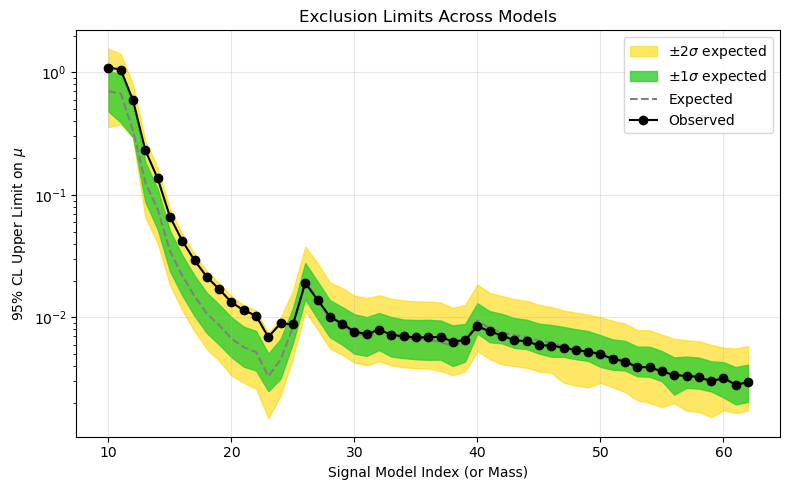

In [17]:
x = np.arange(len(results["obs"]))  # Replace with real mass points if available
x = [ float(patch.split("/")[-1].split("_")[1])/1000 for patch in patchsets]

plt.figure(figsize=(8,5))

# +/-  1/2sigma band (green,yellow)
plt.fill_between(x, results["minus2"], results["plus2"], color="gold", label=r"$\pm 2\sigma$ expected", alpha=0.6)
plt.fill_between(x, results["minus1"], results["plus1"], color="limegreen", label=r"$\pm 1\sigma$ expected", alpha=0.8)

# Median expected
plt.plot(x, results["median"], linestyle="--", color="gray", label="Expected")

# Observed
plt.plot(x, results["obs"], linestyle="-", color="black", marker="o", label="Observed")

plt.xlabel("Signal Model Index (or Mass)")
plt.ylabel(r"95% CL Upper Limit on $\mu$")
plt.title("Exclusion Limits Across Models")
plt.yscale("log")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


![](https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/HDBS-2019-19/fig_06d.png)

## Measurments

https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/TOPQ-2020-02/

In [18]:
if not os.path.exists("ttbar.json"):
    download("https://www.hepdata.net/record/resource/3112455?view=true","ttbar.json")
ws = pyhf.Workspace(json.load(open("ttbar.json")))
model =  ws.model()
data   = ws.data(model)

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier JET_JER_DataVsMC (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier JET_JER_NP1 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier JET_JER_NP2 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier JET_JER_NP3 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier JET_JER_NP4 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier JET_JER_NP7 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier weight_bTagSF_MV2c10_Continuous_eigenvars_C_0 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier weight_bTagSF_MV2c10_Continuous_eigenvars_C_1 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier weight_bTagSF_MV2c10_Continuous_eigenvars_C_3 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier weight_bTagSF_MV2c10_Continuous_eigenvars_Light_0 (1 new nuis

INFO - pyhf.pdf - adding modifier weight_bTagSF_MV2c10_Continuous_eigenvars_C_4 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier weight_bTagSF_MV2c10_Continuous_eigenvars_C_5 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier weight_bTagSF_MV2c10_Continuous_eigenvars_Light_8 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier MultijetNorm_SR3_ejets (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier MultijetNorm_SR3_mujets (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier MultijetShape_SR3_ejets (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier MultijetShape_SR3_mujets (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier ttbar_FSR_Model_SR3 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier ttbar_ISR_Model_Var3c_SR3 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier ttbar_ISR_Model_muF_SR3 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier ttbar_ISR_Model_muR_SR3 (1 new nuisanc

INFO - pyhf.pdf - adding modifier staterror_SR3 (12 new nuisance parameters)


In [19]:
#prediction_prefit = cabinetry.model_utils.prediction(model)
#colorDict={"Signal":"white","ttX":"gray", "Wjets":"green","SingleTop":"blue","QCD":"brown","Other":"orange"}
#_ = cabinetry.visualize.data_mc(prediction_prefit, data,colors=colorDict)

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 444.5                      │             Nfcn = 88347             │
│ EDM = 4.27e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────────────────────────────

INFO - cabinetry.fit - MET_SoftTrk_ResoPara                               =  0.0142 +/- 0.9876
INFO - cabinetry.fit - MET_SoftTrk_ResoPerp                               = -0.0335 +/- 0.9880
INFO - cabinetry.fit - PDF_16                                             =  0.0069 +/- 0.9915
INFO - cabinetry.fit - eg_scale_all                                       = -0.0139 +/- 0.9714
INFO - cabinetry.fit - ttbar_FSR_Model_SR2                                = -0.0163 +/- 0.6130
INFO - cabinetry.fit - ttbar_ISR_Model_Var3c_SR2                          = -0.3793 +/- 0.9522
INFO - cabinetry.fit - ttbar_ISR_Model_muF_SR2                            = -0.0209 +/- 0.9641
INFO - cabinetry.fit - ttbar_ISR_Model_muR_SR2                            =  0.2220 +/- 0.9628
INFO - cabinetry.fit - ttbar_Shower_Model_Shape_SR2                       =  0.0944 +/- 0.5994
INFO - cabinetry.fit - weight_bTagSF_MV2c10_Continuous_eigenvars_B_9      =  0.1173 +/- 0.9833
INFO - cabinetry.fit - weight_bTagSF_MV2c10_Contin

INFO - cabinetry.fit - weight_bTagSF_MV2c10_Continuous_eigenvars_B_10     =  0.0287 +/- 0.9924
INFO - cabinetry.fit - weight_bTagSF_MV2c10_Continuous_eigenvars_B_13     =  0.0001 +/- 0.9933
INFO - cabinetry.fit - weight_bTagSF_MV2c10_Continuous_eigenvars_B_20     =  0.0091 +/- 0.9933
INFO - cabinetry.fit - PDF_17                                             = -0.0002 +/- 0.9933
INFO - cabinetry.fit - PDF_25                                             =  0.0116 +/- 0.9932
INFO - cabinetry.fit - PDF_9                                              =  0.0116 +/- 0.9933
INFO - cabinetry.fit - weight_bTagSF_MV2c10_Continuous_eigenvars_B_11     = -0.0106 +/- 0.9932
INFO - cabinetry.fit - weight_bTagSF_MV2c10_Continuous_eigenvars_B_29     =  0.0086 +/- 0.9932
INFO - cabinetry.fit - WjetsNorm_2b                                       = -0.1139 +/- 0.6229
INFO - cabinetry.fit - weight_bTagSF_MV2c10_Continuous_eigenvars_B_8      =  0.0005 +/- 0.9933
INFO - cabinetry.fit - PDF_15                     

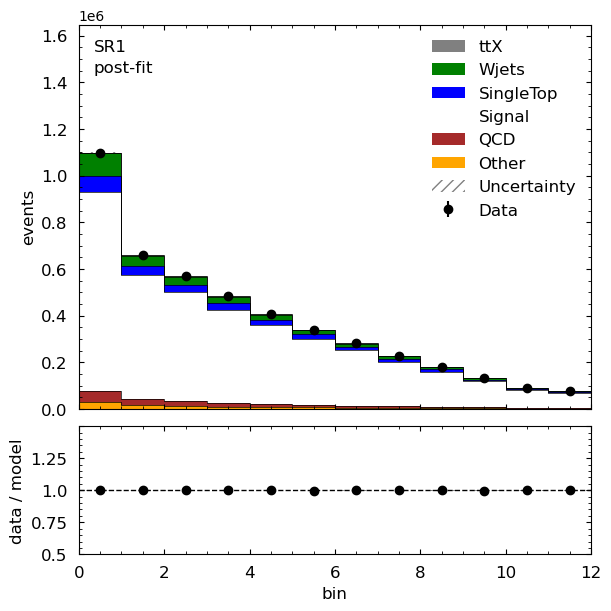

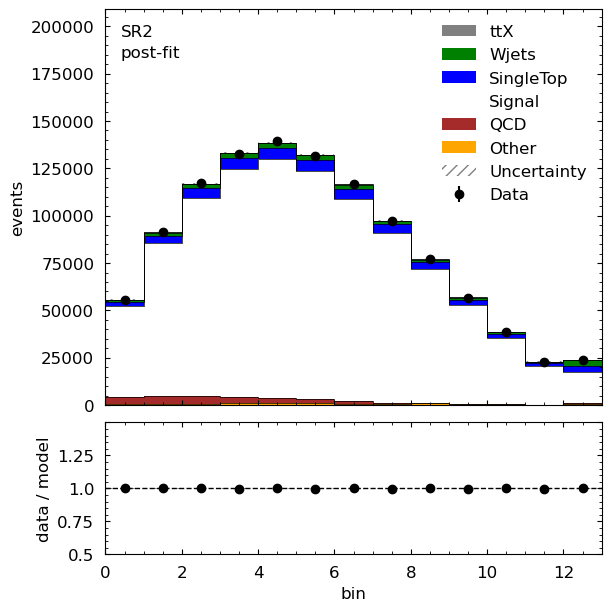

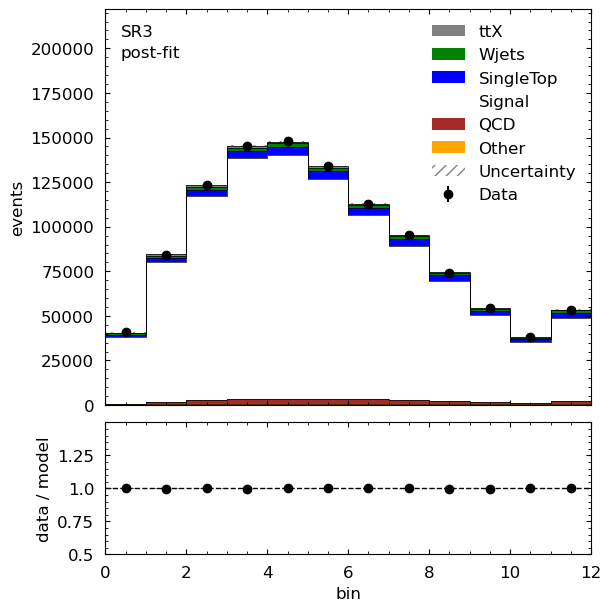

In [20]:
fit_results = cabinetry.fit.fit(model, data)
prediction_postfit = cabinetry.model_utils.prediction(model, fit_results=fit_results)
colorDict={"Signal":"white","ttX":"gray", "Wjets":"green","SingleTop":"blue","QCD":"brown","Other":"orange"}
_ = cabinetry.visualize.data_mc(prediction_postfit, data,colors=colorDict)

INFO - cabinetry.visualize.utils - saving figure as figures/pulls.pdf


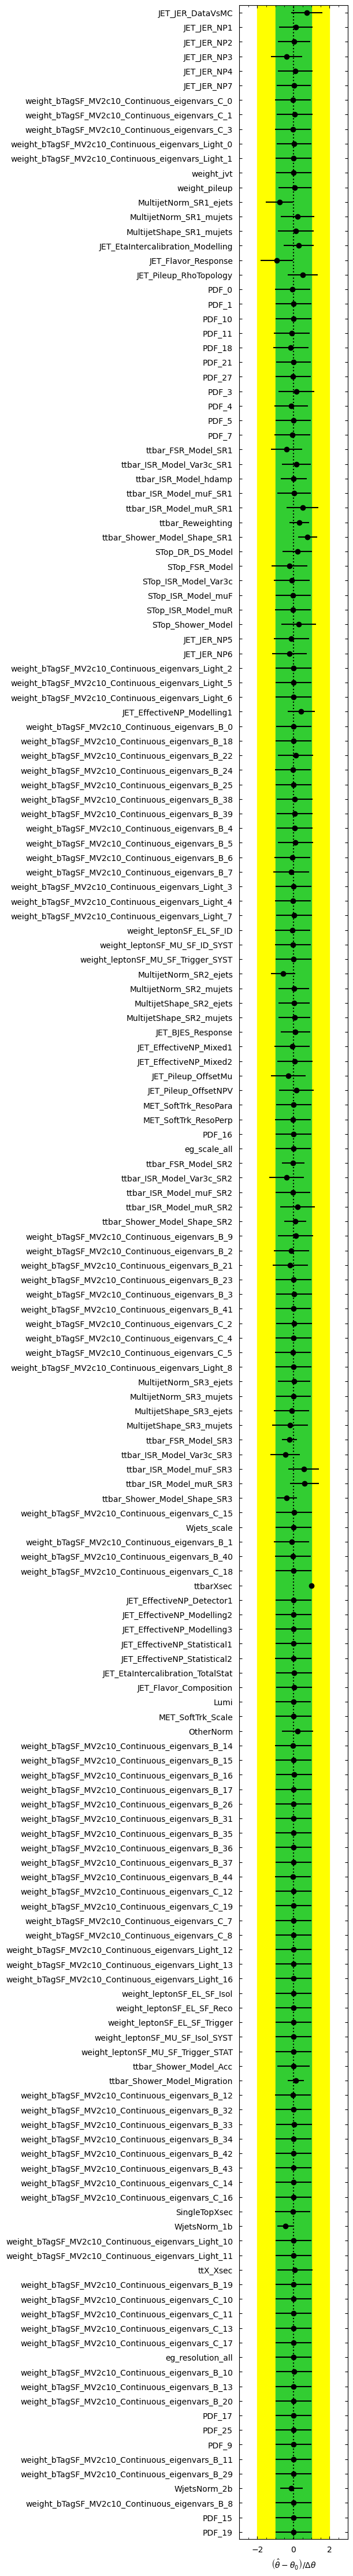

In [21]:
cabinetry.visualize.pulls(fit_results)

INFO - cabinetry.visualize.utils - saving figure as figures/correlation_matrix.pdf


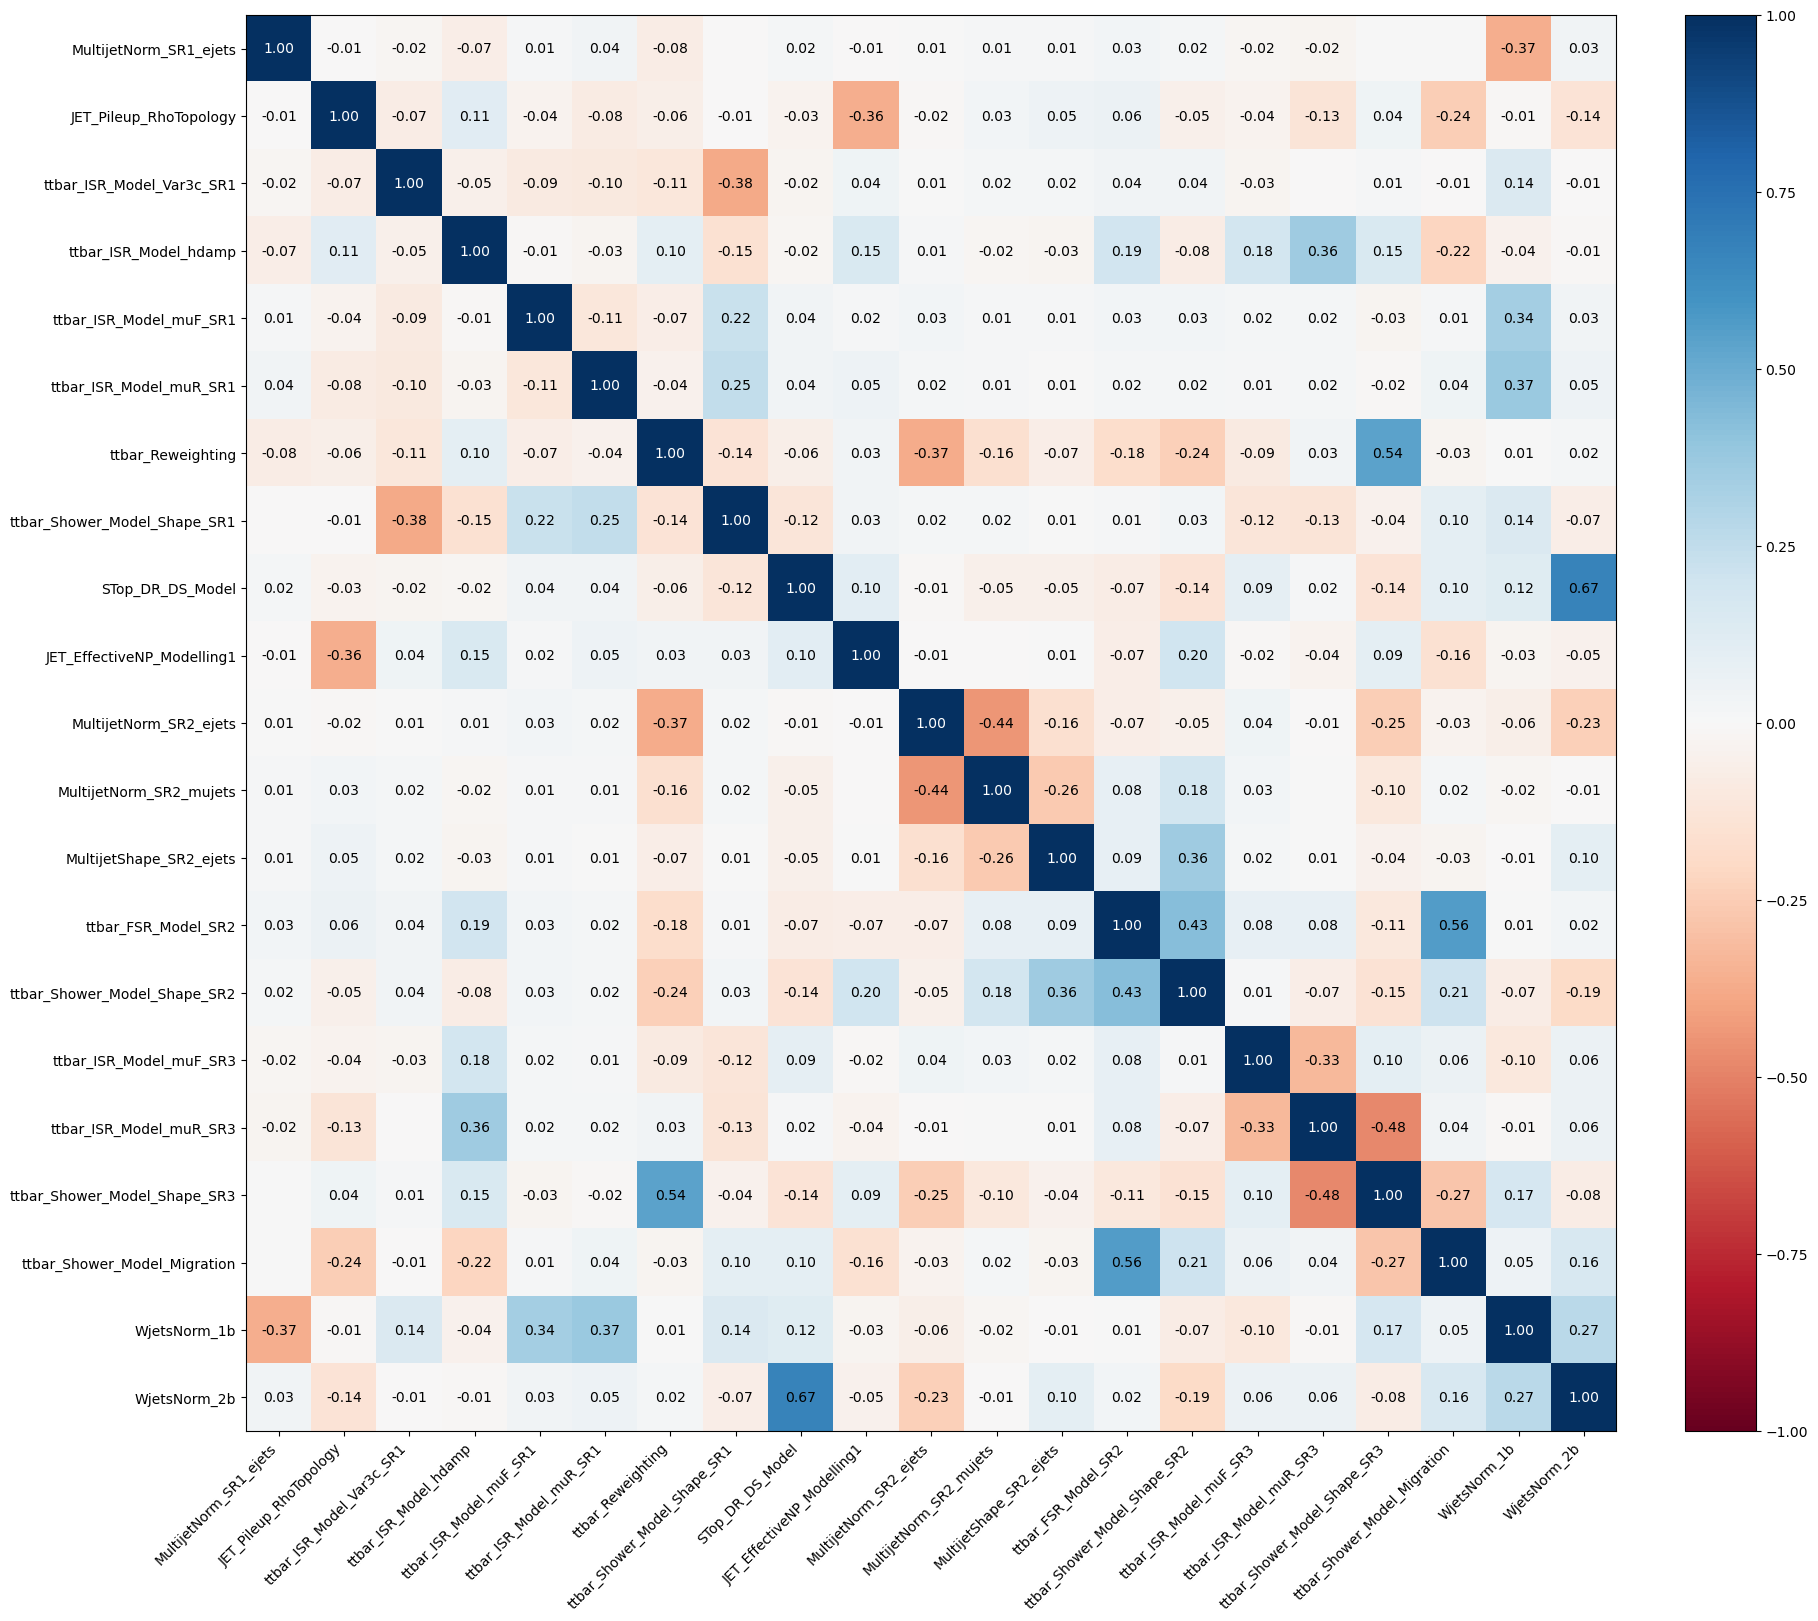

In [22]:
cabinetry.visualize.correlation_matrix(fit_results, pruning_threshold=0.3)

In [23]:
keep_params=[model.config.poi_name,"ttbar_Shower_Model_Acc","Lumi","ttbar_Shower_Model_Migration","ttbar_FSR_Model_SR1","ttbar_Shower_Model_Migration","ttbar_Reweighting","JET_Pileup_RhoTopology","weight_jvt","ttbar_ISR_Model_hdamp","PDF_4","ttbar_Shower_Model_Shape_SR3"]
fixed_params = [p not in keep_params for p in model.config.par_names] #model.config.par_names
fixed_params_ref = [p not in keep_params for p in model.config.par_names] #model.config.par_names
#print(len(model.config.suggested_fixed()),len(model.config.par_names),len(model.config.par_order))
#print(fixed_params)
#print(fixed_params[model.config.poi_index])
#print(fixed_params==fixed_params_ref)

#for ii,val in enumerate(fixed_params):
#    if val==False: print(model.config.par_names[ii])

In [24]:
significance_results = cabinetry.fit.significance(model, data, fix_pars=fixed_params)
print(significance_results)
#CLs_obs, CLs_exp= pyhf.infer.hypotest(0, data, model, test_stat="q0", return_expected=True, fixed_params=fixed_params)
#print(CLs_obs,CLs_exp)

INFO - cabinetry.fit - calculating discovery significance for ttbarXsec


W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder Edm is limited by Machine accuracy - return current minimum
W VariableMetricBuilder Reached machine accuracy limit; Edm 0.0226618 is smaller than machine limit 0.676966 while 0.0002 was requested
W VariableMetricBuilder No convergence; Edm 0.0226618 is above tolerance 0.002
W SimplexBuilder Simplex did not converge, edm > minedm
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder Edm is limited by Machine accuracy - return current minimum


INFO - cabinetry.fit - observed p-value: 0.000e+00
INFO - cabinetry.fit - observed significance: inf
INFO - cabinetry.fit - expected p-value: 0.000e+00
INFO - cabinetry.fit - expected significance: inf


W MnPosDef Matrix forced pos-def by adding to diagonal 0.0082186
SignificanceResults(observed_p_value=0.0, observed_significance=np.float64(inf), expected_p_value=0.0, expected_significance=np.float64(inf))


INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.3                      │             Nfcn = 1284              │
│ EDM = 4.05e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴─────────────────────────────────

INFO - cabinetry.fit - MultijetNorm_SR2_mujets                            =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - MultijetShape_SR2_ejets                            =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - MultijetShape_SR2_mujets                           =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - JET_BJES_Response                                  =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - JET_EffectiveNP_Mixed1                             =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - JET_EffectiveNP_Mixed2                             =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - JET_Pileup_OffsetMu                                =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - JET_Pileup_OffsetNPV                               =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - MET_SoftTrk_ResoPara                               =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - MET_SoftTrk_Re

INFO - cabinetry.fit - weight_bTagSF_MV2c10_Continuous_eigenvars_B_33     =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - weight_bTagSF_MV2c10_Continuous_eigenvars_B_34     =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - weight_bTagSF_MV2c10_Continuous_eigenvars_B_42     =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - weight_bTagSF_MV2c10_Continuous_eigenvars_B_43     =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - weight_bTagSF_MV2c10_Continuous_eigenvars_C_14     =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - weight_bTagSF_MV2c10_Continuous_eigenvars_C_16     =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - SingleTopXsec                                      =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - WjetsNorm_1b                                       =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - weight_bTagSF_MV2c10_Continuous_eigenvars_Light_10 =  0.0000 +/- 0.0000  (constant)
INFO - cabinetry.fit - weight_bTagSF_

1.0706881971960105 0.02606855666170549


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.3                      │             Nfcn = 1284              │
│ EDM = 4.05e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.334161 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00753474


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.3                      │              Nfcn = 750              │
│ EDM = 1.29e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.310990 at 

DEBUG - cabinetry.fit - -2 log(L) = 541.701833 at best-fit point
INFO - cabinetry.visualize.utils - saving figure as figures/scan_ttbarXsec.pdf


W MnPosDef Matrix forced pos-def by adding to diagonal 0.00654565
ScanResults(name='ttbarXsec', bestfit=np.float64(1.0706881971960105), uncertainty=np.float64(0.02606855666170549), parameter_values=array([0.99248253, 1.00812366, 1.0237648 , 1.03940593, 1.05504706,
       1.0706882 , 1.08632933, 1.10197047, 1.1176116 , 1.13325273,
       1.14889387]), delta_nlls=array([6.40462402e+00, 4.03405105e+00, 2.23358936e+00, 9.76829346e-01,
       2.39907578e-01, 5.48577821e-05, 2.28402135e-01, 8.97860470e-01,
       1.98951091e+00, 3.48569402e+00, 5.36767252e+00]))


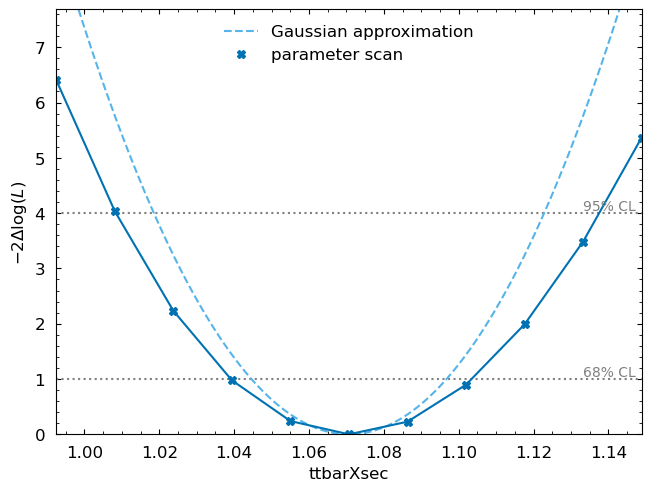

In [25]:
###ALEX, this is actually modifying the input fix_pars, setting the poi to constant?!
fit_results = cabinetry.fit.fit(model, data,fix_pars=fixed_params)
mu=fit_results.bestfit[model.config.poi_index]
uncert=fit_results.uncertainty[model.config.poi_index]
print(mu,uncert)

scan_results = cabinetry.fit.scan(model, data, model.config.poi_name, par_range=[mu-3*uncert,mu+3*uncert], fix_pars=fixed_params)
print(scan_results)
cabinetry.visualize.scan(scan_results)

In [26]:
#ALEX, debug comparing the input to the orginal
print(fixed_params==fixed_params_ref)
print(fixed_params[model.config.poi_index])
print(fixed_params_ref[model.config.poi_index])

False
True
False


In [28]:
###ALEX, ranking repeating redundant points with fixed params
ranking_results = cabinetry.fit.ranking(model, data,fix_pars=fixed_params_ref)
#ranking_results = cabinetry.fit.ranking(model, data)
cabinetry.visualize.ranking(ranking_results)

INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.3                      │             Nfcn = 1284              │
│ EDM = 4.05e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.334161 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00731836


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 540.1                      │             Nfcn = 1283              │
│ EDM = 8.14e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 540.126482 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.007159


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 541.4                      │             Nfcn = 1234              │
│ EDM = 4.23e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 541.392411 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00823873


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 547.3                      │             Nfcn = 1283              │
│ EDM = 3.41e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 547.303779 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00747741


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 530                        │             Nfcn = 1184              │
│ EDM = 3.94e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 530.025781 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00753847


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 540.8                      │             Nfcn = 1159              │
│ EDM = 7.85e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 540.817042 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00900657


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 534.5                      │             Nfcn = 1237              │
│ EDM = 5.93e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 534.533478 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00793807


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.5                      │             Nfcn = 1210              │
│ EDM = 1.86e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.455595 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00832814


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 535.2                      │             Nfcn = 1131              │
│ EDM = 1.44e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 535.172842 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00764694


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.7                      │             Nfcn = 1156              │
│ EDM = 5.38e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.676938 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0076925


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 530.8                      │             Nfcn = 1156              │
│ EDM = 9.9e-07 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 530.756321 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00843583


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 545.9                      │             Nfcn = 1352              │
│ EDM = 2.34e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 545.889033 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00816093


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.9                      │             Nfcn = 1307              │
│ EDM = 6.71e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.917217 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00738025


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.8                      │             Nfcn = 1204              │
│ EDM = 1.65e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.756947 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00738921


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.5                      │             Nfcn = 1014              │
│ EDM = 7.5e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.482871 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00625828


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.5                      │             Nfcn = 1002              │
│ EDM = 4.04e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.463755 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00745432


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 533.9                      │             Nfcn = 1205              │
│ EDM = 5.59e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 533.855484 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00821974


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 542.5                      │             Nfcn = 1363              │
│ EDM = 6.84e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 542.545602 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00767089


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 552.1                      │             Nfcn = 1462              │
│ EDM = 5.14e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 552.112056 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00895266


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 533.5                      │             Nfcn = 1335              │
│ EDM = 4.06e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 533.519452 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0073175


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 543.1                      │             Nfcn = 1254              │
│ EDM = 1.18e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 543.141147 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0090351


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537                        │             Nfcn = 1282              │
│ EDM = 5.69e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.970052 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00727366


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.8                      │             Nfcn = 1236              │
│ EDM = 3.07e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.811559 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00746348


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 545.1                      │             Nfcn = 1403              │
│ EDM = 9.27e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 545.126689 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00767827


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 545.1                      │              Nfcn = 934              │
│ EDM = 5.76e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 545.149721 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00775653


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.2                      │              Nfcn = 938              │
│ EDM = 1.65e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.208519 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00630993


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.2                      │             Nfcn = 1187              │
│ EDM = 1.04e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.163612 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00909746


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.6                      │             Nfcn = 1181              │
│ EDM = 9.65e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.609361 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00797975


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 538                        │             Nfcn = 1237              │
│ EDM = 8.38e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.951372 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0079183


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.8                      │             Nfcn = 1336              │
│ EDM = 3.06e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.763543 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00833818


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 539.8                      │             Nfcn = 1130              │
│ EDM = 4.08e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 539.765719 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0076046


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 540.4                      │             Nfcn = 1106              │
│ EDM = 2.25e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 540.398804 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00882869


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 535                        │             Nfcn = 1187              │
│ EDM = 4.19e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 534.969745 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00879967


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 546                        │             Nfcn = 1217              │
│ EDM = 1.16e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 546.031898 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0116518


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 530.5                      │             Nfcn = 1125              │
│ EDM = 2.52e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 530.526427 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00892381


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 534.5                      │             Nfcn = 1161              │
│ EDM = 2.86e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 534.531227 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00715239


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 541.1                      │             Nfcn = 1291              │
│ EDM = 4.71e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 541.077059 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0106715


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.8                      │             Nfcn = 1109              │
│ EDM = 2.13e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.838231 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00736354


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 541.2                      │              Nfcn = 955              │
│ EDM = 8.6e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 541.197054 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00841837


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 541.3                      │             Nfcn = 1355              │
│ EDM = 8.57e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 541.288337 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00715467


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 538                        │              Nfcn = 964              │
│ EDM = 6.31e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.959531 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00788137


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.4                      │             Nfcn = 1261              │
│ EDM = 4.12e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.357426 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00796347


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 535.4                      │             Nfcn = 1161              │
│ EDM = 2.71e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 535.354424 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00817491


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 539.6                      │             Nfcn = 1186              │
│ EDM = 2.34e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 539.645995 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00758492


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 545.9                      │             Nfcn = 1062              │
│ EDM = 1.5e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 545.875025 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00822489


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.1                      │             Nfcn = 1031              │
│ EDM = 1.03e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.068336 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00892513


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 563.2                      │             Nfcn = 1333              │
│ EDM = 1.24e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 563.201588 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00827562


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 546.8                      │              Nfcn = 983              │
│ EDM = 2.73e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 546.752798 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00776589


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 547.3                      │             Nfcn = 1151              │
│ EDM = 0.000109 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 547.297583 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00803217


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.8                      │             Nfcn = 1034              │
│ EDM = 4.93e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.830982 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00771263


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 542.1                      │             Nfcn = 1133              │
│ EDM = 2.31e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 542.118104 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00748808


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 541.1                      │             Nfcn = 1305              │
│ EDM = 4.68e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 541.135717 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0084788


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 539.7                      │             Nfcn = 1110              │
│ EDM = 1.15e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 539.727572 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00741523


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 545.6                      │             Nfcn = 1564              │
│ EDM = 1.04e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 545.637850 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00702171


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.2                      │             Nfcn = 1107              │
│ EDM = 2.81e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.195682 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00837032


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.2                      │             Nfcn = 1056              │
│ EDM = 4.75e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.195769 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00702588


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 501.9                      │             Nfcn = 1109              │
│ EDM = 8e-06 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 501.908036 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00978333


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 606.2                      │             Nfcn = 1475              │
│ EDM = 3.64e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 606.219496 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00859724


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 513.5                      │              Nfcn = 909              │
│ EDM = 4.67e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 513.493738 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00736959


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 542.3                      │             Nfcn = 1388              │
│ EDM = 1.27e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 542.296981 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00736602


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 532.7                      │             Nfcn = 1243              │
│ EDM = 8.46e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 532.740944 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00864351


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 542.7                      │             Nfcn = 1264              │
│ EDM = 2.69e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 542.705621 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00775239


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 534.2                      │             Nfcn = 1208              │
│ EDM = 1.21e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 534.155150 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0103504


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 522                        │             Nfcn = 1126              │
│ EDM = 2.17e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 521.959998 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00758731


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 557.7                      │             Nfcn = 1227              │
│ EDM = 7.95e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 557.650966 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00786371


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.7                      │             Nfcn = 1260              │
│ EDM = 3.52e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.710443 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00793599


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 531.6                      │             Nfcn = 1106              │
│ EDM = 1.3e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 531.604397 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00892324


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.5                      │             Nfcn = 1227              │
│ EDM = 0.000157 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.471998 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00893989


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.3                      │             Nfcn = 1205              │
│ EDM = 3.8e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.260575 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00814169


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 531.5                      │             Nfcn = 1111              │
│ EDM = 1.65e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 531.500756 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00929036


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 539.9                      │             Nfcn = 1177              │
│ EDM = 2.28e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 539.853395 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00777892


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 538.4                      │             Nfcn = 1332              │
│ EDM = 2.81e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 538.402608 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0089661


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 538.5                      │             Nfcn = 1333              │
│ EDM = 9.11e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 538.485696 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00742847


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.8                      │             Nfcn = 1185              │
│ EDM = 3.51e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.838147 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00715407


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.9                      │             Nfcn = 1207              │
│ EDM = 7.18e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.870340 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00741009


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.6                      │             Nfcn = 1186              │
│ EDM = 4.29e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.578982 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00904494


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.2                      │             Nfcn = 1186              │
│ EDM = 2.77e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.181571 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00756006


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.9                      │             Nfcn = 1217              │
│ EDM = 1.06e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.933501 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00858879


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.9                      │             Nfcn = 1330              │
│ EDM = 3.18e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.853991 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00980945


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.3                      │             Nfcn = 1284              │
│ EDM = 5.41e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.273605 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00792633


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.5                      │             Nfcn = 1228              │
│ EDM = 5.05e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.535036 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00901589


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 535.6                      │             Nfcn = 1233              │
│ EDM = 3.16e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 535.600398 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0084541


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 538.1                      │             Nfcn = 1214              │
│ EDM = 1.49e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 538.129850 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00918329


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.6                      │             Nfcn = 1154              │
│ EDM = 4.19e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.572690 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00796405


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.1                      │             Nfcn = 1130              │
│ EDM = 5.24e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.099970 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00936278


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.5                      │             Nfcn = 1160              │
│ EDM = 5.82e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.482828 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0110475


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.2                      │             Nfcn = 1280              │
│ EDM = 8.15e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.184540 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00932002


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.4                      │             Nfcn = 1257              │
│ EDM = 3.92e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.379887 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00802527


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 541.3                      │             Nfcn = 1306              │
│ EDM = 2.48e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 541.323166 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00726542


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 533.6                      │             Nfcn = 1105              │
│ EDM = 5.33e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 533.590593 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00817956


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 538.8                      │             Nfcn = 1183              │
│ EDM = 3.35e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 538.777082 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00792419


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 535.9                      │             Nfcn = 1083              │
│ EDM = 7.33e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 535.918248 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00736028


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 578.4                      │             Nfcn = 1264              │
│ EDM = 4.03e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 578.430242 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0073617


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 511.6                      │              Nfcn = 987              │
│ EDM = 2e-05 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 511.555361 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00776565


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 534.8                      │             Nfcn = 1457              │
│ EDM = 4.94e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 534.848827 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0086896


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 541.2                      │             Nfcn = 1184              │
│ EDM = 4.55e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 541.220588 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00827008


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 535.8                      │             Nfcn = 1133              │
│ EDM = 1.27e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 535.841197 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0086682


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 532.4                      │             Nfcn = 1055              │
│ EDM = 2.73e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 532.365658 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00940508


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 535.1                      │             Nfcn = 1332              │
│ EDM = 3.4e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 535.136766 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00863191


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 534.9                      │             Nfcn = 1309              │
│ EDM = 7.37e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 534.858535 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00771118


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 540                        │             Nfcn = 1107              │
│ EDM = 2.96e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 540.007141 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00727153


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 545.7                      │             Nfcn = 1343              │
│ EDM = 1.8e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 545.656756 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00765816


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 529.8                      │             Nfcn = 1138              │
│ EDM = 1.52e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 529.765240 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00868736


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 541.5                      │             Nfcn = 1187              │
│ EDM = 1.25e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 541.535578 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00724316


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.8                      │             Nfcn = 1209              │
│ EDM = 1.21e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.829770 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00957838


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 535.5                      │             Nfcn = 1185              │
│ EDM = 1.62e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 535.498954 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00807805


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 535.1                      │             Nfcn = 1237              │
│ EDM = 1.89e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 535.072041 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0086163


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 540.7                      │             Nfcn = 1107              │
│ EDM = 2.37e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 540.713376 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00811808


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 534.3                      │             Nfcn = 1183              │
│ EDM = 6.55e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 534.333389 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00906979


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 541.8                      │             Nfcn = 1182              │
│ EDM = 2.59e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 541.794827 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00846249


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 533.4                      │             Nfcn = 1137              │
│ EDM = 5.89e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 533.424808 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00891702


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 542.7                      │             Nfcn = 1282              │
│ EDM = 5.08e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 542.712086 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00795294


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 546.1                      │             Nfcn = 1329              │
│ EDM = 4.61e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 546.120722 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00756083


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 561.3                      │             Nfcn = 1031              │
│ EDM = 6.47e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 561.316183 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00745956


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 538.7                      │             Nfcn = 1308              │
│ EDM = 4.07e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 538.656051 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00758146


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.5                      │             Nfcn = 1182              │
│ EDM = 7.4e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.458494 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00776011


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 535.8                      │             Nfcn = 1235              │
│ EDM = 2.33e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 535.810478 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00821211


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.4                      │             Nfcn = 1291              │
│ EDM = 6.51e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.412469 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0083401


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 538.2                      │             Nfcn = 1220              │
│ EDM = 1.49e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 538.198471 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00830966


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.8                      │             Nfcn = 1275              │
│ EDM = 7.34e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.752256 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00735519


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.9                      │             Nfcn = 1263              │
│ EDM = 1.4e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.932061 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00963044


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.3                      │             Nfcn = 1310              │
│ EDM = 3.33e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.296016 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00846806


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.4                      │             Nfcn = 1332              │
│ EDM = 2.31e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.373243 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00939559


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.7                      │             Nfcn = 1156              │
│ EDM = 1.45e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.716488 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00766584


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.4                      │             Nfcn = 1156              │
│ EDM = 1.26e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.411775 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00726512


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 540.3                      │             Nfcn = 1216              │
│ EDM = 7.25e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 540.316707 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00958871


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 535.5                      │             Nfcn = 1212              │
│ EDM = 2.49e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 535.526744 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0087295


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.7                      │             Nfcn = 1206              │
│ EDM = 4.7e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.692592 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00897571


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 541                        │             Nfcn = 1259              │
│ EDM = 3.31e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 541.047472 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00718744


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 533.8                      │             Nfcn = 1253              │
│ EDM = 0.000225 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 533.835368 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00819134


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 559.8                      │             Nfcn = 1204              │
│ EDM = 3.43e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 559.788485 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00828724


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 523.8                      │             Nfcn = 1263              │
│ EDM = 0.000467 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 523.757588 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00739657


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 569.2                      │             Nfcn = 1151              │
│ EDM = 9.45e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 569.227596 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00827354


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 559.2                      │             Nfcn = 1208              │
│ EDM = 1.17e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 559.153724 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00754649


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.7                      │             Nfcn = 1259              │
│ EDM = 1.64e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.652130 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00825074


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.4                      │             Nfcn = 1155              │
│ EDM = 3.31e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.385213 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0131234


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 539.2                      │             Nfcn = 1305              │
│ EDM = 1.35e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 539.194724 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0084054


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 535.9                      │             Nfcn = 1152              │
│ EDM = 1.54e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 535.893041 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00844485


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.2                      │             Nfcn = 1263              │
│ EDM = 6.91e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.241025 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00745838


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.8                      │             Nfcn = 1153              │
│ EDM = 1.12e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.784905 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00759474


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.9                      │             Nfcn = 1160              │
│ EDM = 2.74e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.886482 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00908695


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.6                      │             Nfcn = 1234              │
│ EDM = 2.9e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.571347 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00799413


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.1                      │             Nfcn = 1208              │
│ EDM = 1.82e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.101804 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00839844


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.9                      │             Nfcn = 1184              │
│ EDM = 4.71e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.883263 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00915317


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.8                      │             Nfcn = 1236              │
│ EDM = 5.9e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.793163 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00836578


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.3                      │             Nfcn = 1282              │
│ EDM = 2.8e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.328975 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00771546


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.3                      │             Nfcn = 1157              │
│ EDM = 2.33e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.342072 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00793476


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.1                      │             Nfcn = 1233              │
│ EDM = 6.8e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.089870 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00746571


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 538                        │             Nfcn = 1278              │
│ EDM = 7.07e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.958377 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00814467


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.5                      │             Nfcn = 1235              │
│ EDM = 1.24e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.525979 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00861528


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536                        │             Nfcn = 1161              │
│ EDM = 9.07e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.003468 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0067829


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.2                      │              Nfcn = 893              │
│ EDM = 0.000537 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.151718 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00869992


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 527.7                      │             Nfcn = 1003              │
│ EDM = 5.08e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 527.715789 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00740483


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.2                      │             Nfcn = 1227              │
│ EDM = 2.53e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.233846 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00842698


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.6                      │             Nfcn = 1309              │
│ EDM = 2.91e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.620463 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00735464


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 538.1                      │             Nfcn = 1258              │
│ EDM = 2.6e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 538.065822 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00896686


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.3                      │             Nfcn = 1314              │
│ EDM = 8.38e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.298720 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00810899


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.2                      │             Nfcn = 1206              │
│ EDM = 4.84e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.207497 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0101294


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.7                      │             Nfcn = 1235              │
│ EDM = 3.91e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.749439 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00756694


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.9                      │             Nfcn = 1313              │
│ EDM = 3.76e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.924669 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00721446


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.7                      │             Nfcn = 1336              │
│ EDM = 6.81e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.653192 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.008161


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 538                        │             Nfcn = 1151              │
│ EDM = 2.7e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 538.019640 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00819818


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.5                      │             Nfcn = 1237              │
│ EDM = 1.12e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.526197 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00770157


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.1                      │             Nfcn = 1311              │
│ EDM = 3.8e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.149347 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00848912


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.3                      │             Nfcn = 1260              │
│ EDM = 5.58e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.347921 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00774088


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.3                      │             Nfcn = 1231              │
│ EDM = 1.06e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.343553 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00810641


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.7                      │             Nfcn = 1312              │
│ EDM = 4.04e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.672133 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0123955


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.2                      │             Nfcn = 1209              │
│ EDM = 8.91e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.205472 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0075917


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.7                      │             Nfcn = 1233              │
│ EDM = 1.95e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.669879 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00888393


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537                        │             Nfcn = 1201              │
│ EDM = 0.000112 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.002822 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00769326


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.2                      │             Nfcn = 1232              │
│ EDM = 5.18e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.186022 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00789132


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.5                      │             Nfcn = 1156              │
│ EDM = 4.43e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.485567 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00946921


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.6                      │             Nfcn = 1288              │
│ EDM = 9.29e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.557788 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00746749


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.4                      │             Nfcn = 1284              │
│ EDM = 7.33e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.355801 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00906305


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.1                      │             Nfcn = 1203              │
│ EDM = 1e-05 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.136006 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00825892


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.1                      │             Nfcn = 1284              │
│ EDM = 1.41e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.144282 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00718189


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.6                      │             Nfcn = 1312              │
│ EDM = 1.59e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.563342 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00794525


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.9                      │             Nfcn = 1163              │
│ EDM = 2.37e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.937564 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00785217


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.7                      │             Nfcn = 1235              │
│ EDM = 0.000136 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.733247 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00741615


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.5                      │              Nfcn = 967              │
│ EDM = 2.71e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.520910 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00671521


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 566.4                      │             Nfcn = 1165              │
│ EDM = 3.48e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 566.372250 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00789332


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 562.5                      │             Nfcn = 1151              │
│ EDM = 5.02e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 562.501167 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00853754


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.5                      │             Nfcn = 1027              │
│ EDM = 8.75e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.474237 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00741126


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.8                      │             Nfcn = 1201              │
│ EDM = 3.22e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.827208 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0081448


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.9                      │             Nfcn = 1210              │
│ EDM = 3.6e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.850494 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.0071664


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537                        │             Nfcn = 1213              │
│ EDM = 2.84e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.989880 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00720571


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.7                      │             Nfcn = 1131              │
│ EDM = 1.85e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.681884 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00721706


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 536.9                      │             Nfcn = 1261              │
│ EDM = 6.4e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 536.906311 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00754227


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.8                      │             Nfcn = 1298              │
│ EDM = 6.1e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.780494 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00844402


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.6                      │             Nfcn = 1314              │
│ EDM = 4.35e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.613344 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00737278


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.1                      │             Nfcn = 1254              │
│ EDM = 3.74e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.057020 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00772585


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.1                      │             Nfcn = 1235              │
│ EDM = 3.6e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.141803 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00812956


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.3                      │             Nfcn = 1233              │
│ EDM = 4.52e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.290853 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00822915


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 537.4                      │             Nfcn = 1288              │
│ EDM = 1.99e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 537.375900 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00949784


INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 530                        │             Nfcn = 1182              │
│ EDM = 2.44e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
DEBUG - cabinetry.fit - -2 log(L) = 530.017329 at 

W MnPosDef Matrix forced pos-def by adding to diagonal 0.00874619


ERROR - pyhf.optimize.mixins -   message: Optimization failed. Call limit was reached.
  success: False
      fun: 605.8737892831164
        x: <ValueView JET_JER_DataVsMC=0.0 JET_JER_NP1=0.0 JET_JER_NP2=0.0 JET_JER_NP3=0.0 JET_JER_NP4=0.0 JET_JER_NP7=0.0 weight_bTagSF_MV2c10_Continuous_eigenvars_C_0=0.0 weight_bTagSF_MV2c10_Continuous_eigenvars_C_1=0.0 weight_bTagSF_MV2c10_Continuous_eigenvars_C_3=0.0 weight_bTagSF_MV2c10_Continuous_eigenvars_Light_0=0.0 weight_bTagSF_MV2c10_Continuous_eigenvars_Light_1=0.0 weight_jvt=-2.2207469128722503 weight_pileup=0.0 MultijetNorm_SR1_ejets=0.0 MultijetNorm_SR1_mujets=0.0 MultijetShape_SR1_mujets=0.0 JET_EtaIntercalibration_Modelling=0.0 JET_Flavor_Response=0.0 JET_Pileup_RhoTopology=1.6681556706661411 PDF_0=0.0 PDF_1=0.0 PDF_10=0.0 PDF_11=0.0 PDF_18=0.0 PDF_21=0.0 PDF_27=0.0 PDF_3=0.0 PDF_4=1.6702876695041284 PDF_5=0.0 PDF_7=0.0 ttbar_FSR_Model_SR1=-3.1620583309755177 ttbar_ISR_Model_Var3c_SR1=0.0 ttbar_ISR_Model_hdamp=0.09854983657366427 ttbar_I

W MnHesse Maximum number of allowed function calls exhausted; will return diagonal matrix
W VariableMetricBuilder Invalid Hessian - exit the minimization


FailedMinimization: Optimization failed. Call limit was reached.

![](https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/TOPQ-2020-02/fig_03.png)